In [1]:
import pandas as pd
import numpy as np
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

config = {
    "mathtext.fontset": 'stix',
    "font.family":'DejaVu Sans',
    "font.family": 'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize': (8, 6),
    'axes.labelsize': med,
    'axes.titlesize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
seed = 42

In [2]:
dp = pd.read_csv('./data/db_cn.csv')

In [3]:
count_lt_0025 = (dp['energy_above_hull'] <= 0.02).sum()
count_gte_0025 = (dp['energy_above_hull'] > 0.02).sum()

print(f"Number equal to 0.02: {count_lt_0025}")
print(f"Number greater than 0.02: {count_gte_0025}")

Number equal to 0.02: 427
Number greater than 0.02: 864


In [4]:
dp['marker'] = dp['energy_above_hull'].apply(lambda x: 1 if x <= 0.02 else 0)
dp

material_id formula_pretty  formation_energy_per_atom  energy_above_hull  \
0     mp-1113578     Cs2AgAsBr6                  -1.374468           0.000000   
1     mp-1113543     Cs2AgAsCl6                  -1.562978           0.008312   
2     mp-1114305      Cs2AgAsF6                  -2.436756           0.055656   
3     mp-1113575     Cs2AgAuBr6                  -1.255402           0.024743   
4      mp-568448     Cs2AgAuCl6                  -1.395263           0.054055   
...          ...            ...                        ...                ...   
1286  mp-1114193       Rb2YHgI6                  -1.377484           0.104343   
1287  mp-1114129      Rb2YInBr6                  -1.954103           0.016794   
1288  mp-1114045      Rb2YInCl6                  -2.216514           0.041253   
1289  mp-1113931       Rb2YInF6                  -3.290900           0.045683   
1290  mp-1114186       Rb2YInI6                  -1.480278           0.043320   

      is_gap_direct  band_gap  spacegroup_number  \
0             False    1.1161                225   
1             False    1.5886                225   
2             False    2.4428                225   
3             False    0.0000                225   
4             False    0.0000                225   
...             ...       ...                ...   
1286          False    0.0000                225   
1287           True    2.8332                225   
1288          False    3.3242                225   
1289          False    3.6730                225   
1290           True    2.6542                225   

                                              structure     formula  \
0     Full Formula (Cs2 Ag1 As1 Br6)\nReduced Formul...  Cs2AgAsBr6   
1     Full Formula (Cs2 Ag1 As1 Cl6)\nReduced Formul...  Cs2AgAsCl6   
2     Full Formula (Cs2 Ag1 As1 F6)\nReduced Formula...   Cs2AgAsF6   
3     Full Formula (Cs2 Ag1 Au1 Br6)\nReduced Formul...  Cs2AgAuBr6   
4     Full Formula (Cs2 Ag1 Au1 Cl6)\nReduced Formul...  Cs2AgAuCl6   
...                                                 ...         ...   
1286  Full Formula (Rb2 Y1 Hg1 I6)\nReduced Formula:...    Rb2YHgI6   
1287  Full Formula (Rb2 Y1 In1 Br6)\nReduced Formula...   Rb2YInBr6   
1288  Full Formula (Rb2 Y1 In1 Cl6)\nReduced Formula...   Rb2YInCl6   
1289  Full Formula (Rb2 Y1 In1 F6)\nReduced Formula:...    Rb2YInF6   
1290  Full Formula (Rb2 Y1 In1 I6)\nReduced Formula:...    Rb2YInI6   

          composition  is_GGA_U  marker  
0     Cs2 Ag1 As1 Br6         0       1  
1     Cs2 Ag1 As1 Cl6         0       1  
2      Cs2 Ag1 As1 F6         0       0  
3     Cs2 Ag1 Au1 Br6         0       0  
4     Cs2 Ag1 Au1 Cl6         0       0  
...               ...       ...     ...  
1286    Rb2 Y1 Hg1 I6         0       0  
1287   Rb2 Y1 In1 Br6         0       1  
1288   Rb2 Y1 In1 Cl6         0       0  
1289    Rb2 Y1 In1 F6         0       0  
1290    Rb2 Y1 In1 I6         0       0  

[1291 rows x 12 columns]

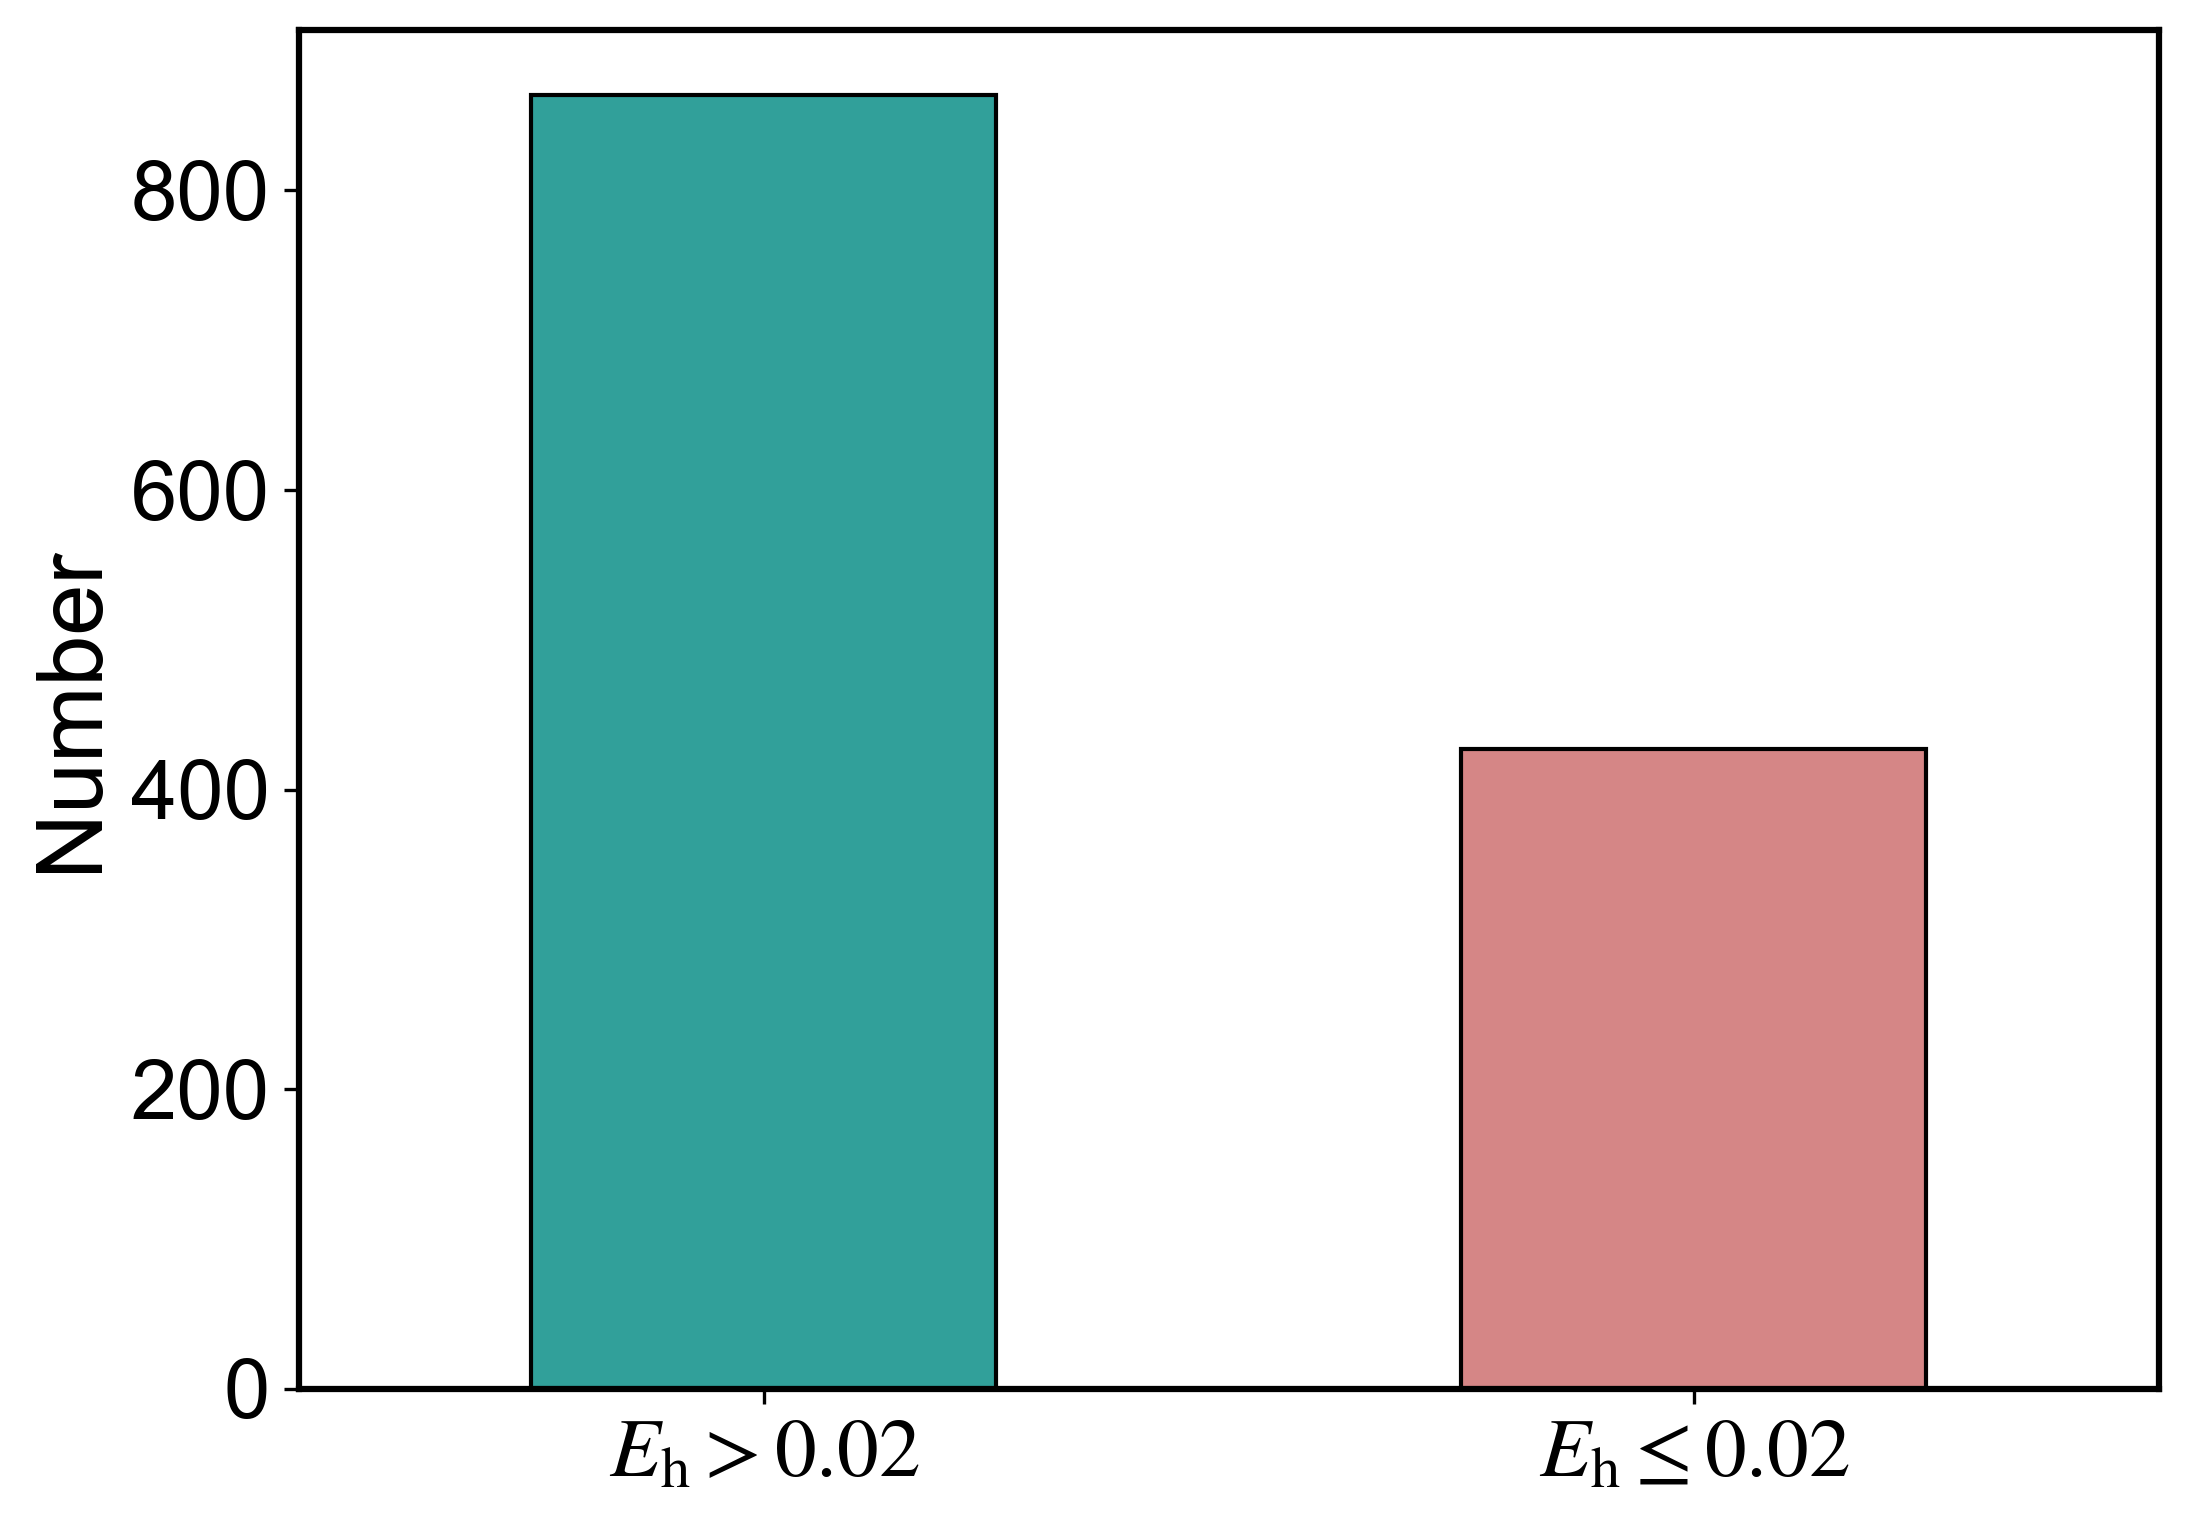

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

y_counts = dp['marker'].value_counts()
y_counts.plot(kind='bar', color=['#31A09A', '#D58686'],edgecolor='black')
plt.ylabel('Number', fontsize='22')
#plt.xticks(ticks=[0, 1], labels=['eh > 0.02', 'eh <= 0.02'], rotation=0, fontsize='22')
plt.xticks(ticks=[0, 1], 
           labels=[r'$E_{\mathrm{h}} > 0.02$', r'$E_{\mathrm{h}} \leq 0.02$'], 
           rotation=0, 
           fontsize=22)

ax = plt.gca()  
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=20) 
ax.set_xlabel('') 
plt.savefig('./picture/eh_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
X = pd.read_csv('./data/features_cn.csv')

In [7]:
y = dp['marker']

In [8]:
from scipy.stats import spearmanr
def remove_collinear_features(x, y,threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''  
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
#                 print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                x1 = x[col.values[0]]
                x2 = x[row.values[0]]
                corr1,p1 = spearmanr(x1, y)
                corr2,p2 = spearmanr(x2, y)
                if np.abs(corr1) < np.abs(corr2):
                    drop_cols.append(col.values[0])
                else:
                    drop_cols.append(row.values[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    return x

In [9]:
from sklearn.model_selection import train_test_split
X = remove_collinear_features(X, y, 0.8)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(X.shape)

(1291, 29)


In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

seed =42
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(n_jobs=-1,random_state=seed)
mlp = MLPClassifier(alpha=1, max_iter=1000,random_state=seed)
lgbm = LGBMClassifier(random_state=seed,verbose=0)
xb = XGBClassifier(random_state=seed,n_jobs=-1)
ext = ExtraTreesClassifier(n_jobs=-1,random_state=seed) 
gbc = GradientBoostingClassifier(random_state=seed)
gnb = GaussianNB()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
def fold5_ensemble(model, X, y, name='', is_plot=True):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    models = []  
    accuracies = []
    f1s = []
    mccs = []
    roc_aucs = []
    recalls = []
    fig, ax = plt.subplots()
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        try:
            X = X.values
            y = y.values
        except:
            pass
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        models.append(model)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        mcc = metrics.matthews_corrcoef(y_test, y_pred)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
        roc_auc = metrics.auc(fpr, tpr)
        recall = metrics.recall_score(y_test, y_pred)
        print(f"Fold {i+ 1} Accuracy: {accuracy} F1_Score: {f1}  ROC_AUC: {roc_auc}")
        accuracies.append(accuracy)
        f1s.append(f1)
        mccs.append(mcc)
        roc_aucs.append(roc_auc)
        recalls.append(recall)

        if is_plot:
            ax.plot(fpr, tpr, label=f"Fold {i+1} (AUC = {roc_auc:.3f})", lw=1.7, linestyle="-.", alpha=0.75)
            ax.plot([0, 1], [0, 1], "r--", lw=1, alpha=0.8)
            ax.set_xlim([-0.02, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel("False Positive Rate", fontsize=22)
            ax.set_ylabel("True Positive Rate", fontsize=22)
            ax.legend(loc="lower right" ,fontsize=17)
            ax.grid(True, linestyle="--", linewidth=1, alpha=0.5)
            ax.spines["top"].set_linewidth(1.5)
            ax.spines["bottom"].set_linewidth(1.5)
            ax.spines["left"].set_linewidth(1.5)
            ax.spines["right"].set_linewidth(1.5)
            ax.tick_params(axis='both', which='major', labelsize=20)
            ax.grid(False)  

    result = {
        'accuracy': np.mean(accuracies),
        'f1-score': np.mean(f1s),
        'mcc': np.mean(mccs),
        'roc_auc': np.mean(roc_aucs),
        'recall': np.mean(recalls)        }
    if is_plot:
        #plt.savefig('./picture/eh_class.png', dpi=300, bbox_inches='tight')
        plt.show()
    return result, models

Fold 1 Accuracy: 0.8494208494208494 F1_Score: 0.7796610169491525  ROC_AUC: 0.8375789756687726
Fold 2 Accuracy: 0.7790697674418605 F1_Score: 0.6545454545454547  ROC_AUC: 0.7412790697674418
Fold 3 Accuracy: 0.7906976744186046 F1_Score: 0.6666666666666666  ROC_AUC: 0.751173070384223
Fold 4 Accuracy: 0.8333333333333334 F1_Score: 0.7393939393939394  ROC_AUC: 0.803910234614077
Fold 5 Accuracy: 0.7248062015503876 F1_Score: 0.6033519553072626  ROC_AUC: 0.7020401224073445


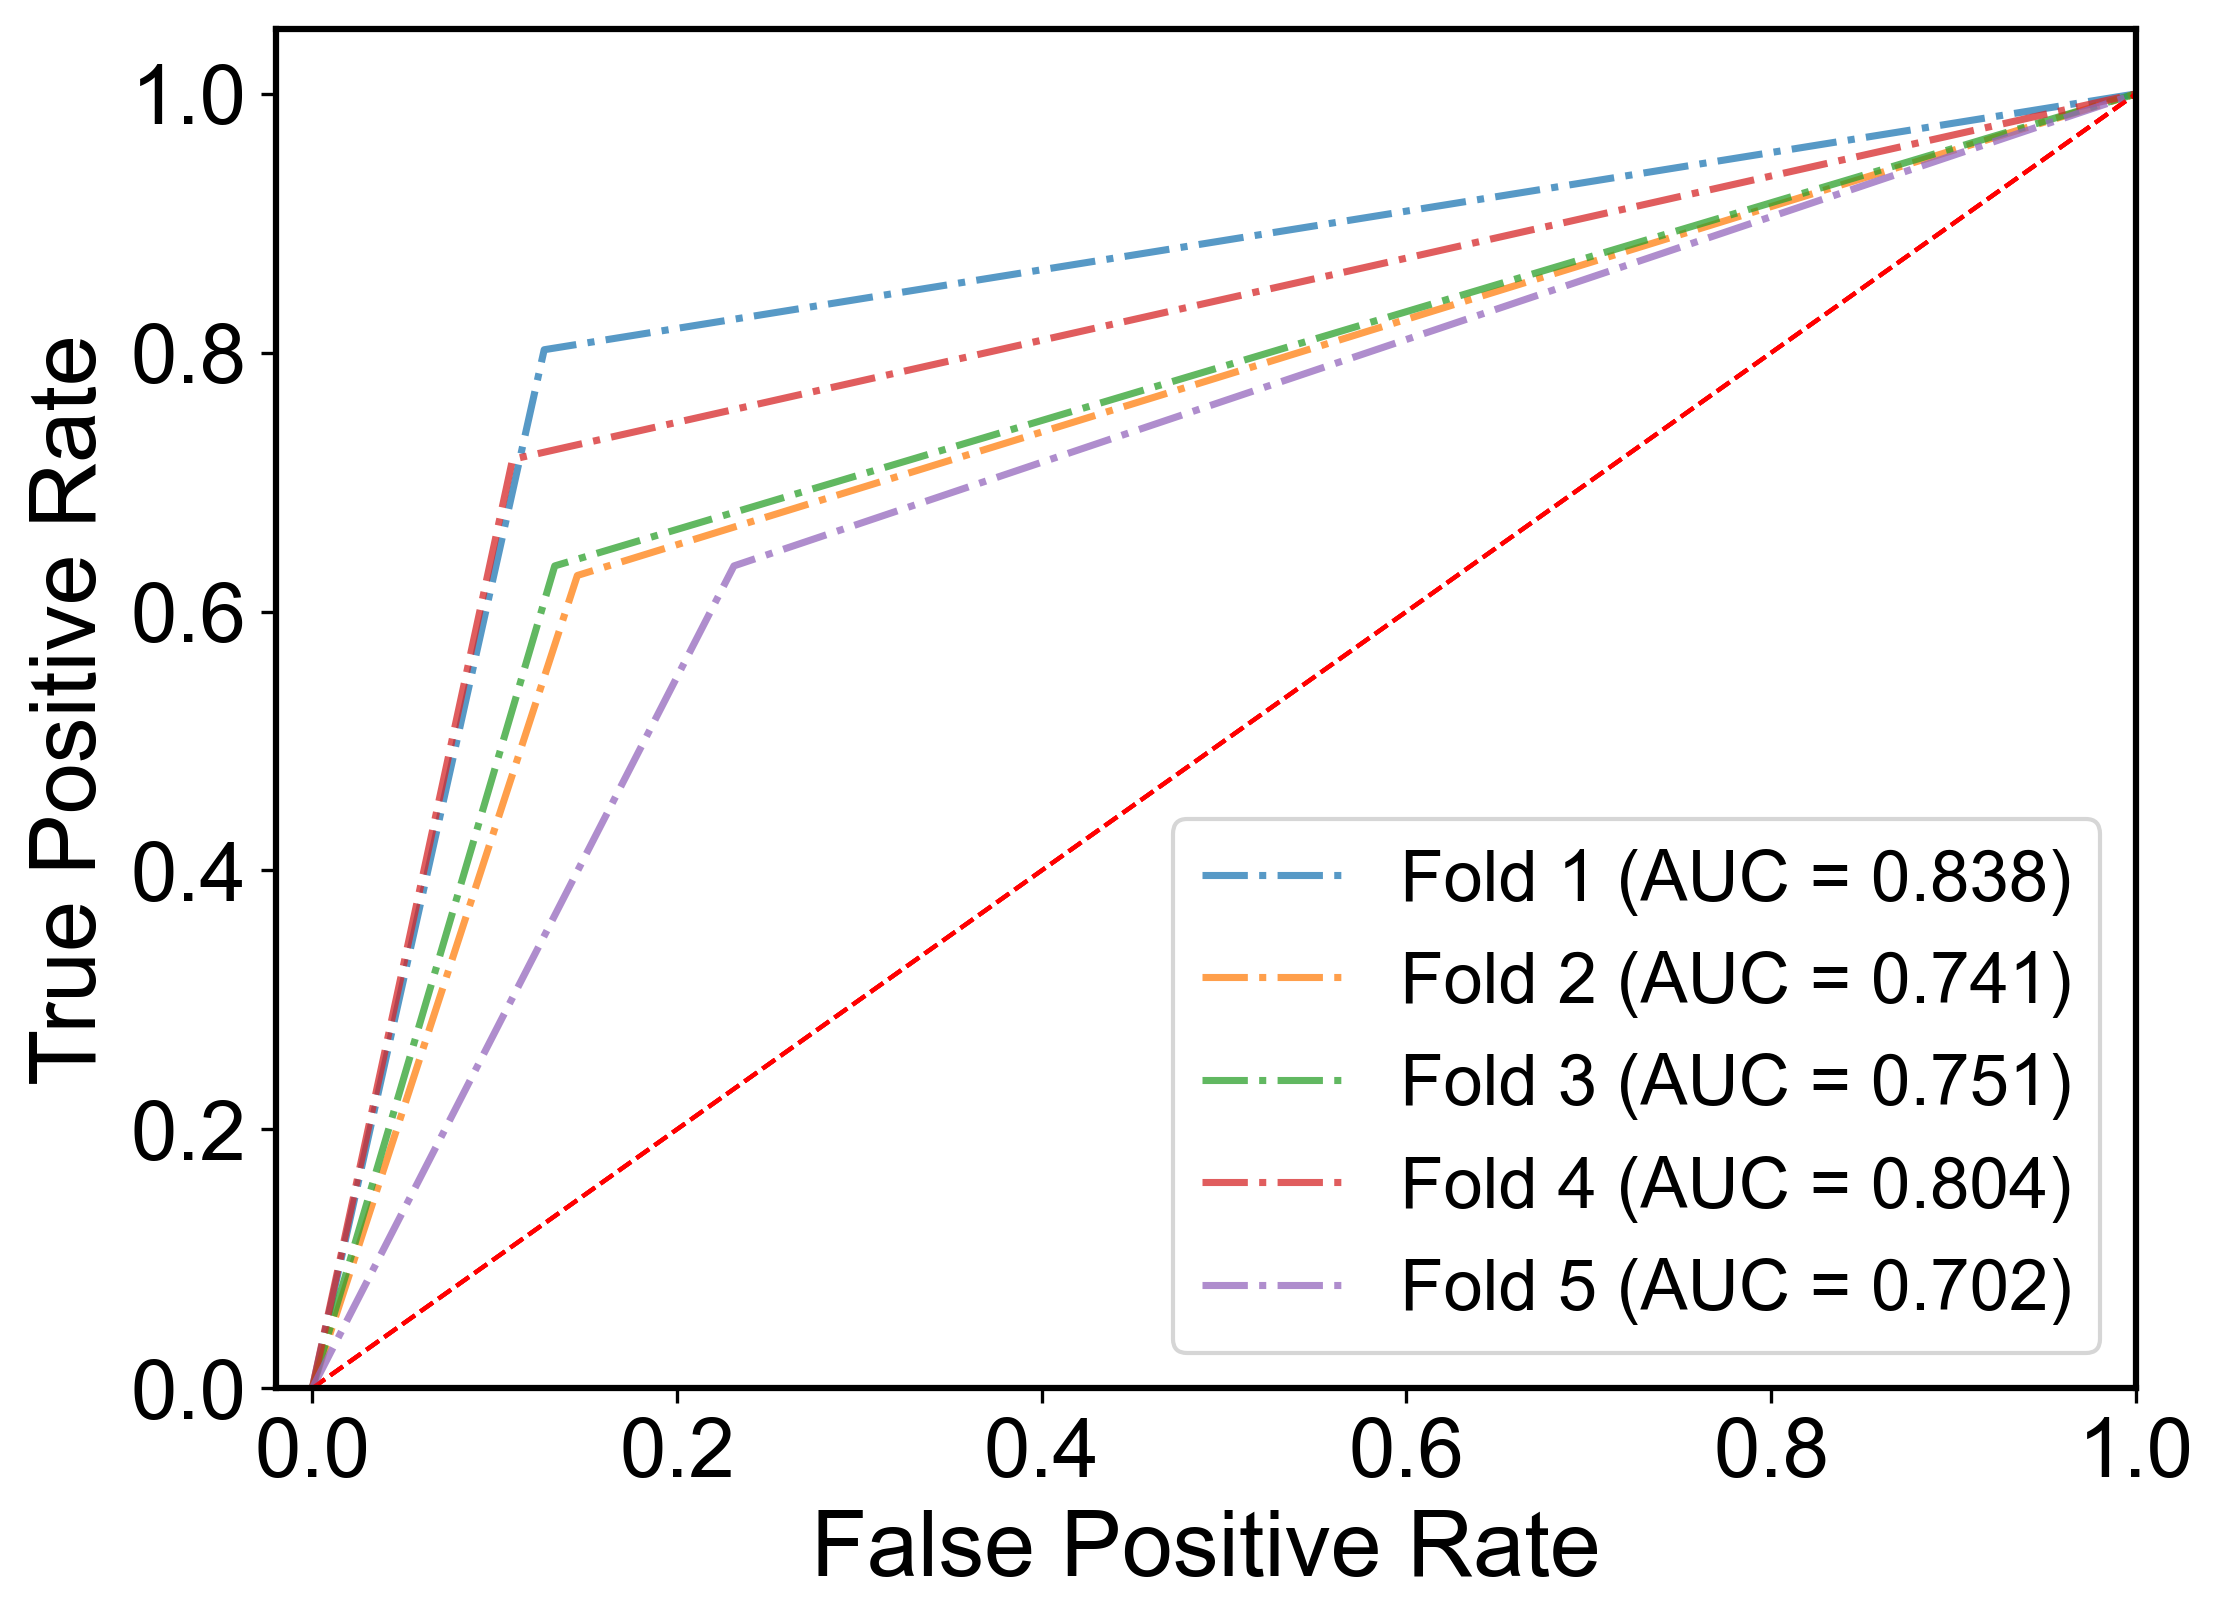

({'accuracy': 0.7954655652330072,
  'f1-score': 0.6887238065724951,
  'mcc': 0.5375804169620656,
  'roc_auc': 0.7671962945683718,
  'recall': 0.6836935704514364},
 [DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42)])

In [12]:
fold5_ensemble(dt, X, y)

Fold 1 Accuracy: 0.8803088803088803 F1_Score: 0.8098159509202453  ROC_AUC: 0.9405498050813281
Fold 2 Accuracy: 0.8372093023255814 F1_Score: 0.7439024390243903  ROC_AUC: 0.9223904813412654
Fold 3 Accuracy: 0.8565891472868217 F1_Score: 0.7672955974842768  ROC_AUC: 0.9307718463107785
Fold 4 Accuracy: 0.8643410852713178 F1_Score: 0.7770700636942675  ROC_AUC: 0.9139748384903092
Fold 5 Accuracy: 0.8294573643410853 F1_Score: 0.7317073170731707  ROC_AUC: 0.9127507650459028


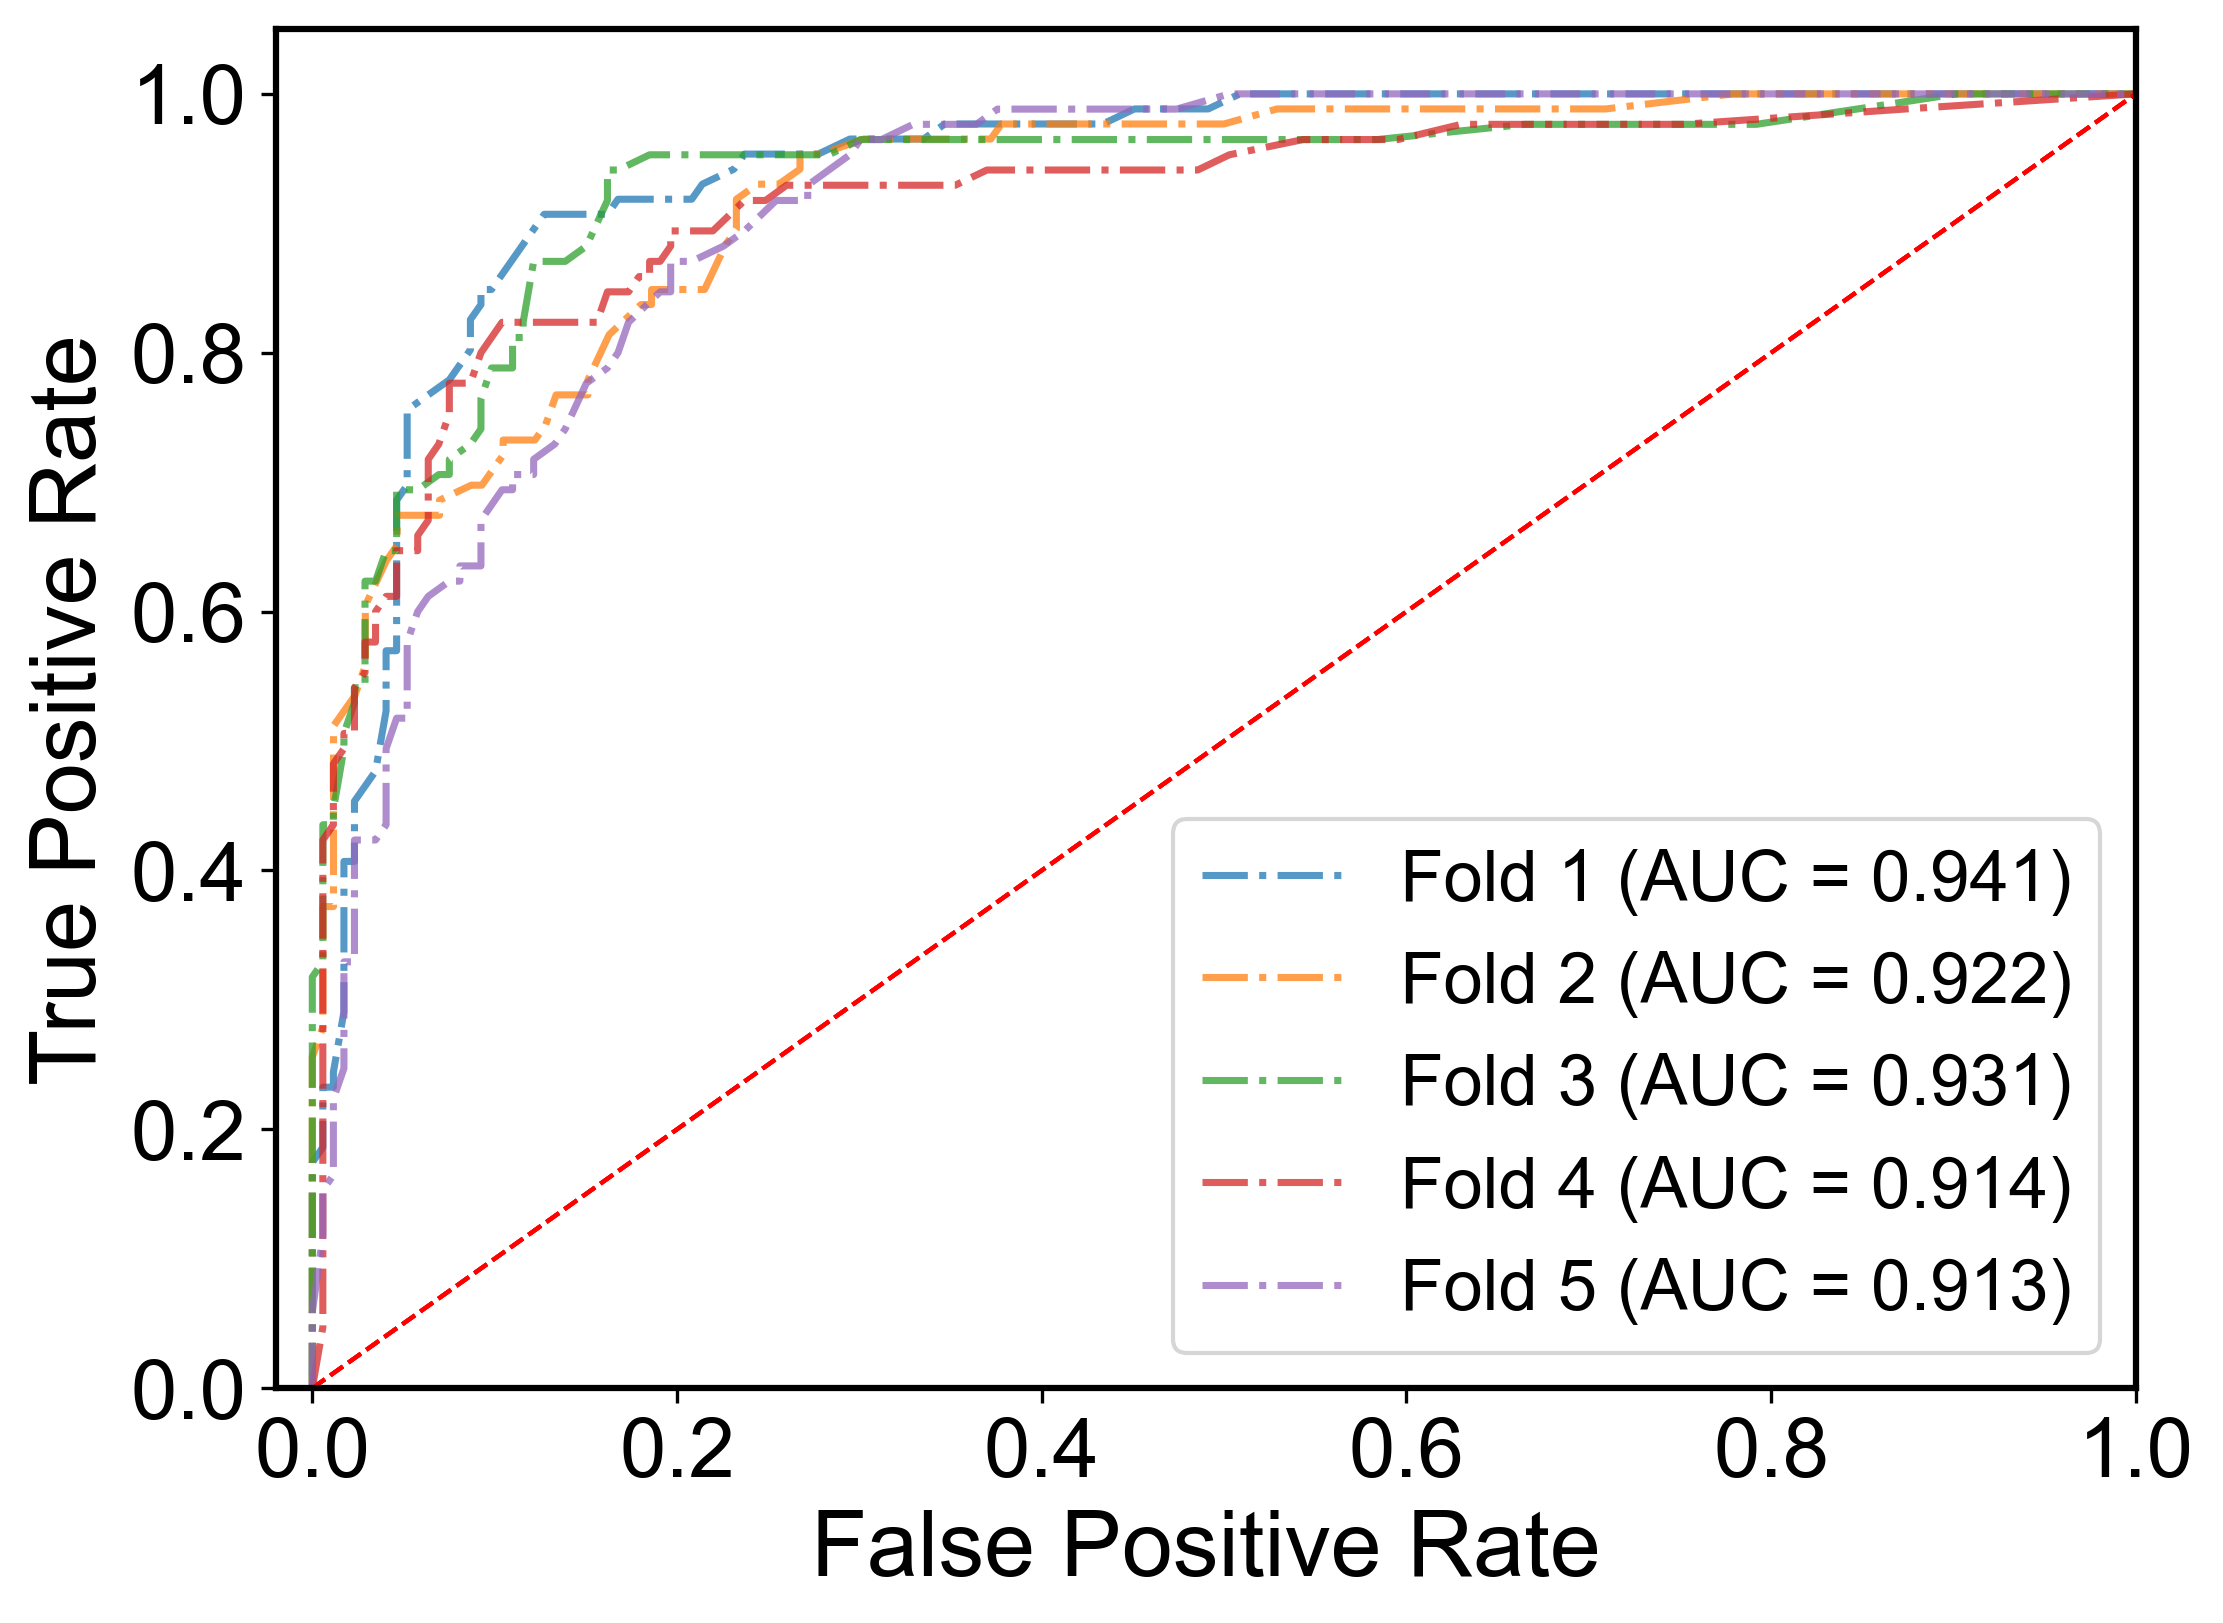

({'accuracy': 0.8535811559067372,
  'f1-score': 0.7659582736392702,
  'mcc': 0.6625472826235816,
  'roc_auc': 0.9240875472539167,
  'recall': 0.7235841313269494},
 [RandomForestClassifier(n_jobs=-1, random_state=42),
  RandomForestClassifier(n_jobs=-1, random_state=42),
  RandomForestClassifier(n_jobs=-1, random_state=42),
  RandomForestClassifier(n_jobs=-1, random_state=42),
  RandomForestClassifier(n_jobs=-1, random_state=42)])

In [13]:
fold5_ensemble(rf, X, y)

Fold 1 Accuracy: 0.8687258687258688 F1_Score: 0.7976190476190477  ROC_AUC: 0.94293587847829
Fold 2 Accuracy: 0.8565891472868217 F1_Score: 0.7757575757575758  ROC_AUC: 0.9278664142779881
Fold 3 Accuracy: 0.8643410852713178 F1_Score: 0.7928994082840236  ROC_AUC: 0.9390683441006461
Fold 4 Accuracy: 0.875968992248062 F1_Score: 0.8048780487804879  ROC_AUC: 0.9381842910574635
Fold 5 Accuracy: 0.8488372093023255 F1_Score: 0.7664670658682634  ROC_AUC: 0.917783066984019


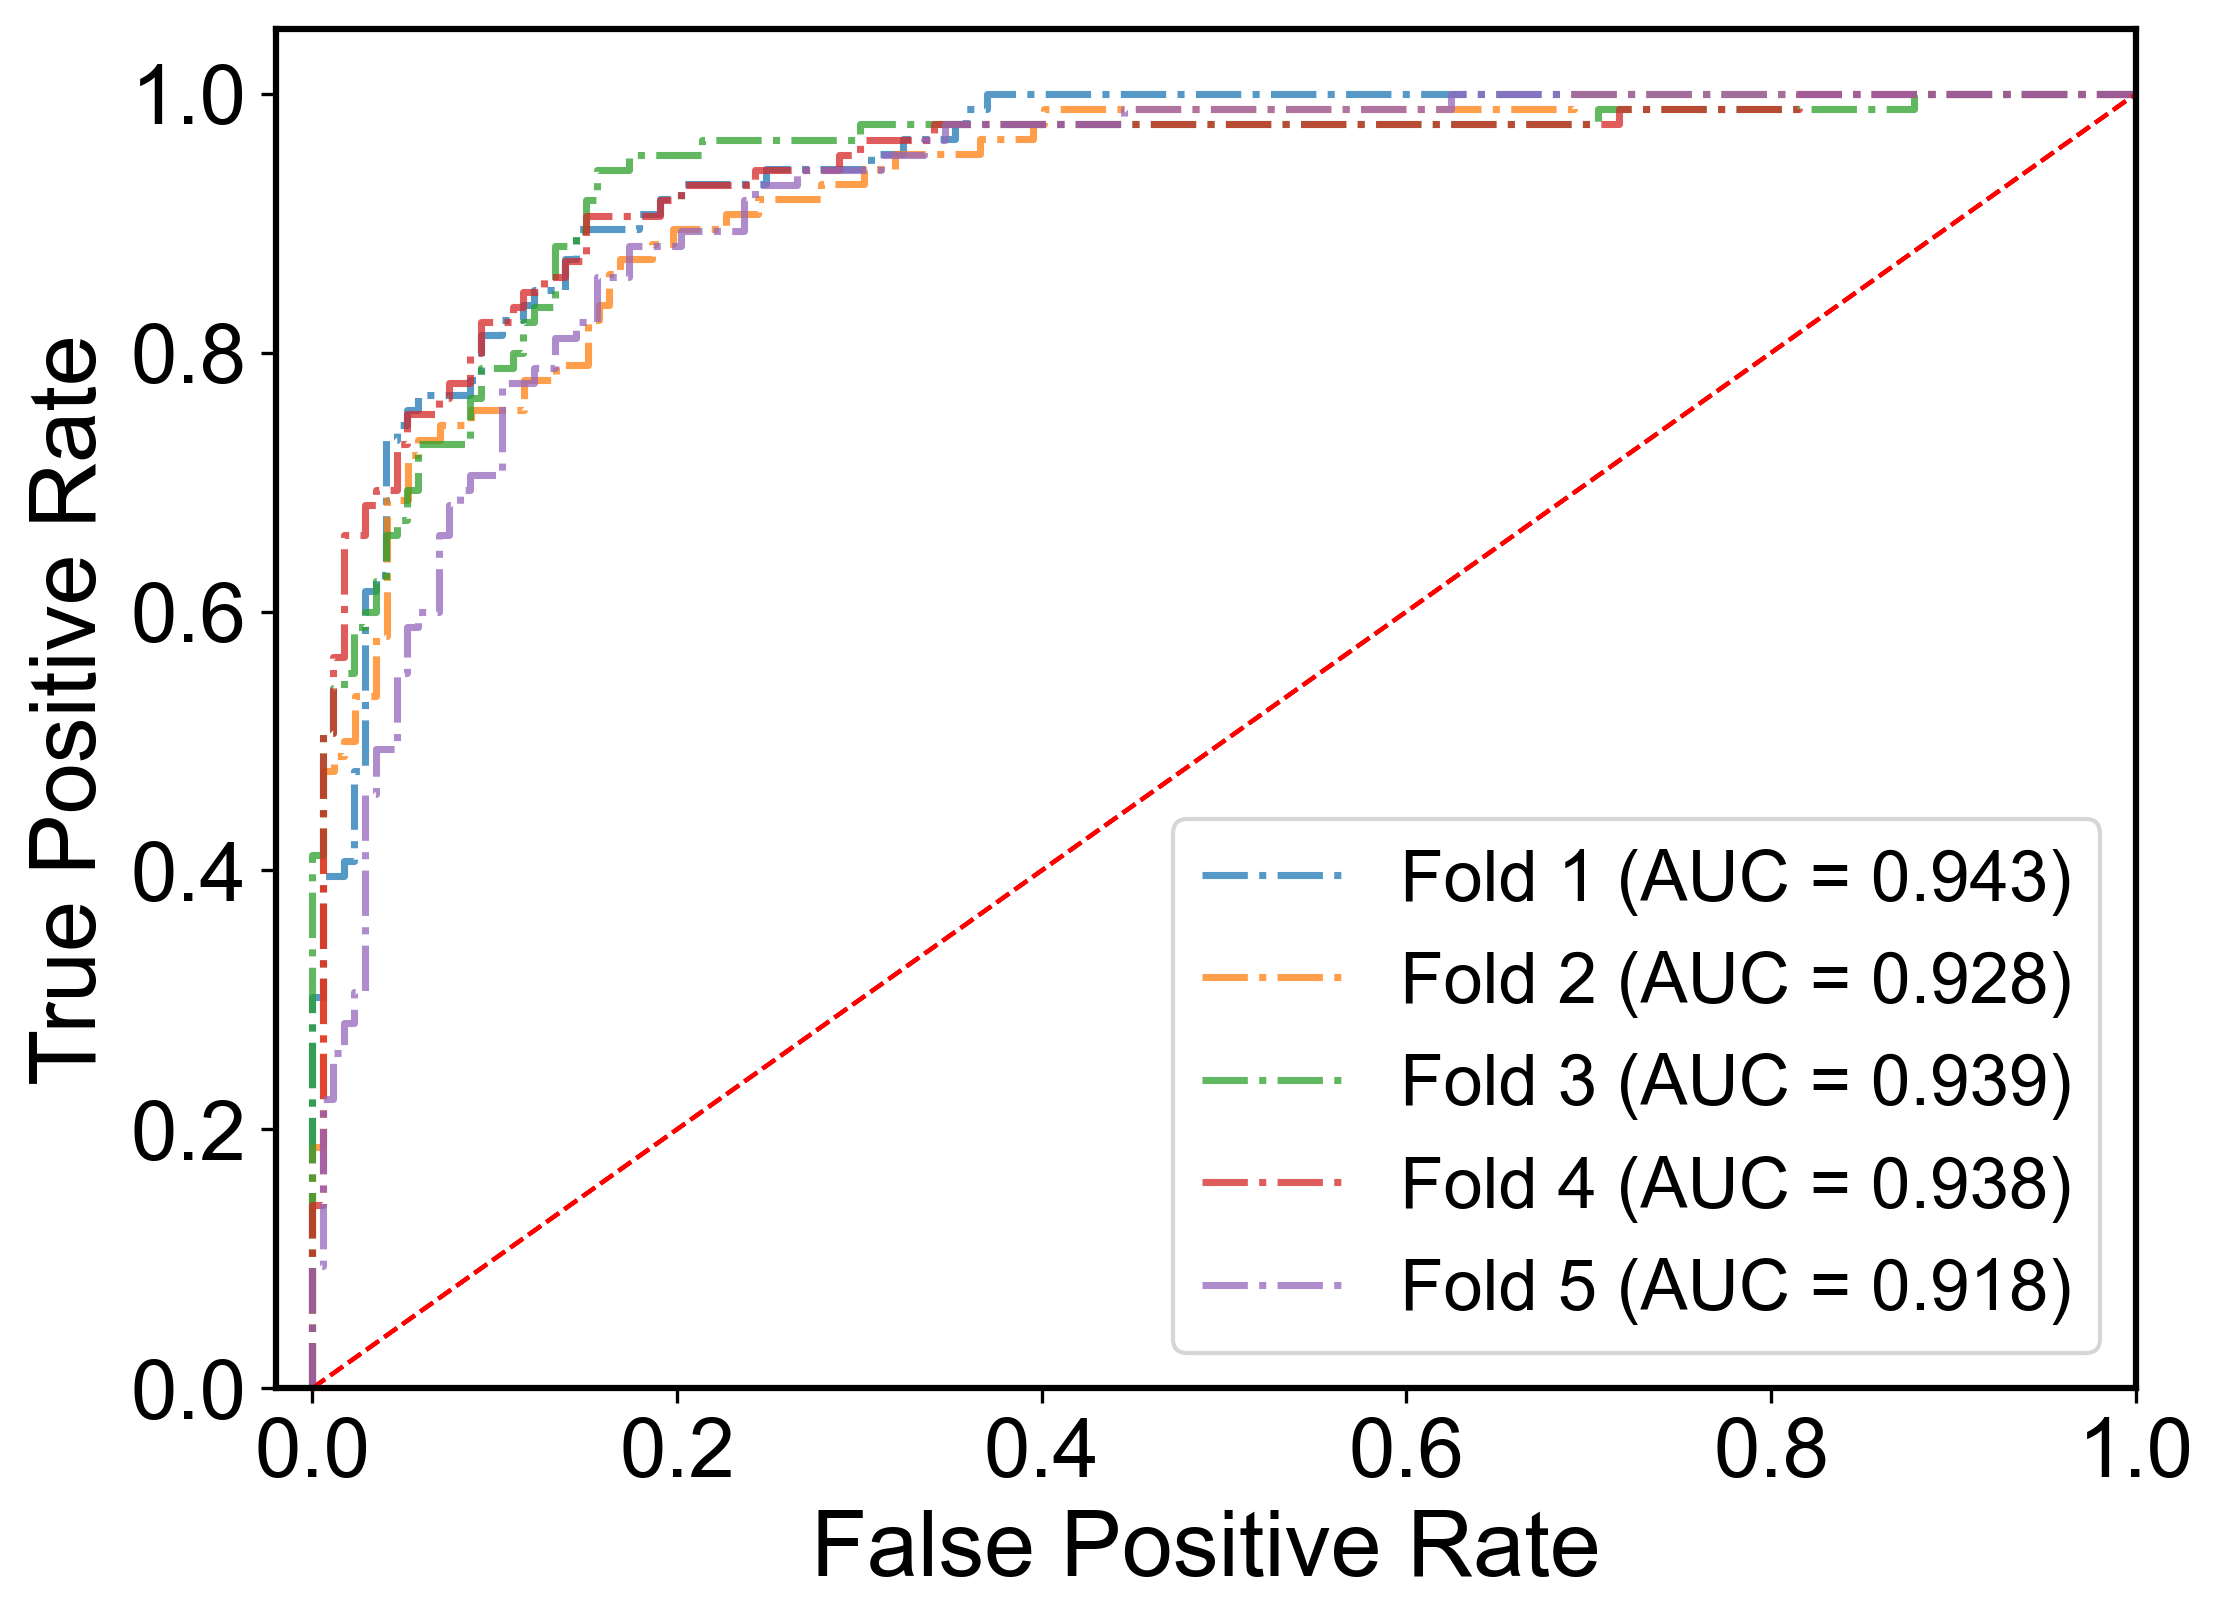

({'accuracy': 0.8628924605668791,
  'f1-score': 0.7875242292618797,
  'mcc': 0.6870334808019539,
  'roc_auc': 0.9331675989796814,
  'recall': 0.7681805745554036},
 [LGBMClassifier(random_state=42, verbose=0),
  LGBMClassifier(random_state=42, verbose=0),
  LGBMClassifier(random_state=42, verbose=0),
  LGBMClassifier(random_state=42, verbose=0),
  LGBMClassifier(random_state=42, verbose=0)])

In [14]:
fold5_ensemble(lgbm, X, y)

Fold 1 Accuracy: 0.8918918918918919 F1_Score: 0.8352941176470589  ROC_AUC: 0.9451539185374378
Fold 2 Accuracy: 0.8682170542635659 F1_Score: 0.7951807228915662  ROC_AUC: 0.9362493239588967
Fold 3 Accuracy: 0.8488372093023255 F1_Score: 0.7745664739884393  ROC_AUC: 0.9334240054403263
Fold 4 Accuracy: 0.875968992248062 F1_Score: 0.8072289156626505  ROC_AUC: 0.9336960217613057
Fold 5 Accuracy: 0.8372093023255814 F1_Score: 0.7529411764705881  ROC_AUC: 0.907514450867052


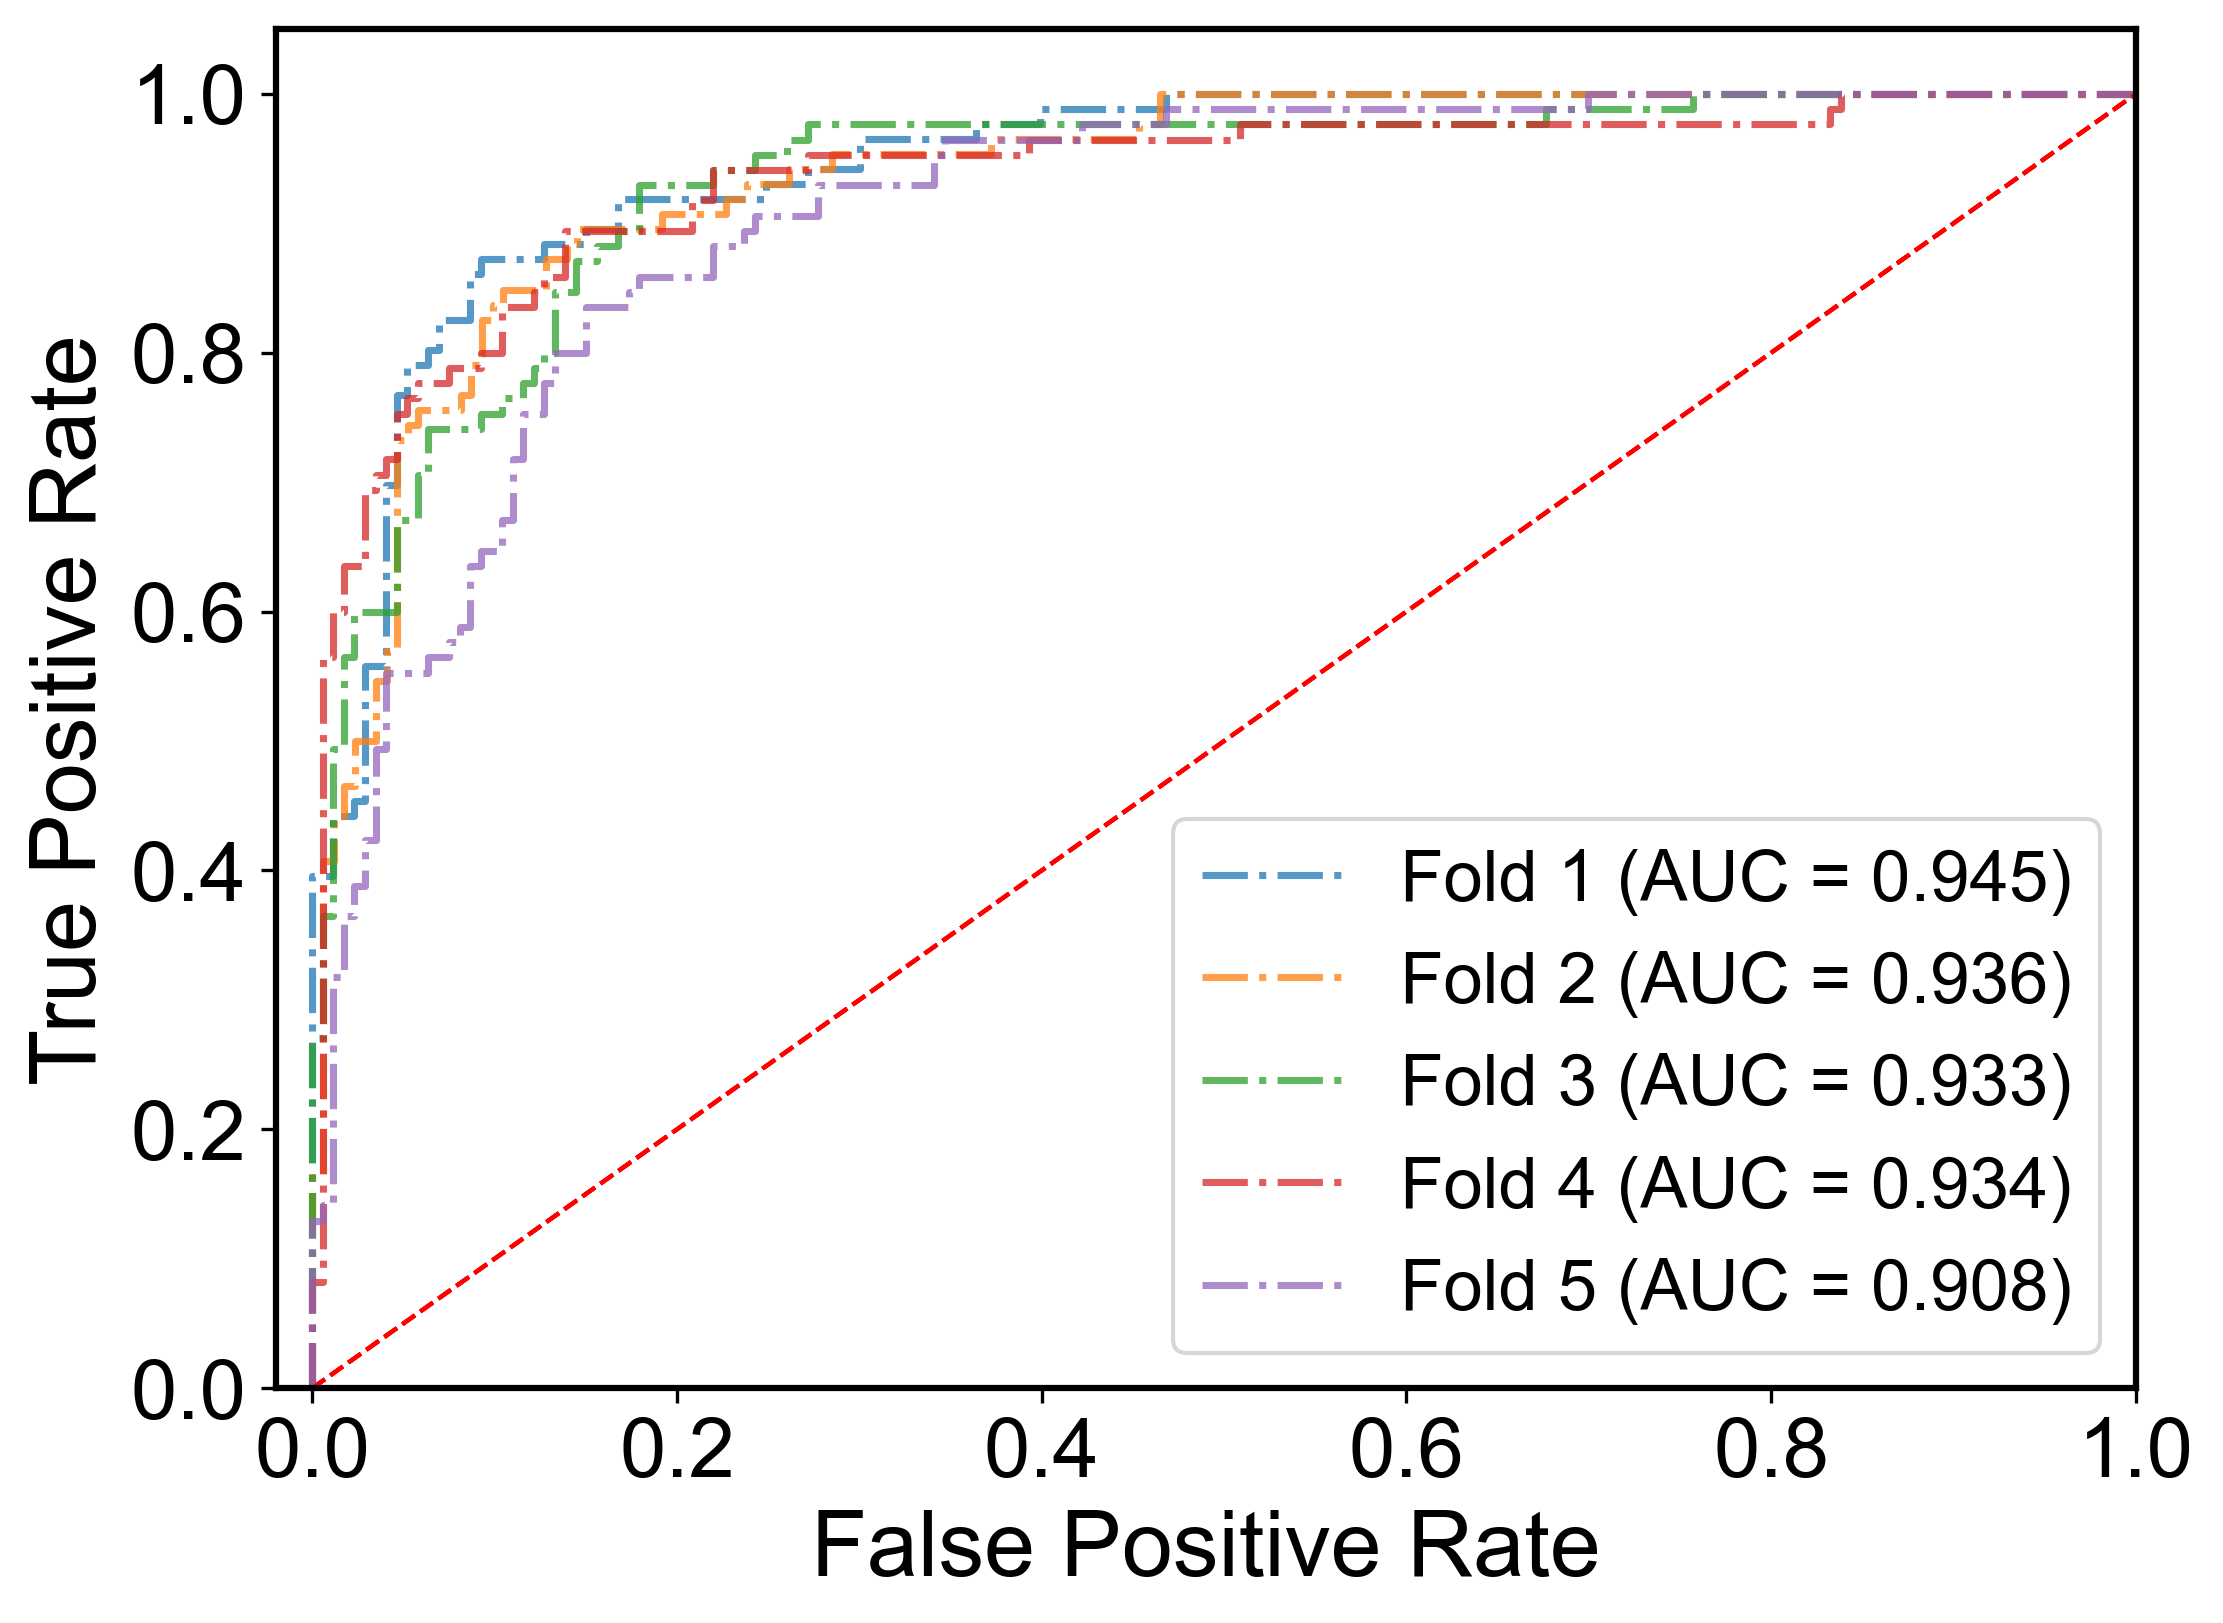

({'accuracy': 0.8644248900062852,
  'f1-score': 0.7930422813320606,
  'mcc': 0.692641668340341,
  'roc_auc': 0.9312075441130038,
  'recall': 0.7844870041039671},
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=-1,
                num_parallel_tree=None, random_state=42, ...),
  XGBClassifier(base_score=None, booster=None, callbacks=None

In [15]:
fold5_ensemble(xb, X, y)

Fold 1 Accuracy: 0.8957528957528957 F1_Score: 0.8363636363636363  ROC_AUC: 0.9412219384325851
Fold 2 Accuracy: 0.8488372093023255 F1_Score: 0.7664670658682634  ROC_AUC: 0.9168807463493781
Fold 3 Accuracy: 0.8255813953488372 F1_Score: 0.7169811320754716  ROC_AUC: 0.9162189731383883
Fold 4 Accuracy: 0.8604651162790697 F1_Score: 0.7777777777777777  ROC_AUC: 0.9080584835090105
Fold 5 Accuracy: 0.8410852713178295 F1_Score: 0.7657142857142857  ROC_AUC: 0.9086025161509691


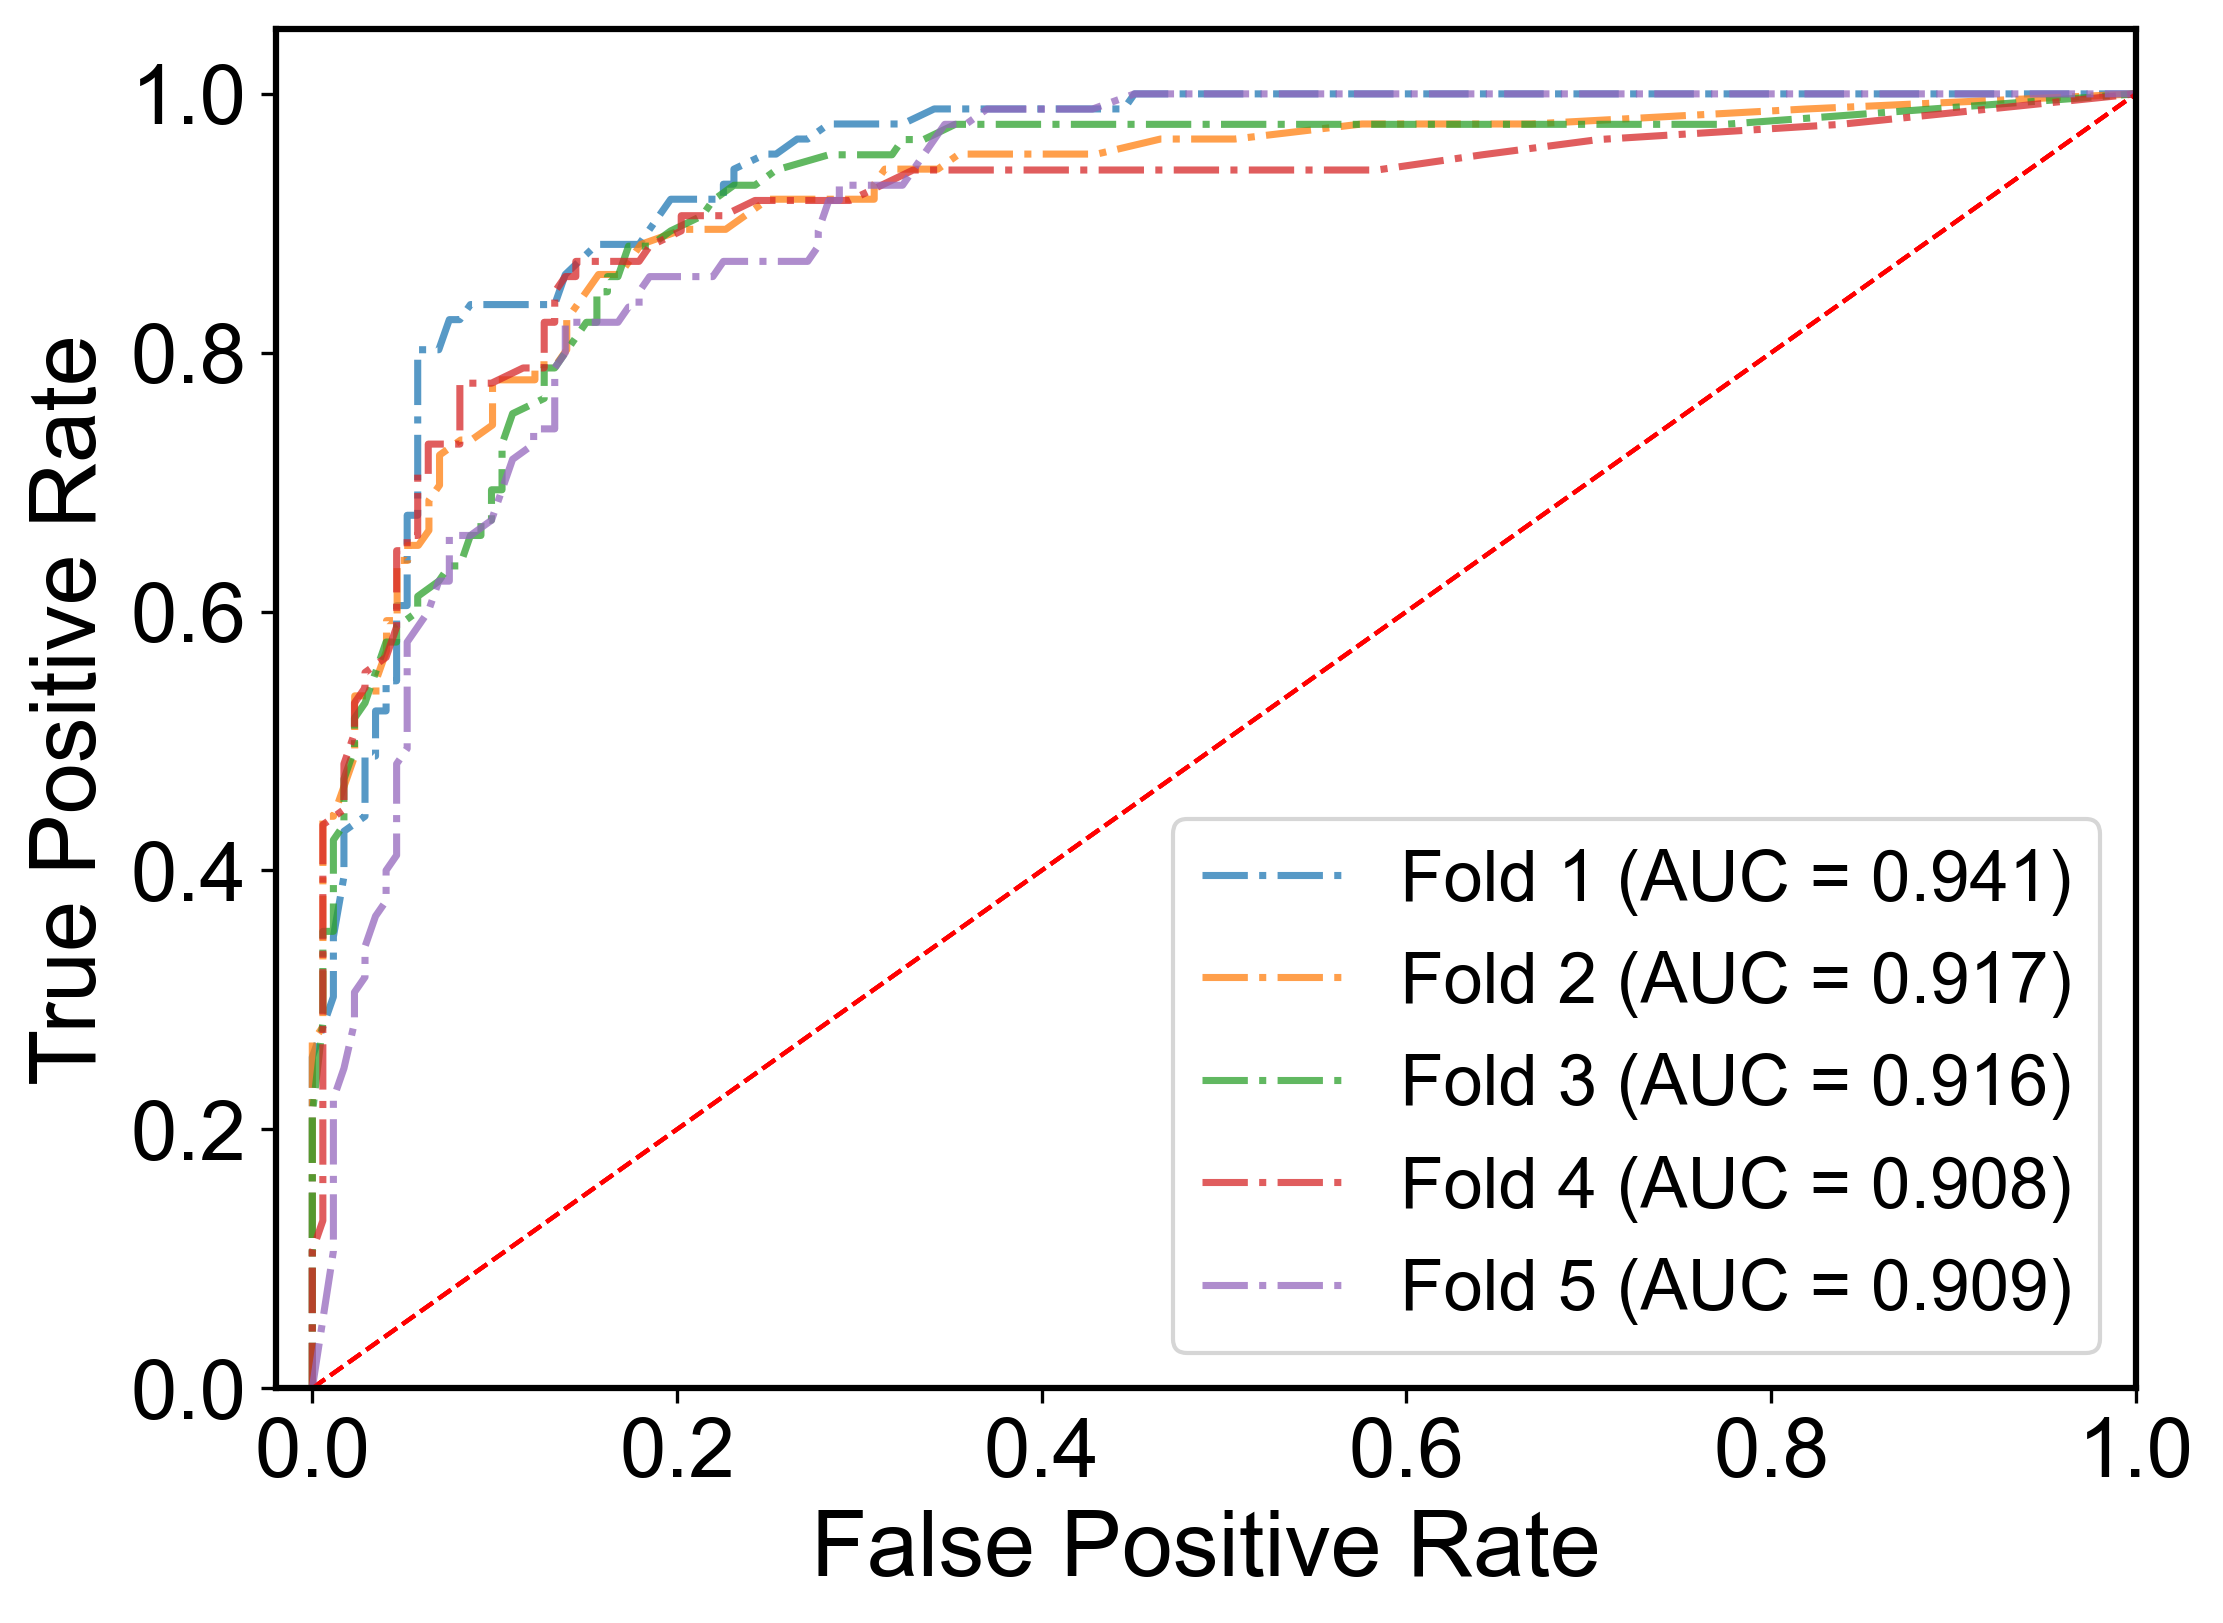

({'accuracy': 0.8543443776001916,
  'f1-score': 0.7726607795598869,
  'mcc': 0.667252504069903,
  'roc_auc': 0.9181965315160662,
  'recall': 0.7493023255813953},
 [ExtraTreesClassifier(n_jobs=-1, random_state=42),
  ExtraTreesClassifier(n_jobs=-1, random_state=42),
  ExtraTreesClassifier(n_jobs=-1, random_state=42),
  ExtraTreesClassifier(n_jobs=-1, random_state=42),
  ExtraTreesClassifier(n_jobs=-1, random_state=42)])

In [16]:
fold5_ensemble(ext, X, y)

Fold 1 Accuracy: 0.861003861003861 F1_Score: 0.783132530120482  ROC_AUC: 0.9354751982793387
Fold 2 Accuracy: 0.8217054263565892 F1_Score: 0.7124999999999999  ROC_AUC: 0.9115738236884803
Fold 3 Accuracy: 0.8837209302325582 F1_Score: 0.8148148148148148  ROC_AUC: 0.9414484869092147
Fold 4 Accuracy: 0.8682170542635659 F1_Score: 0.7976190476190476  ROC_AUC: 0.9180550833049982
Fold 5 Accuracy: 0.8410852713178295 F1_Score: 0.7544910179640718  ROC_AUC: 0.9065283917035022


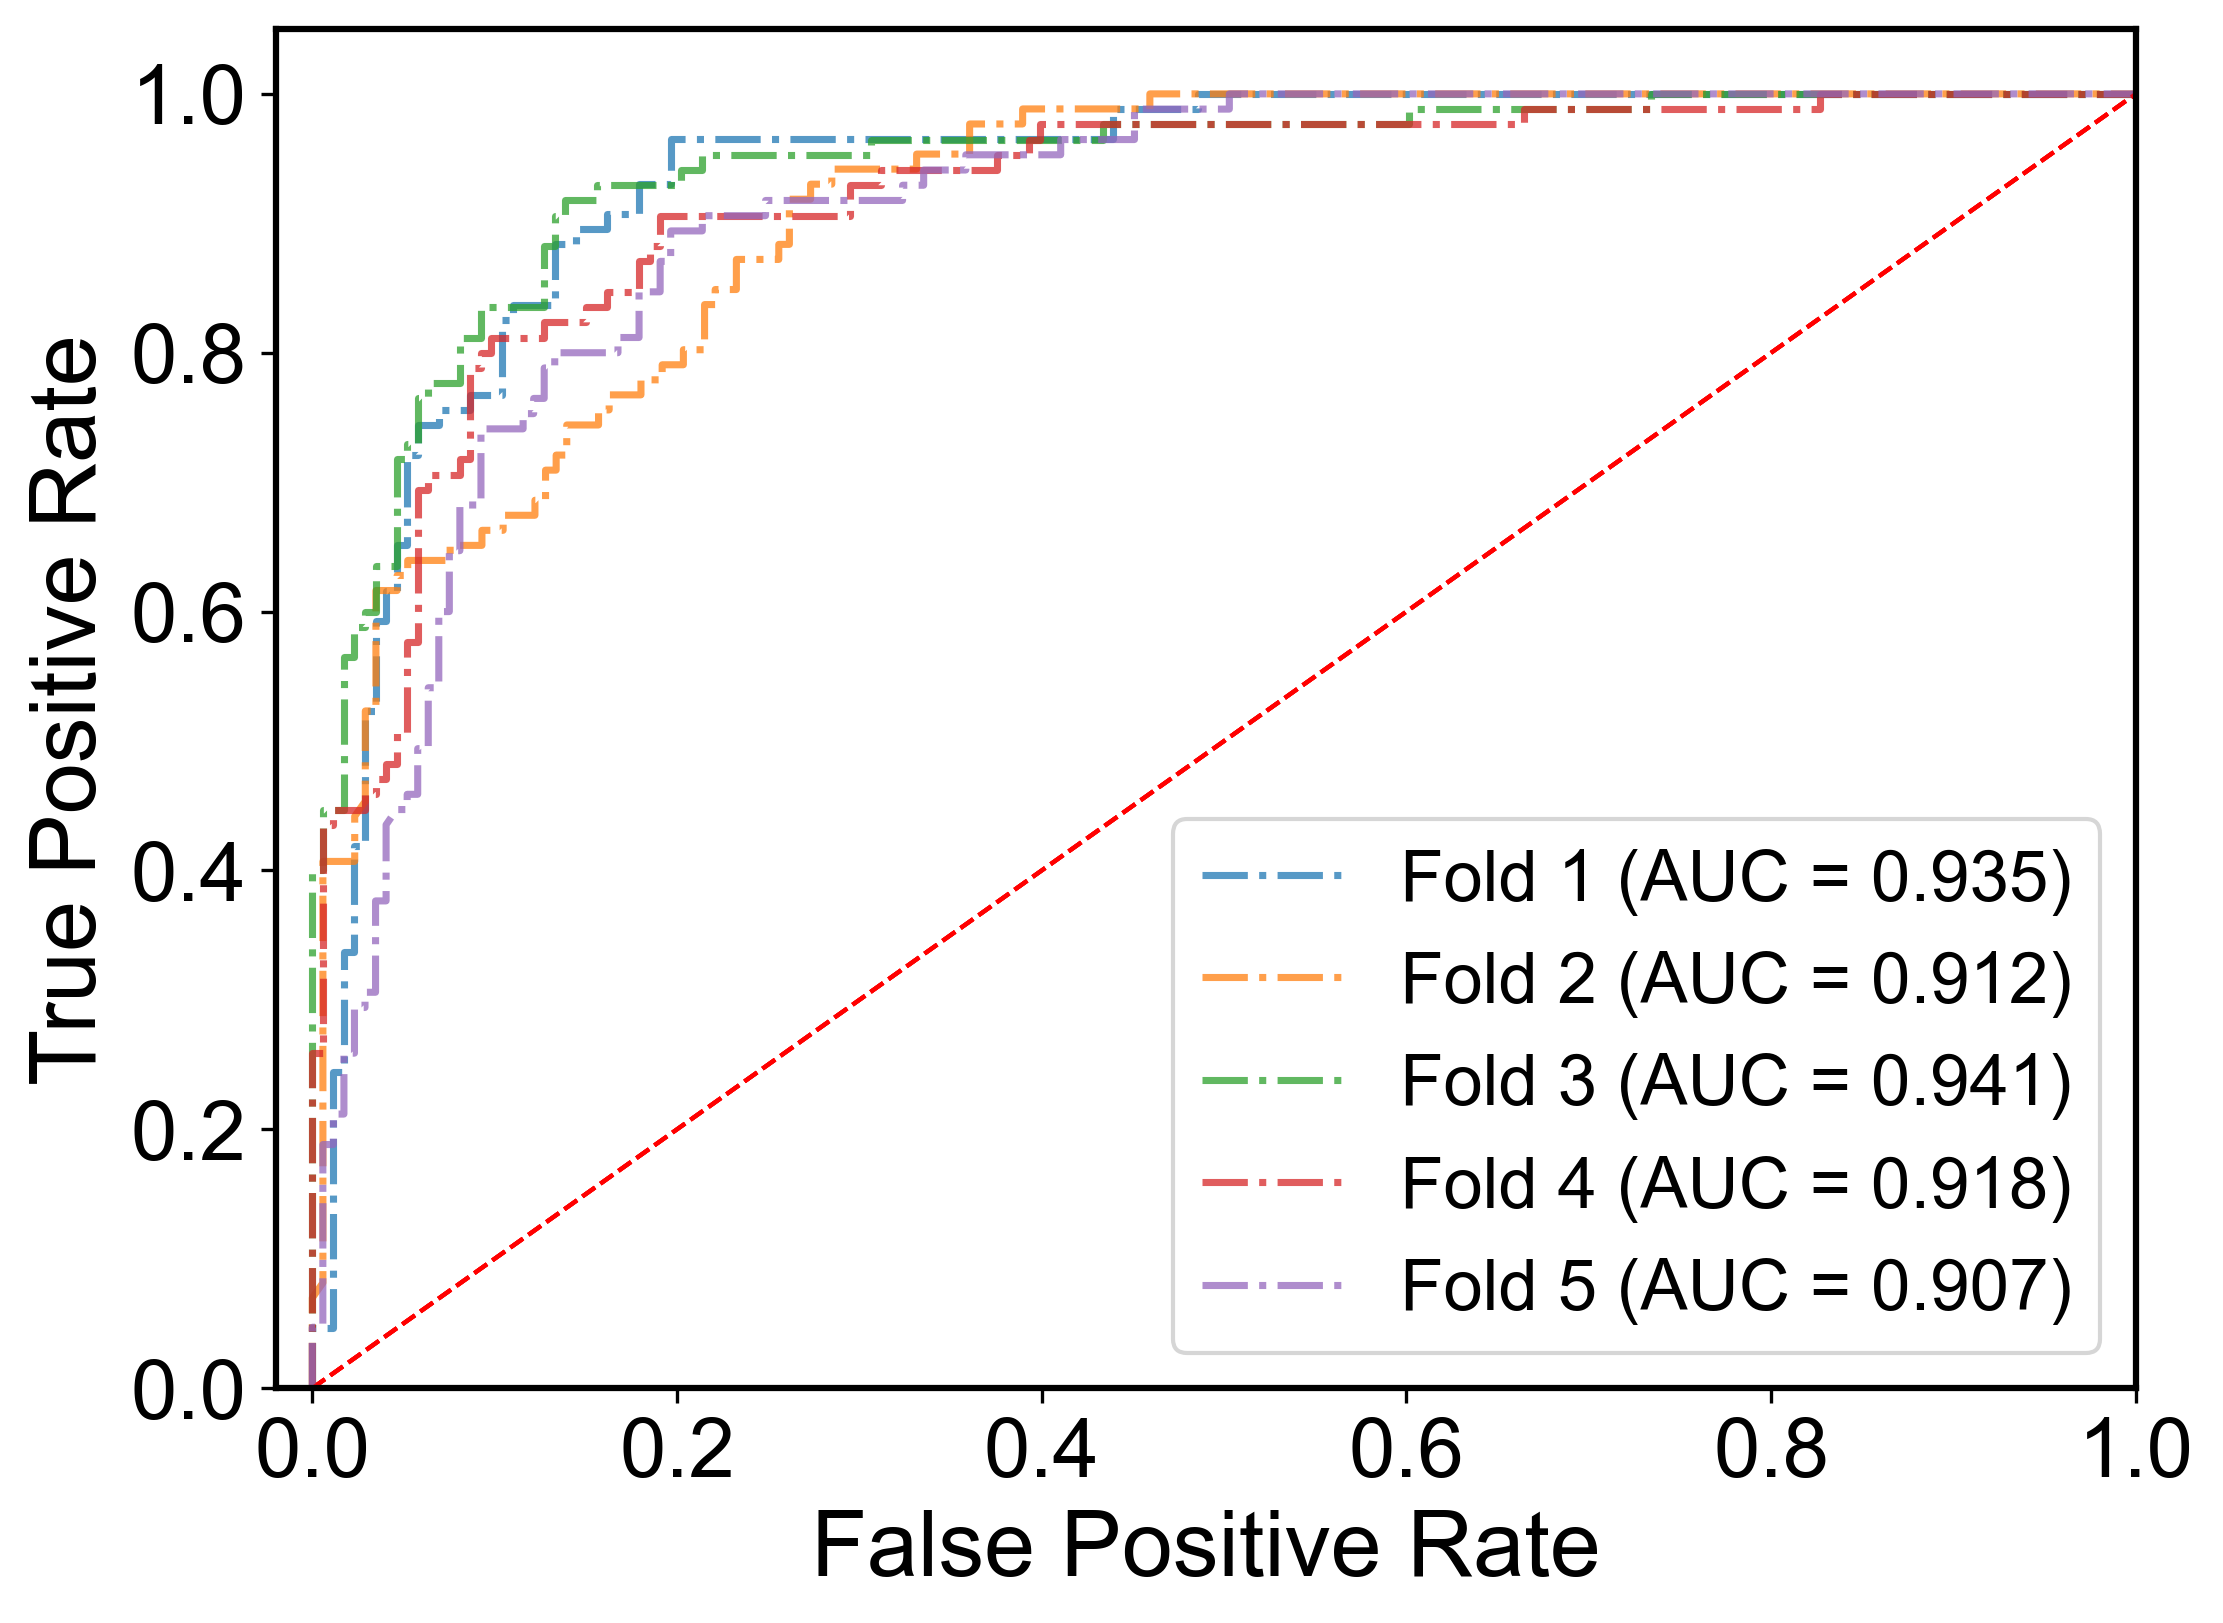

({'accuracy': 0.8551465086348806,
  'f1-score': 0.7725114821036831,
  'mcc': 0.6678859678066247,
  'roc_auc': 0.9226161967771068,
  'recall': 0.7448974008207934},
 [GradientBoostingClassifier(random_state=42),
  GradientBoostingClassifier(random_state=42),
  GradientBoostingClassifier(random_state=42),
  GradientBoostingClassifier(random_state=42),
  GradientBoostingClassifier(random_state=42)])

In [17]:
fold5_ensemble(gbc, X, y)

In [18]:
df1 = pd.concat([X, y],axis=1)

In [19]:
from joblib import Parallel, delayed
from time import time
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

def init_population(n, c):
    return np.array([[math.ceil(e) for e in pop] for pop in (np.random.rand(n, c) - 0.5)]), np.zeros((2, c)) - 1
def single_point_crossover(population):
    r,c, n = population.shape[0], population.shape[1], np.random.randint(1,population.shape[1])         
    for i in range(0,r,2):                
        population[i], population[i+1] = np.append(population[i][0:n],population[i+1][n:c]),np.append(population[i+1][0:n],population[i][n:c])        
    return population
def flip_mutation(population):
    return population.max() - population
def random_selection(population):
    r = population.shape[0]
    new_population = population.copy()    
    for i in range(r):        
        new_population[i] = population[np.random.randint(0, r)]
    return new_population
def predictive_model_cv(X, y, model, selected_features):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    # 5-fold CV
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index][selected_features], X.iloc[test_index][selected_features]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
        mdl = model
        mdl.fit(X_train_balanced, y_train_balanced)
        y_pred = mdl.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
    return np.mean(scores)
def individual_fitness_cv(individual, data, feature_list, target, model):
    # based on individual selection characteristics
    selected_features = [feature_list[j] for j in range(individual.shape[0]) if individual[j] == 1]
    # evaluate the performance of individual models
    return predictive_model_cv(data[selected_features], data[target], model, selected_features)
def get_fitness_cv(data, feature_list, target, population, model):
    fitness = Parallel(n_jobs=-1)(delayed(individual_fitness_cv)(individual, data, feature_list, target, model) for individual in population)
    return np.array(fitness)

def memorize(pop, memory):      
    return np.append(memory, pop.reshape(1, memory.shape[1]), axis=0)

def replace_duplicate(population, memory):    
    for i in range(population.shape[0]):         
        counter = 0                
        while any(np.all(memory == population[i], axis=1)) and (counter < 100): 
            population[i] = np.array([math.ceil(k) for k in (np.random.rand(population.shape[1]) - 0.5)])                    
            counter += 1                    
        memory = memorize(population[i], memory)   
    return population, memory

def ga(data, feature_list, target, n, max_iter, model):
    c = len(feature_list)
    population, memory = init_population(n, c)
    population, memory = replace_duplicate(population, memory)
    
    fitness = get_fitness_cv(data, feature_list, target, population, model)
    optimal_value = max(fitness)
    optimal_solution = population[np.where(fitness == optimal_value)][0]
    
    for i in range(max_iter): 
        start = time()
        population = random_selection(population)
        population = single_point_crossover(population)
        if np.random.rand() < 0.3:
            population = flip_mutation(population)
        
        population, memory = replace_duplicate(population, memory)
        fitness = get_fitness_cv(data, feature_list, target, population, model)
        
        if max(fitness) > optimal_value:
            optimal_value = max(fitness)
            optimal_solution = population[np.where(fitness == optimal_value)][0]
        end = time()
        print(f"The {i+1}th iteration T = {end - start:.4f}second")
    return optimal_solution, optimal_value

In [20]:
model = XGBClassifier( n_jobs=-1, random_state=42)
target = 'marker'
feature_list = [i for i in df1.columns if i not in target]

from time import time
start = time()
feature_set, optimize_accuracy = ga(df1, feature_list, target, 10, 1000, model)
end = time()
print(f"operating time T = %0.4f" % (end - start))

feature_set = [feature_list[i] for i in range(len(feature_list)) if feature_set[i] == 1]
print('Optimal Feature Set\n', feature_set, '\nOptimal Accuracy =', round(optimize_accuracy * 100), '%')

The 1th iteration T = 1.4899second
The 2th iteration T = 1.5530second
The 3th iteration T = 1.6018second
The 4th iteration T = 1.5534second
The 5th iteration T = 1.4223second
The 6th iteration T = 1.6285second
The 7th iteration T = 1.5515second
The 8th iteration T = 1.6787second
The 9th iteration T = 1.5965second
The 10th iteration T = 1.3430second
The 11th iteration T = 0.9001second
The 12th iteration T = 0.8057second
The 13th iteration T = 1.1875second
The 14th iteration T = 0.7988second
The 15th iteration T = 0.7845second
The 16th iteration T = 0.7315second
The 17th iteration T = 0.7379second
The 18th iteration T = 0.7024second
The 19th iteration T = 1.4911second
The 20th iteration T = 0.9364second
The 21th iteration T = 0.8928second
The 22th iteration T = 0.7474second
The 23th iteration T = 0.9680second
The 24th iteration T = 0.8871second
The 25th iteration T = 0.8881second
The 26th iteration T = 0.8561second
The 27th iteration T = 0.8454second
The 28th iteration T = 0.9352second
T

The 233th iteration T = 0.7274second
The 234th iteration T = 0.7719second
The 235th iteration T = 0.7598second
The 236th iteration T = 0.6965second
The 237th iteration T = 0.7374second
The 238th iteration T = 0.7897second
The 239th iteration T = 0.7518second
The 240th iteration T = 0.8413second
The 241th iteration T = 0.7123second
The 242th iteration T = 0.7281second
The 243th iteration T = 0.7063second
The 244th iteration T = 0.6665second
The 245th iteration T = 0.7112second
The 246th iteration T = 0.8251second
The 247th iteration T = 0.7993second
The 248th iteration T = 0.7535second
The 249th iteration T = 0.8020second
The 250th iteration T = 0.7629second
The 251th iteration T = 0.6582second
The 252th iteration T = 0.6487second
The 253th iteration T = 0.7930second
The 254th iteration T = 0.7356second
The 255th iteration T = 0.7556second
The 256th iteration T = 0.7162second
The 257th iteration T = 0.7491second
The 258th iteration T = 0.7839second
The 259th iteration T = 0.7200second
T

The 455th iteration T = 0.7086second
The 456th iteration T = 0.7205second
The 457th iteration T = 0.7518second
The 458th iteration T = 0.6580second
The 459th iteration T = 0.6491second
The 460th iteration T = 0.7716second
The 461th iteration T = 0.6908second
The 462th iteration T = 0.6948second
The 463th iteration T = 0.7102second
The 464th iteration T = 0.7151second
The 465th iteration T = 0.6876second
The 466th iteration T = 0.6599second
The 467th iteration T = 0.6941second
The 468th iteration T = 0.7025second
The 469th iteration T = 0.7386second
The 470th iteration T = 0.7039second
The 471th iteration T = 0.7084second
The 472th iteration T = 0.7881second
The 473th iteration T = 0.7696second
The 474th iteration T = 0.6695second
The 475th iteration T = 0.7194second
The 476th iteration T = 0.7526second
The 477th iteration T = 0.6810second
The 478th iteration T = 0.7371second
The 479th iteration T = 0.7088second
The 480th iteration T = 0.6720second
The 481th iteration T = 0.7843second
T

The 677th iteration T = 0.7407second
The 678th iteration T = 0.6422second
The 679th iteration T = 0.8004second
The 680th iteration T = 0.7131second
The 681th iteration T = 0.7926second
The 682th iteration T = 0.7326second
The 683th iteration T = 0.7560second
The 684th iteration T = 0.7355second
The 685th iteration T = 0.7133second
The 686th iteration T = 0.7239second
The 687th iteration T = 0.7419second
The 688th iteration T = 0.8068second
The 689th iteration T = 0.7539second
The 690th iteration T = 0.7513second
The 691th iteration T = 0.7298second
The 692th iteration T = 0.8522second
The 693th iteration T = 0.8281second
The 694th iteration T = 0.6996second
The 695th iteration T = 0.7800second
The 696th iteration T = 0.6793second
The 697th iteration T = 0.7313second
The 698th iteration T = 0.6653second
The 699th iteration T = 0.6635second
The 700th iteration T = 0.7858second
The 701th iteration T = 0.7120second
The 702th iteration T = 0.7853second
The 703th iteration T = 0.8542second
T

In [13]:
#Optimal Feature Set
feature_xb =  ['B_Density', 'C_dipole Polarizability', 'C_atomic Radius', 'C_number', 'A_number of s+p Electrons', 'C_number of s+p Electrons',
               'A-C_Density', '(A+B+C)-X_dipole Polarizability', '(A+B+C)-X_atomic Radius', '(A+B+C)-X_number of Valence Electrons',
               'A-C_number', 'A-B_Period', 'A-C_Electronegativity', 'A-C_number of s+p Electrons', 'A-C_number of d Electrons', '(A+B+C)-X_number of d Electrons', 'A-C_Mulliken EN']  
#Optimal Accuracy = 88 %

In [14]:
X_xgb = X[feature_xb]

print(X_xgb.shape)

(1291, 17)


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
def fold5_ensemble_smote(model, X, y, name='', is_plot=True):
    if hasattr(X, "columns"):
        feature_columns = X.columns.tolist()
    else:
        feature_columns = [f"feature_{i}" for i in range(X.shape[1])]
    label_column = "target"  
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    models = []  
    accuracies = []
    f1s = []
    mccs = []
    roc_aucs = []
    recalls = []
    fig, ax = plt.subplots()
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        try:
            X = X.values
            y = y.values
        except:
            pass
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

        test_df = pd.DataFrame(X_test, columns=feature_columns)
        test_df[label_column] = y_test
        test_df.to_csv(f"./data/ml_eh_data/slme_eh_eh_test[{i}].csv", index=False)

        model.fit(X_train_balanced, y_train_balanced)
        models.append(model)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
  
        df_prob = pd.DataFrame({
            'true_label': y_test,
            'pred_label': y_pred,
            'predict_proba': [f"{p:.2f}" for p in y_prob]  
        })

        df_prob.to_csv(f'./data/ml_eh_data/fold{i}_predict_prob.csv', index=False)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        mcc = metrics.matthews_corrcoef(y_test, y_pred)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
        roc_auc = metrics.auc(fpr, tpr)
        recall = metrics.recall_score(y_test, y_pred)
  
        print(f"Fold {i+ 1} Accuracy: {accuracy} F1_Score: {f1}  ROC_AUC: {roc_auc}")
     
        accuracies.append(accuracy)
        f1s.append(f1)
        mccs.append(mcc)
        roc_aucs.append(roc_auc)
        recalls.append(recall)
   
        if is_plot:
            ax.plot(fpr, tpr, label=f"Fold {i+1} (AUC = {roc_auc:.3f})", lw=1.7, linestyle="-.", alpha=0.75)
            ax.plot([0, 1], [0, 1], "r--", lw=1, alpha=0.8)
            ax.set_xlim([-0.02, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel("False Positive Rate", fontsize=22)
            ax.set_ylabel("True Positive Rate", fontsize=22)
            ax.legend(loc="lower right" ,fontsize=17)
            ax.grid(True, linestyle="--", linewidth=1, alpha=0.5)
            ax.spines["top"].set_linewidth(1.5)
            ax.spines["bottom"].set_linewidth(1.5)
            ax.spines["left"].set_linewidth(1.5)
            ax.spines["right"].set_linewidth(1.5)
            ax.tick_params(axis='both', which='major', labelsize=20)
            ax.grid(False)  
    result = {
        'accuracy': np.mean(accuracies),
        'f1-score': np.mean(f1s),
        'mcc': np.mean(mccs),
        'roc_auc': np.mean(roc_aucs),
        'recall': np.mean(recalls)        }
    if is_plot:
        #plt.savefig('./picture/eh_class_smote.png', dpi=300, bbox_inches='tight')
        plt.show()
    return result, models

Fold 1 Accuracy: 0.8494208494208494 F1_Score: 0.7796610169491525  ROC_AUC: 0.8375789756687726
Fold 2 Accuracy: 0.7790697674418605 F1_Score: 0.6545454545454547  ROC_AUC: 0.7412790697674418
Fold 3 Accuracy: 0.7906976744186046 F1_Score: 0.6666666666666666  ROC_AUC: 0.751173070384223
Fold 4 Accuracy: 0.8333333333333334 F1_Score: 0.7393939393939394  ROC_AUC: 0.803910234614077
Fold 5 Accuracy: 0.7248062015503876 F1_Score: 0.6033519553072626  ROC_AUC: 0.7020401224073445


{'accuracy': 0.7954655652330072,
 'f1-score': 0.6887238065724951,
 'mcc': 0.5375804169620656,
 'roc_auc': 0.7671962945683718,
 'recall': 0.6836935704514364}

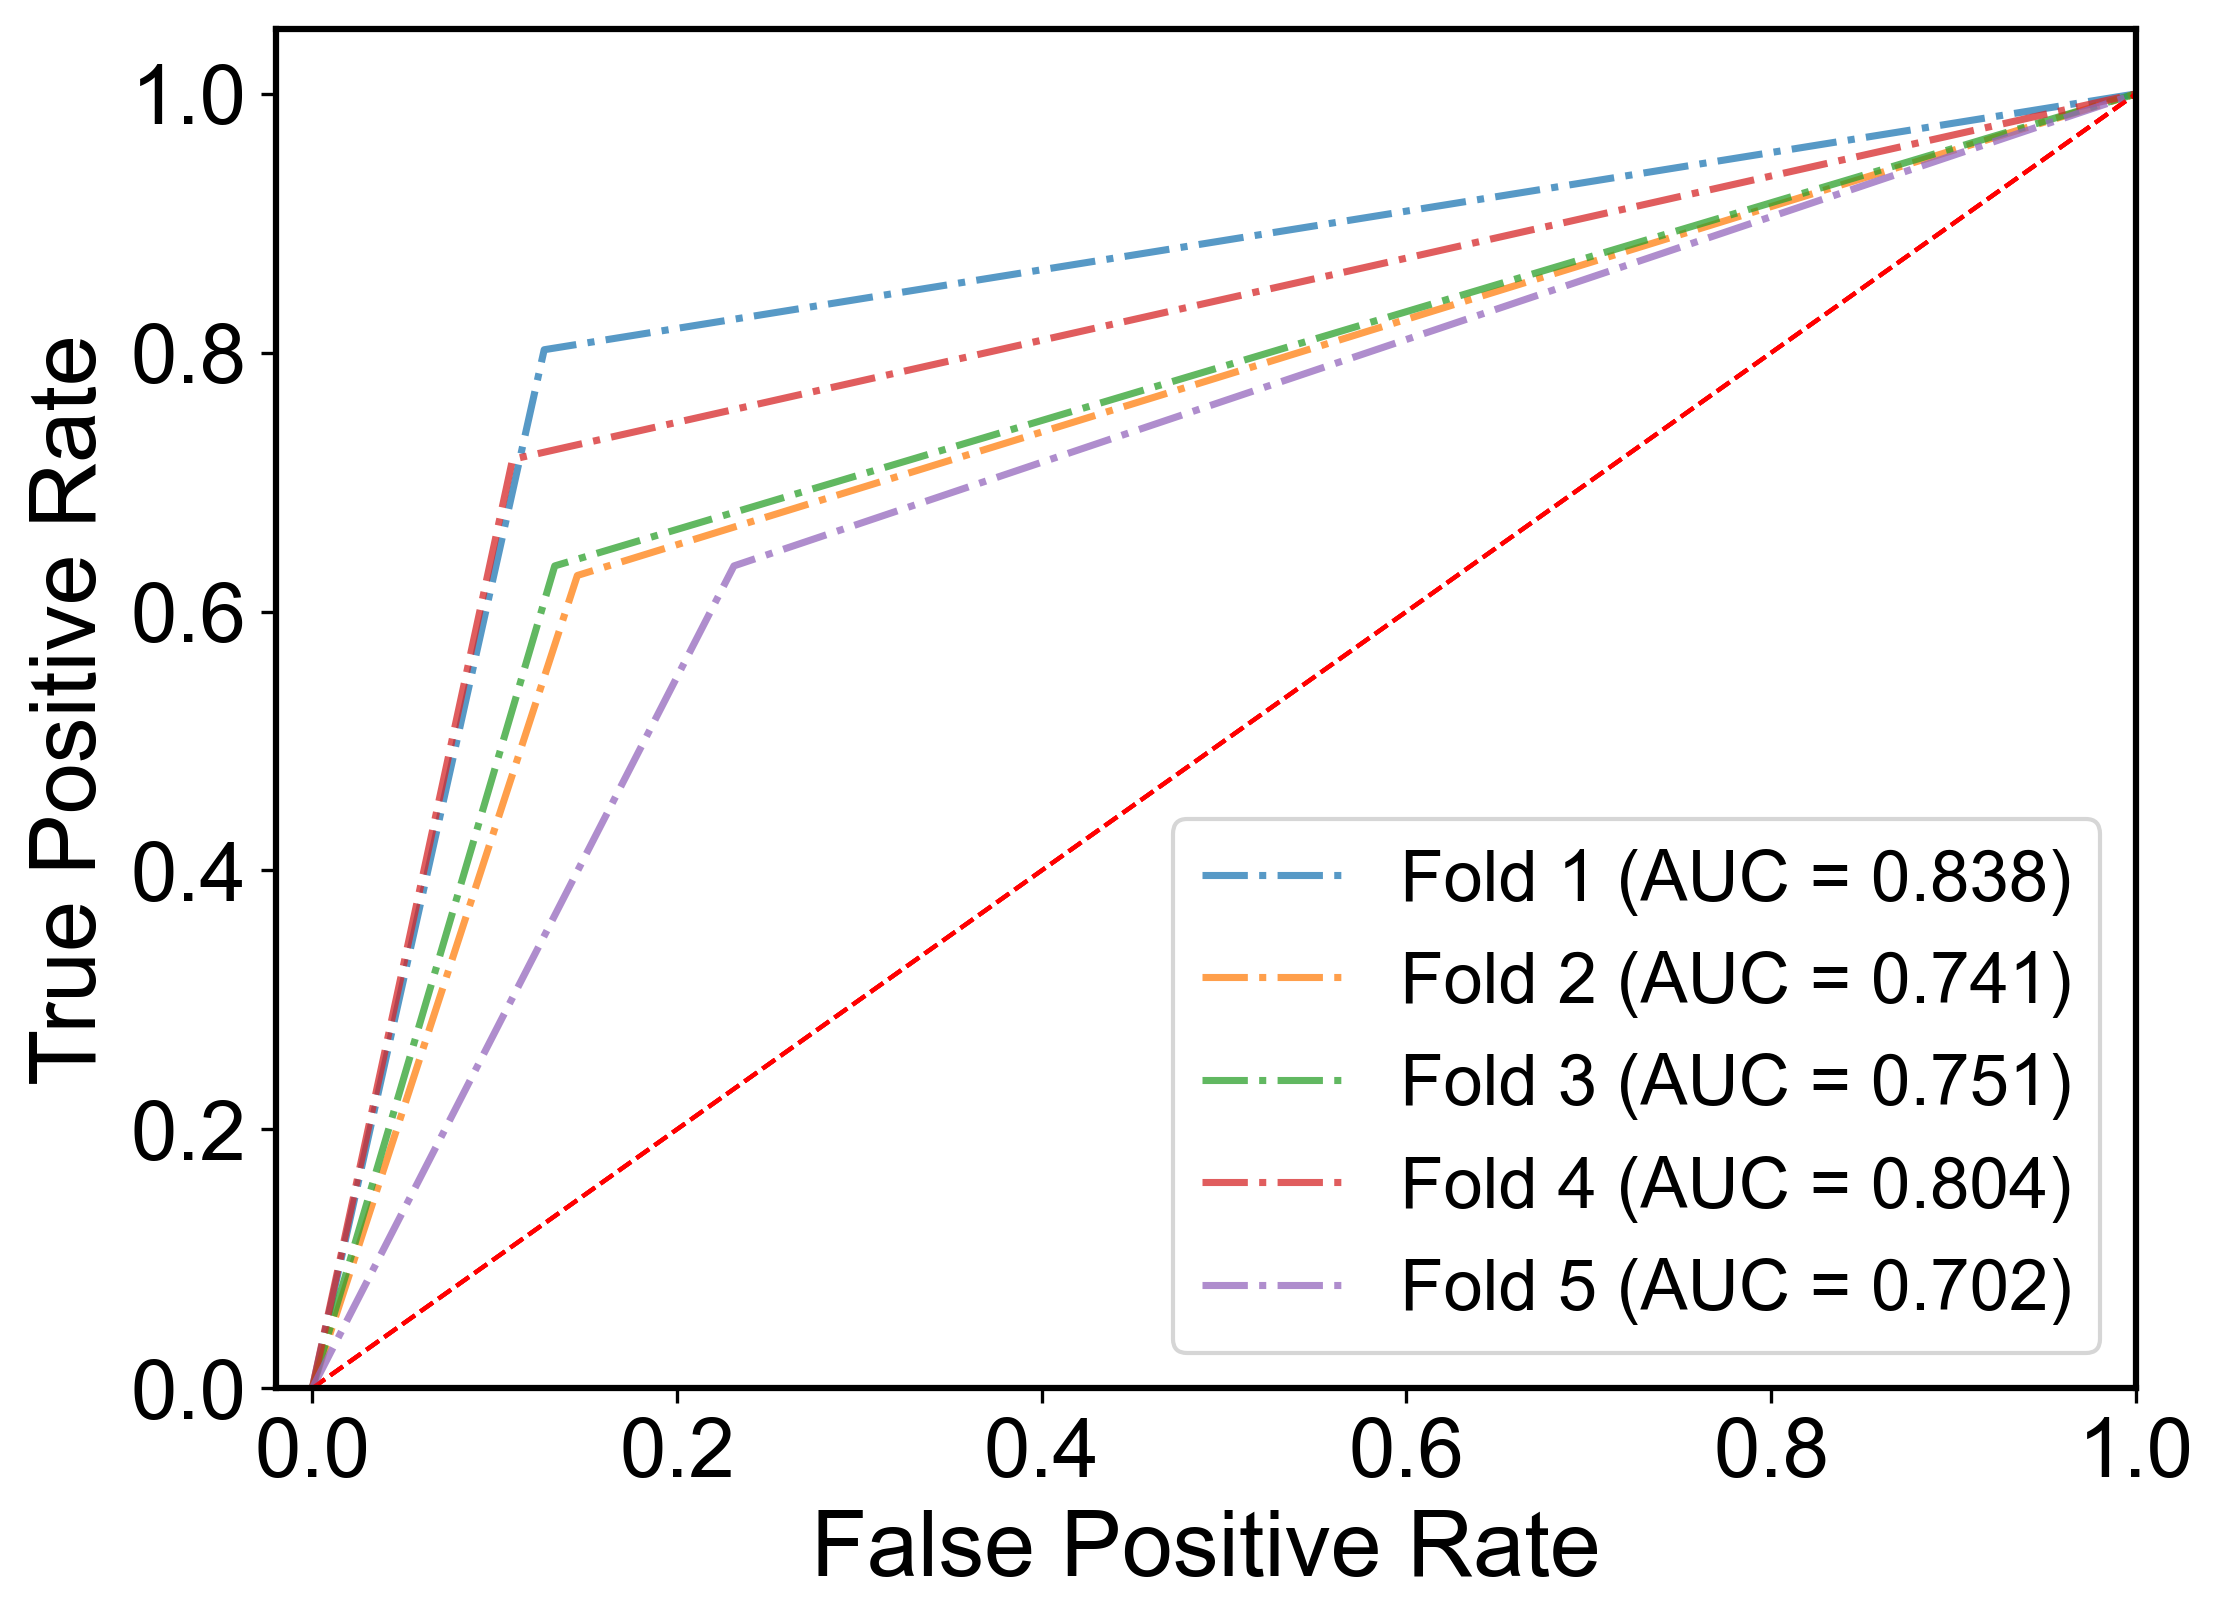

In [75]:
dt_result, dt_models = fold5_ensemble_smote(dt, X, y)
dt_result

Fold 1 Accuracy: 0.8803088803088803 F1_Score: 0.8187134502923977  ROC_AUC: 0.9432719451539185
Fold 2 Accuracy: 0.8527131782945736 F1_Score: 0.7738095238095238  ROC_AUC: 0.9375
Fold 3 Accuracy: 0.8488372093023255 F1_Score: 0.7636363636363637  ROC_AUC: 0.9245494729683781
Fold 4 Accuracy: 0.872093023255814 F1_Score: 0.8  ROC_AUC: 0.911764705882353
Fold 5 Accuracy: 0.8565891472868217 F1_Score: 0.7861271676300577  ROC_AUC: 0.916763005780347


{'accuracy': 0.8621082876896831,
 'f1-score': 0.7884573010736686,
 'mcc': 0.6866396133447379,
 'roc_auc': 0.9267698259569993,
 'recall': 0.7774829001367989}

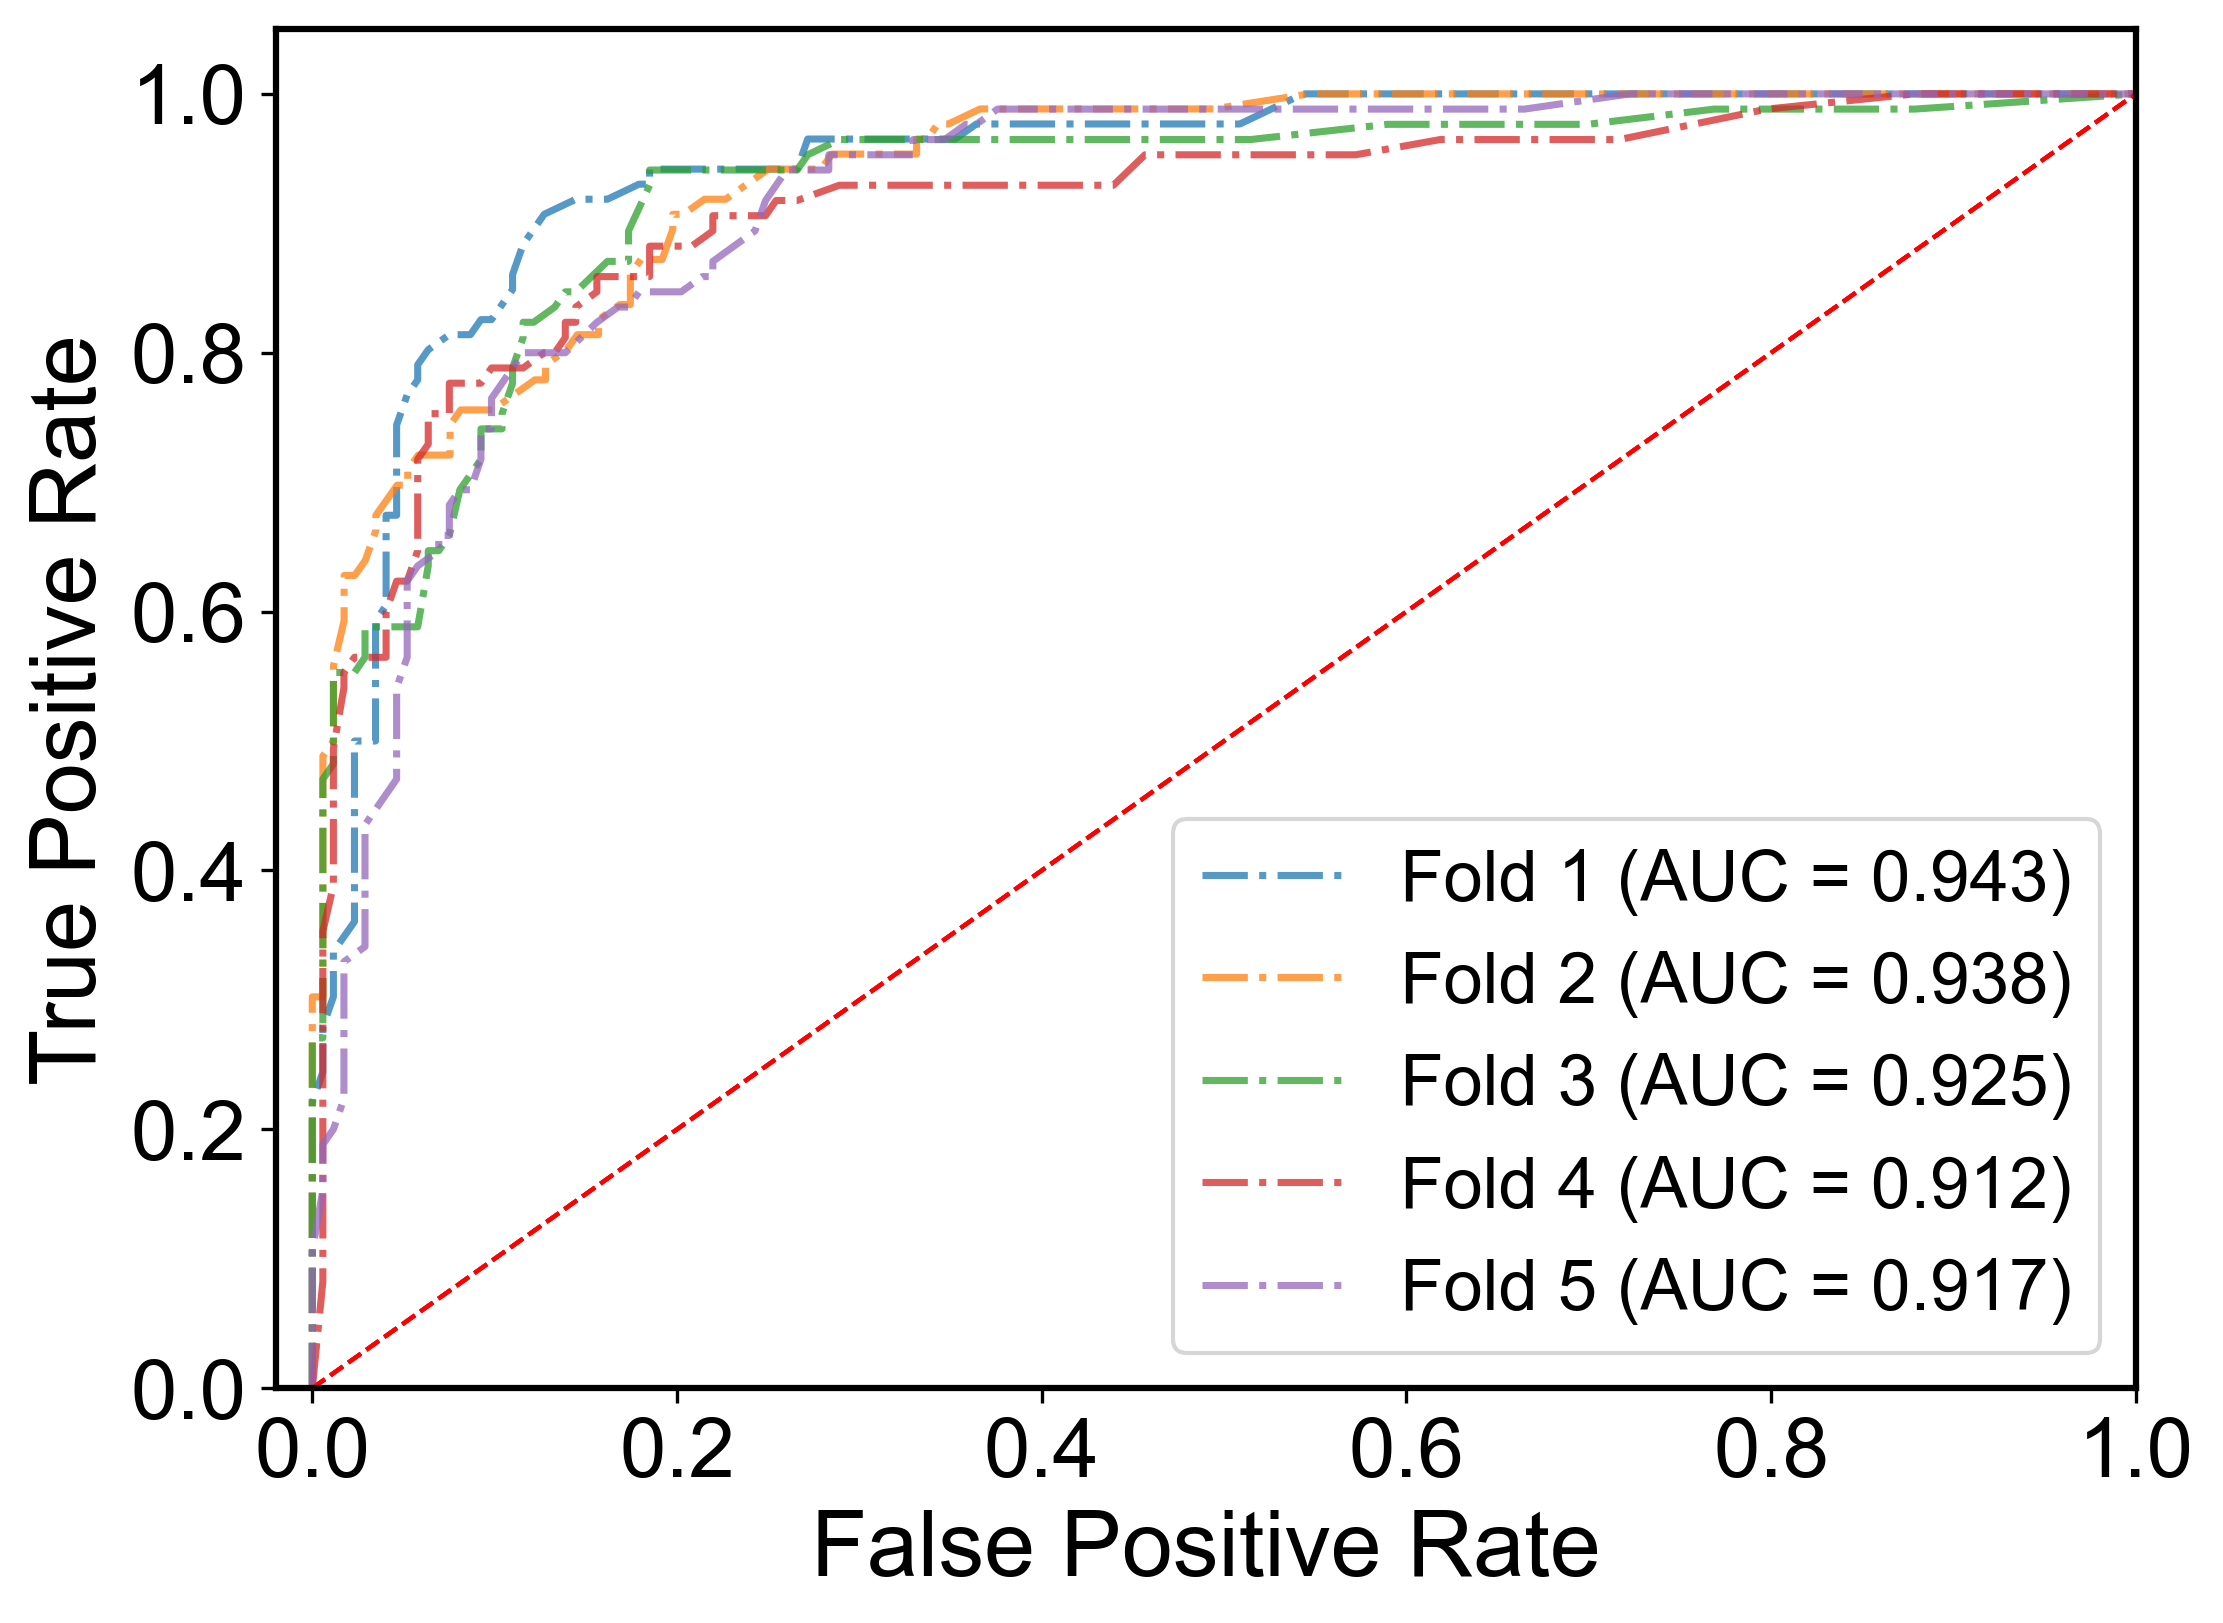

In [76]:
rf_result, rf_models = fold5_ensemble_smote(rf, X, y)
rf_result

Fold 1 Accuracy: 0.7992277992277992 F1_Score: 0.7450980392156863  ROC_AUC: 0.8680602231482726
Fold 2 Accuracy: 0.7674418604651163 F1_Score: 0.7  ROC_AUC: 0.8603975121687399
Fold 3 Accuracy: 0.7868217054263565 F1_Score: 0.717948717948718  ROC_AUC: 0.8571574294457668
Fold 4 Accuracy: 0.7790697674418605 F1_Score: 0.7076923076923078  ROC_AUC: 0.8405644338660319
Fold 5 Accuracy: 0.7325581395348837 F1_Score: 0.6532663316582914  ROC_AUC: 0.8017001020061203


{'accuracy': 0.7730238544192033,
 'f1-score': 0.7048010793030006,
 'mcc': 0.5401589769278304,
 'roc_auc': 0.8455759401269862,
 'recall': 0.8195348837209302}

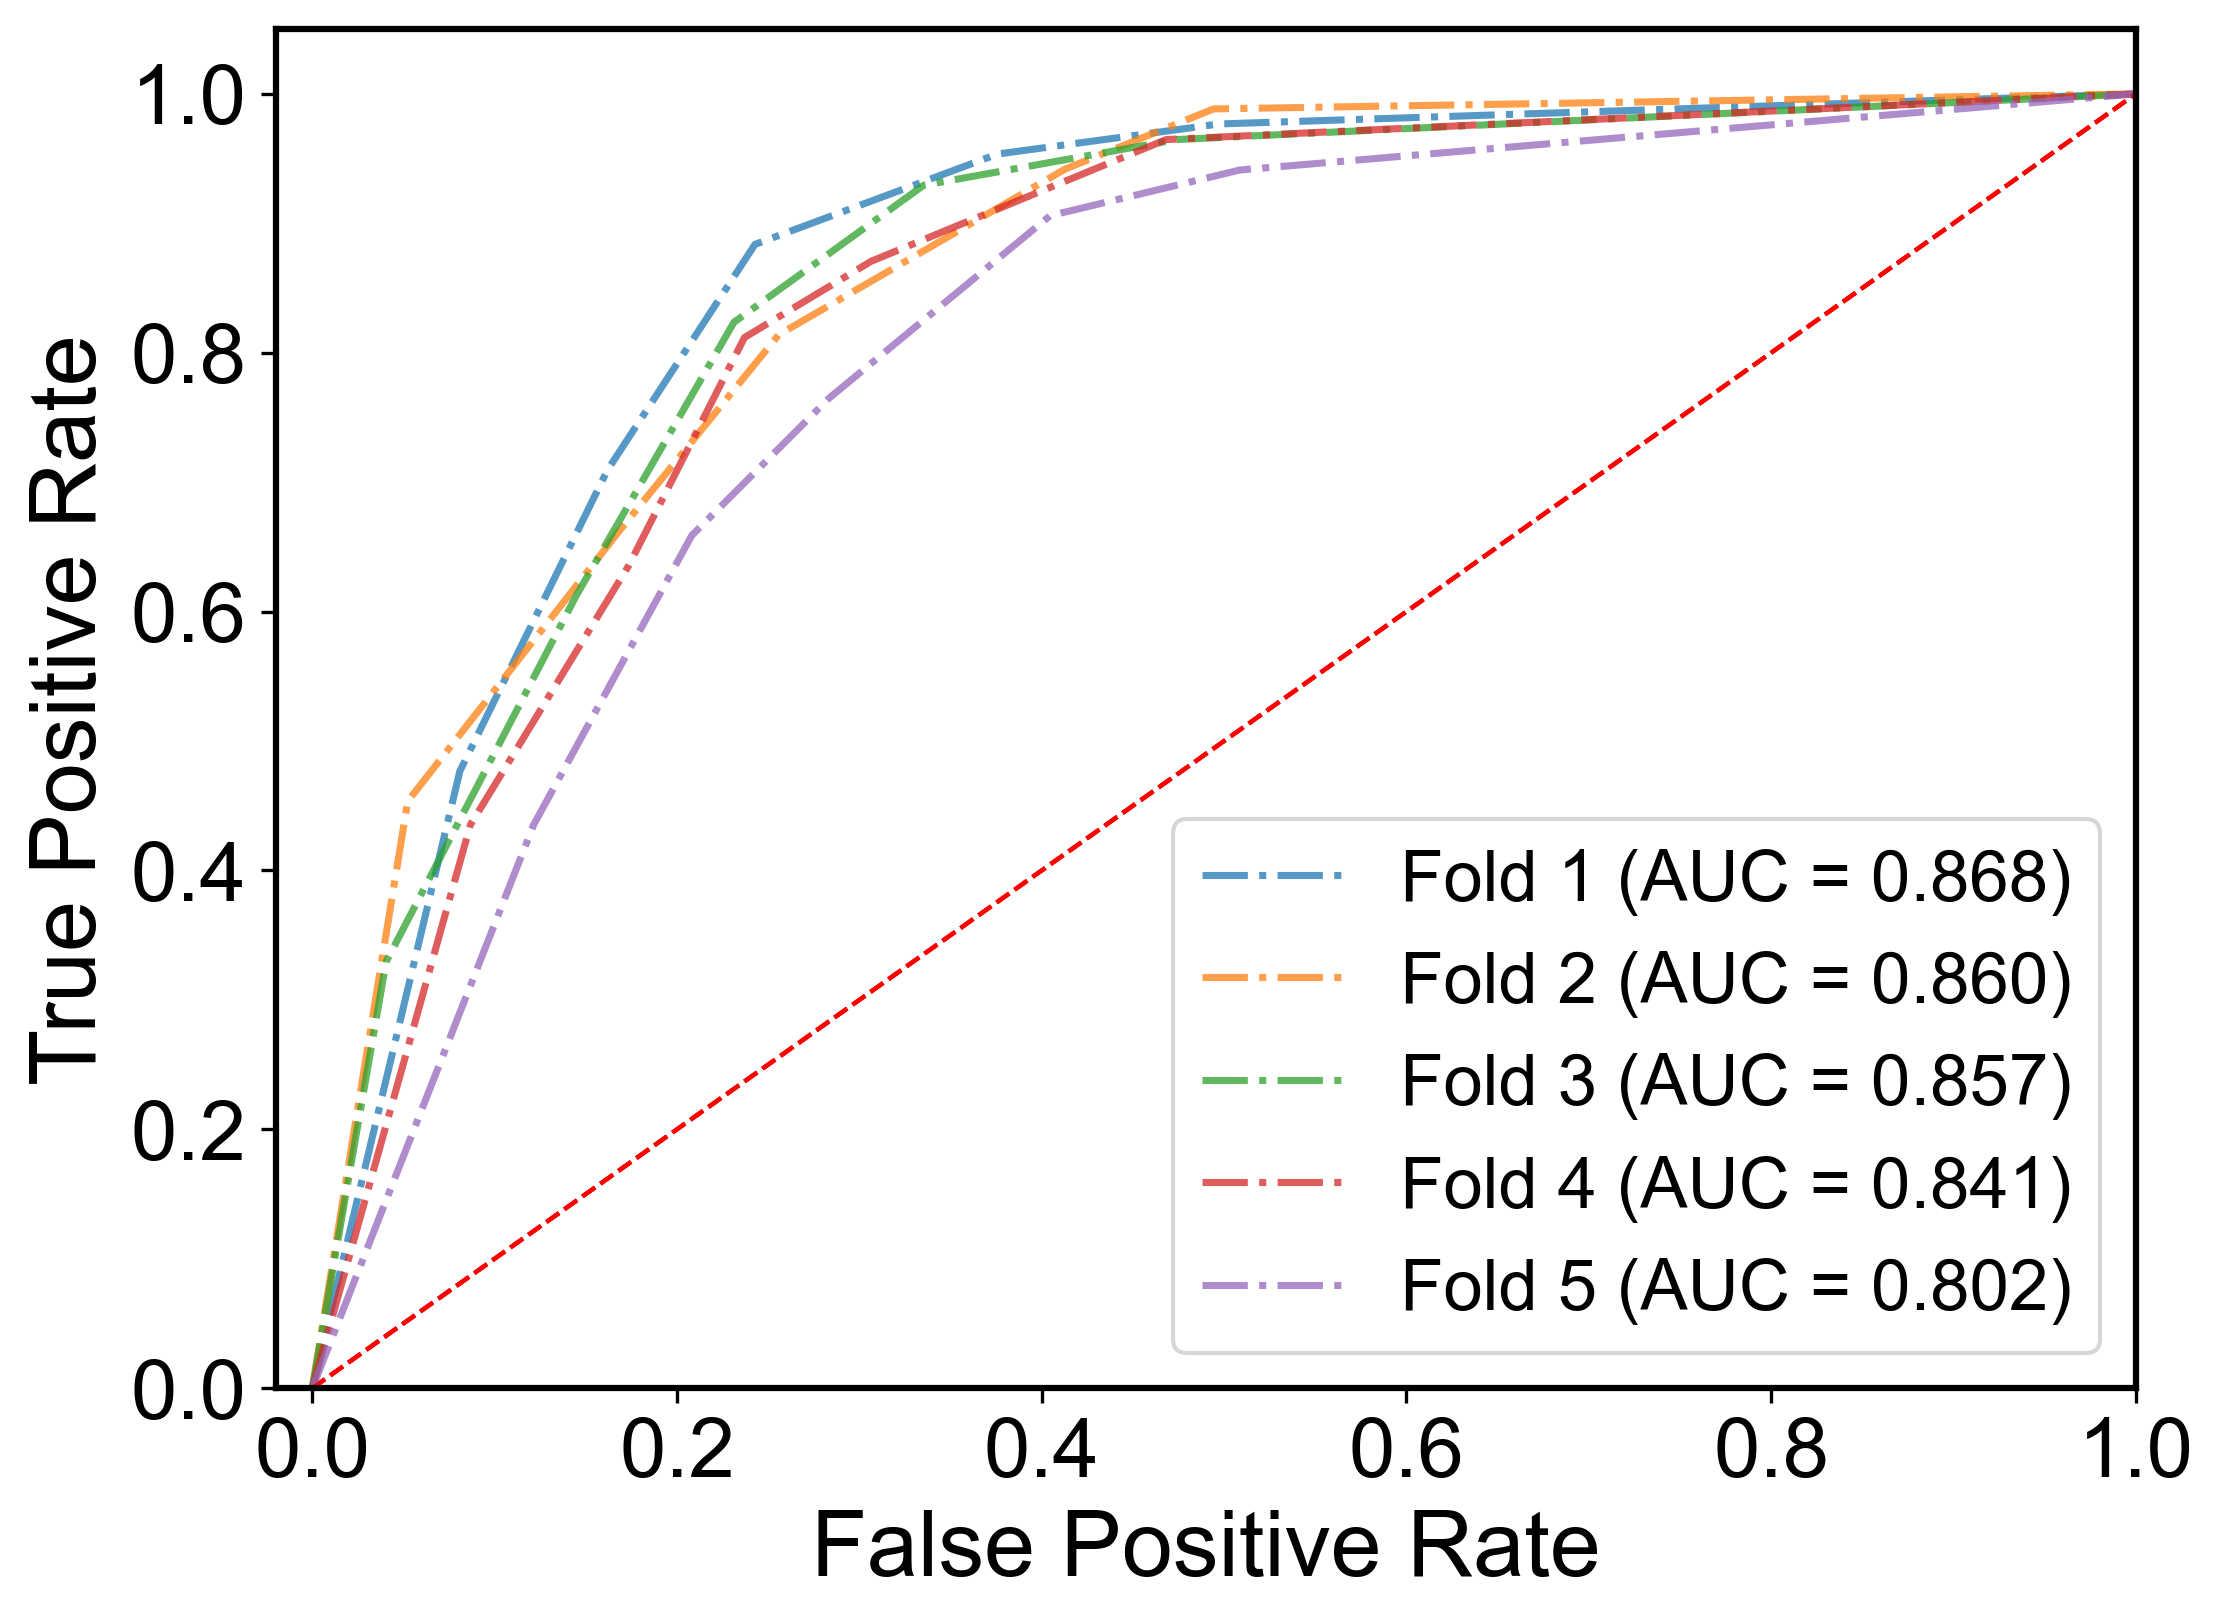

In [77]:
kn_result, kn_models = fold5_ensemble_smote(kn, X, y)
kn_result

Fold 1 Accuracy: 0.7258687258687259 F1_Score: 0.6952789699570815  ROC_AUC: 0.8826455168705472
Fold 2 Accuracy: 0.7596899224806202 F1_Score: 0.6836734693877551  ROC_AUC: 0.8701325040562466
Fold 3 Accuracy: 0.8023255813953488 F1_Score: 0.7182320441988951  ROC_AUC: 0.8757565453927236
Fold 4 Accuracy: 0.7015503875968992 F1_Score: 0.6637554585152838  ROC_AUC: 0.848826929615777
Fold 5 Accuracy: 0.7635658914728682 F1_Score: 0.6163522012578617  ROC_AUC: 0.8041482488949337


{'accuracy': 0.7506001017628925,
 'f1-score': 0.6754584286633755,
 'mcc': 0.505894269681898,
 'roc_auc': 0.8563019489660457,
 'recall': 0.7912448700410396}

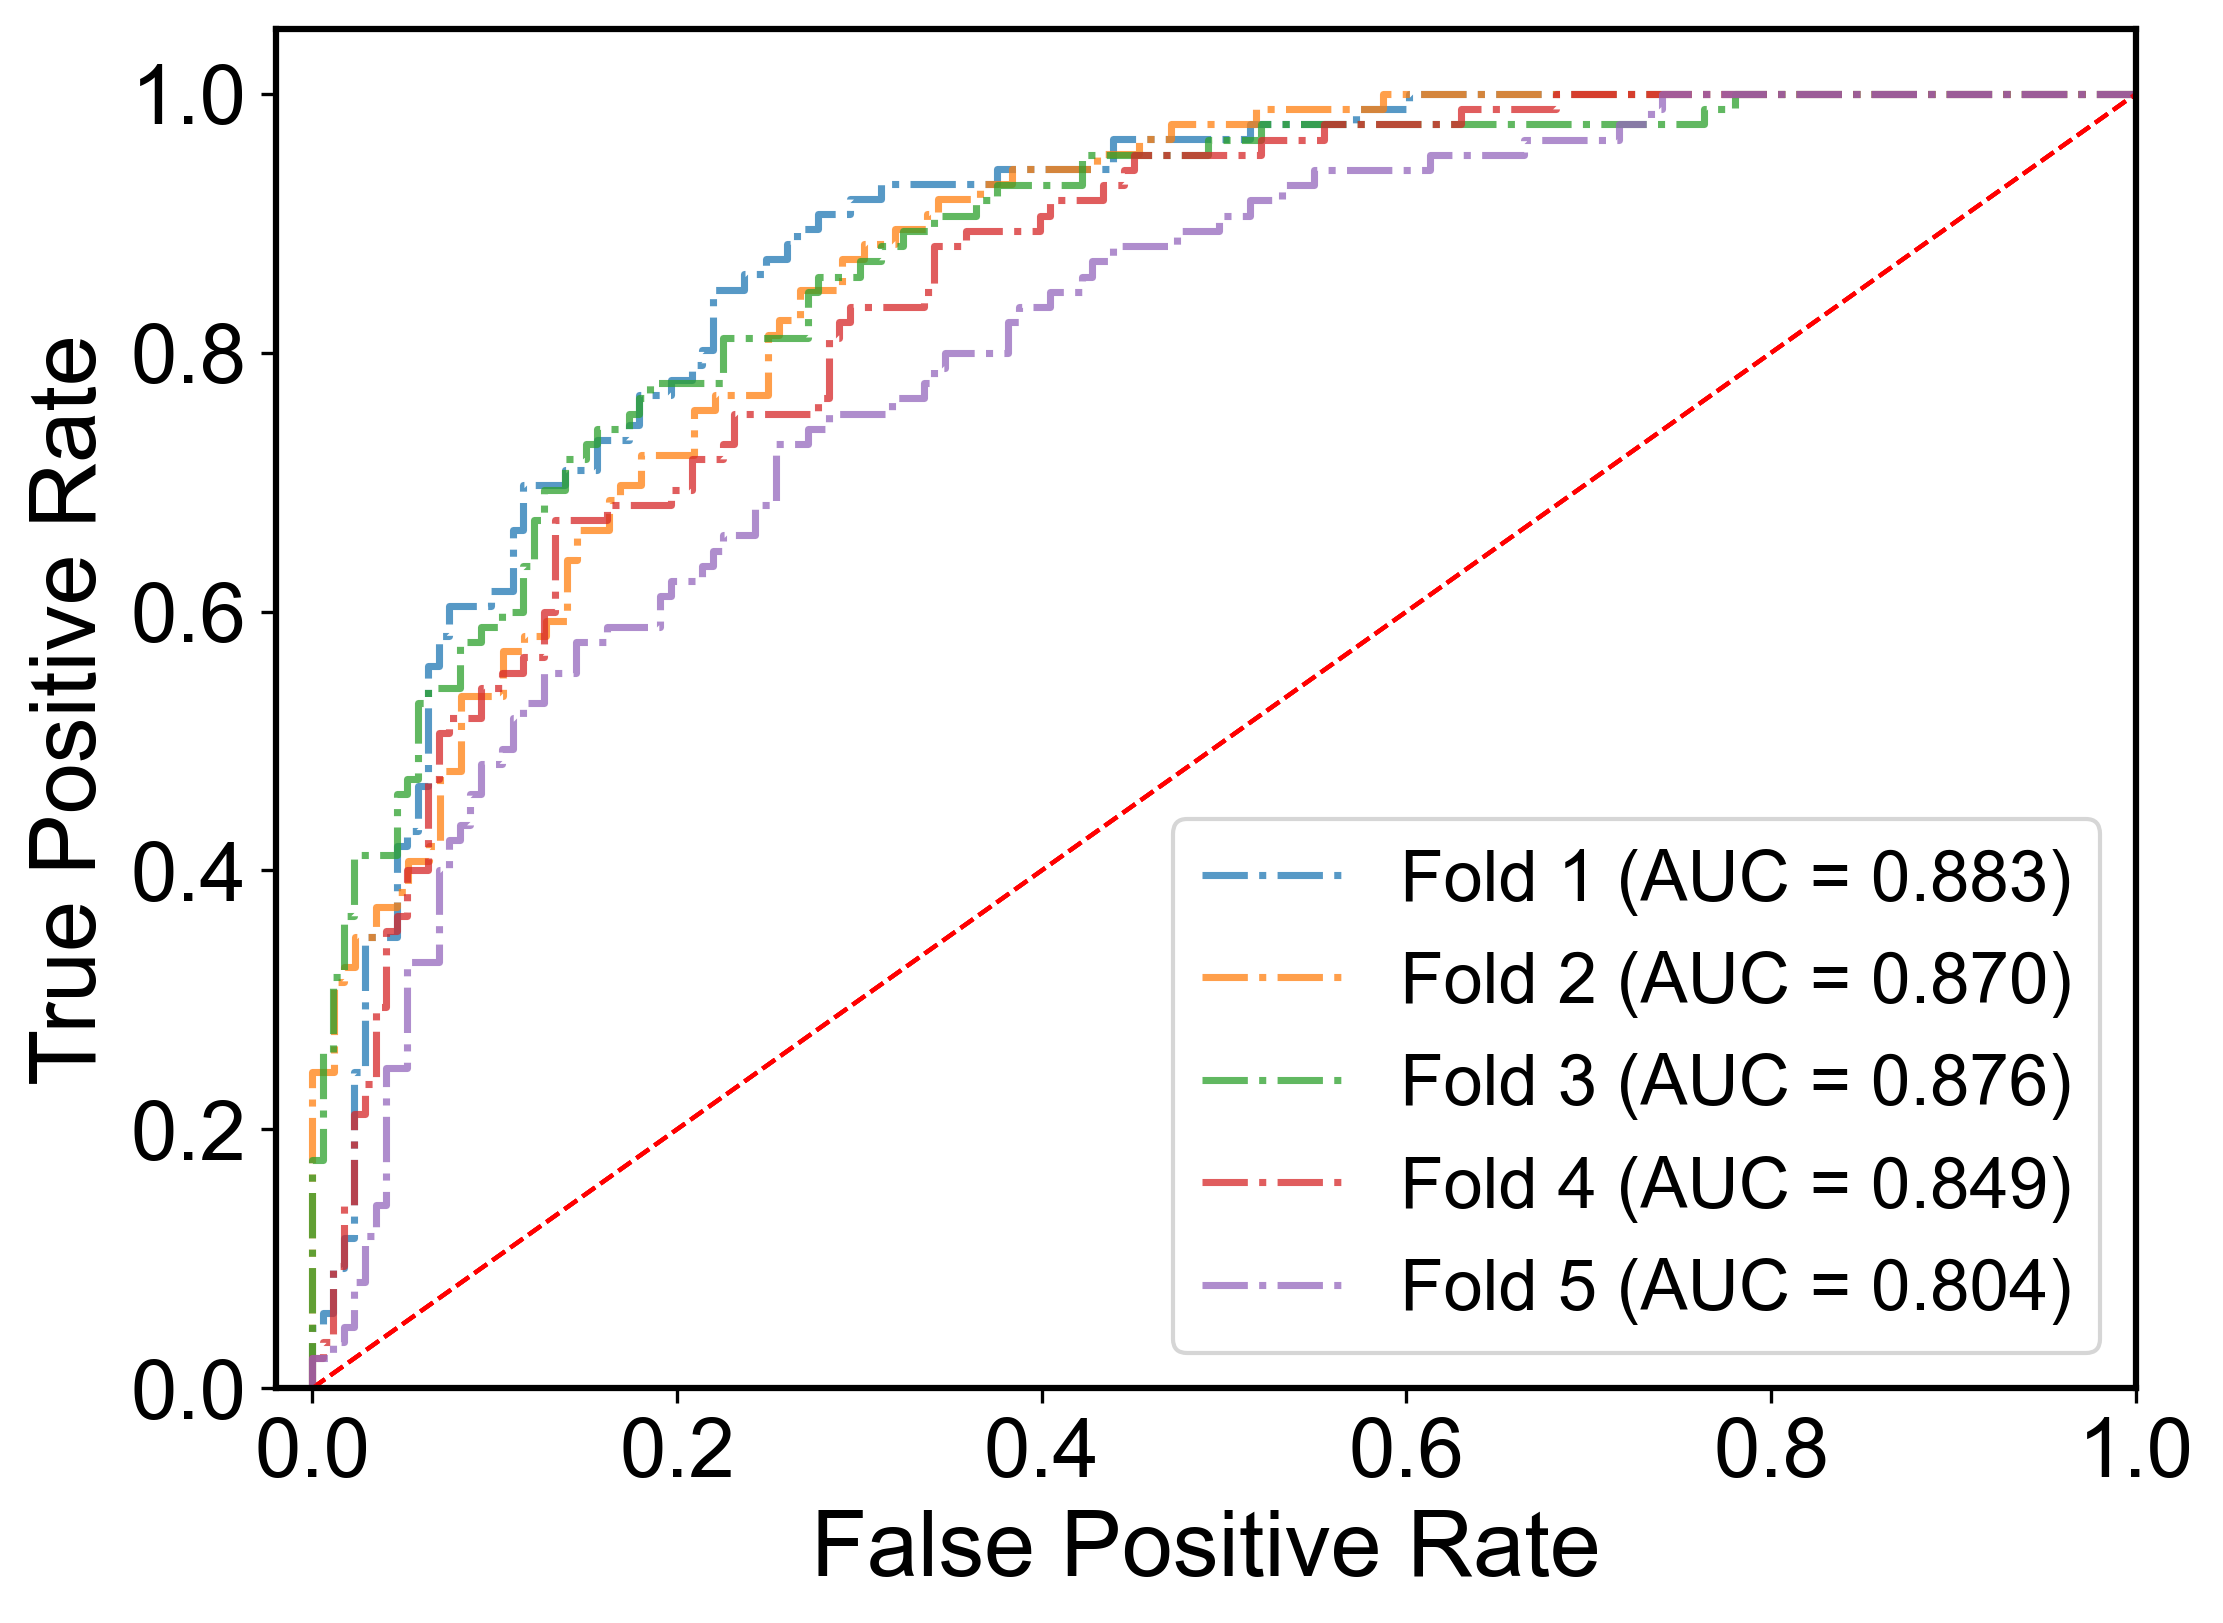

In [78]:
mlp_result, mlp_models = fold5_ensemble_smote(mlp, X, y)
mlp_result

Fold 1 Accuracy: 0.8841698841698842 F1_Score: 0.8214285714285714  ROC_AUC: 0.940785051754268
Fold 2 Accuracy: 0.8604651162790697 F1_Score: 0.783132530120482  ROC_AUC: 0.9211060032449974
Fold 3 Accuracy: 0.8333333333333334 F1_Score: 0.7425149700598803  ROC_AUC: 0.9104046242774567
Fold 4 Accuracy: 0.8682170542635659 F1_Score: 0.7926829268292683  ROC_AUC: 0.9098945936756204
Fold 5 Accuracy: 0.8333333333333334 F1_Score: 0.7542857142857142  ROC_AUC: 0.9168650119007141


{'accuracy': 0.8559037442758373,
 'f1-score': 0.7788089425447833,
 'mcc': 0.6726959168972693,
 'roc_auc': 0.9198110569706113,
 'recall': 0.7657455540355678}

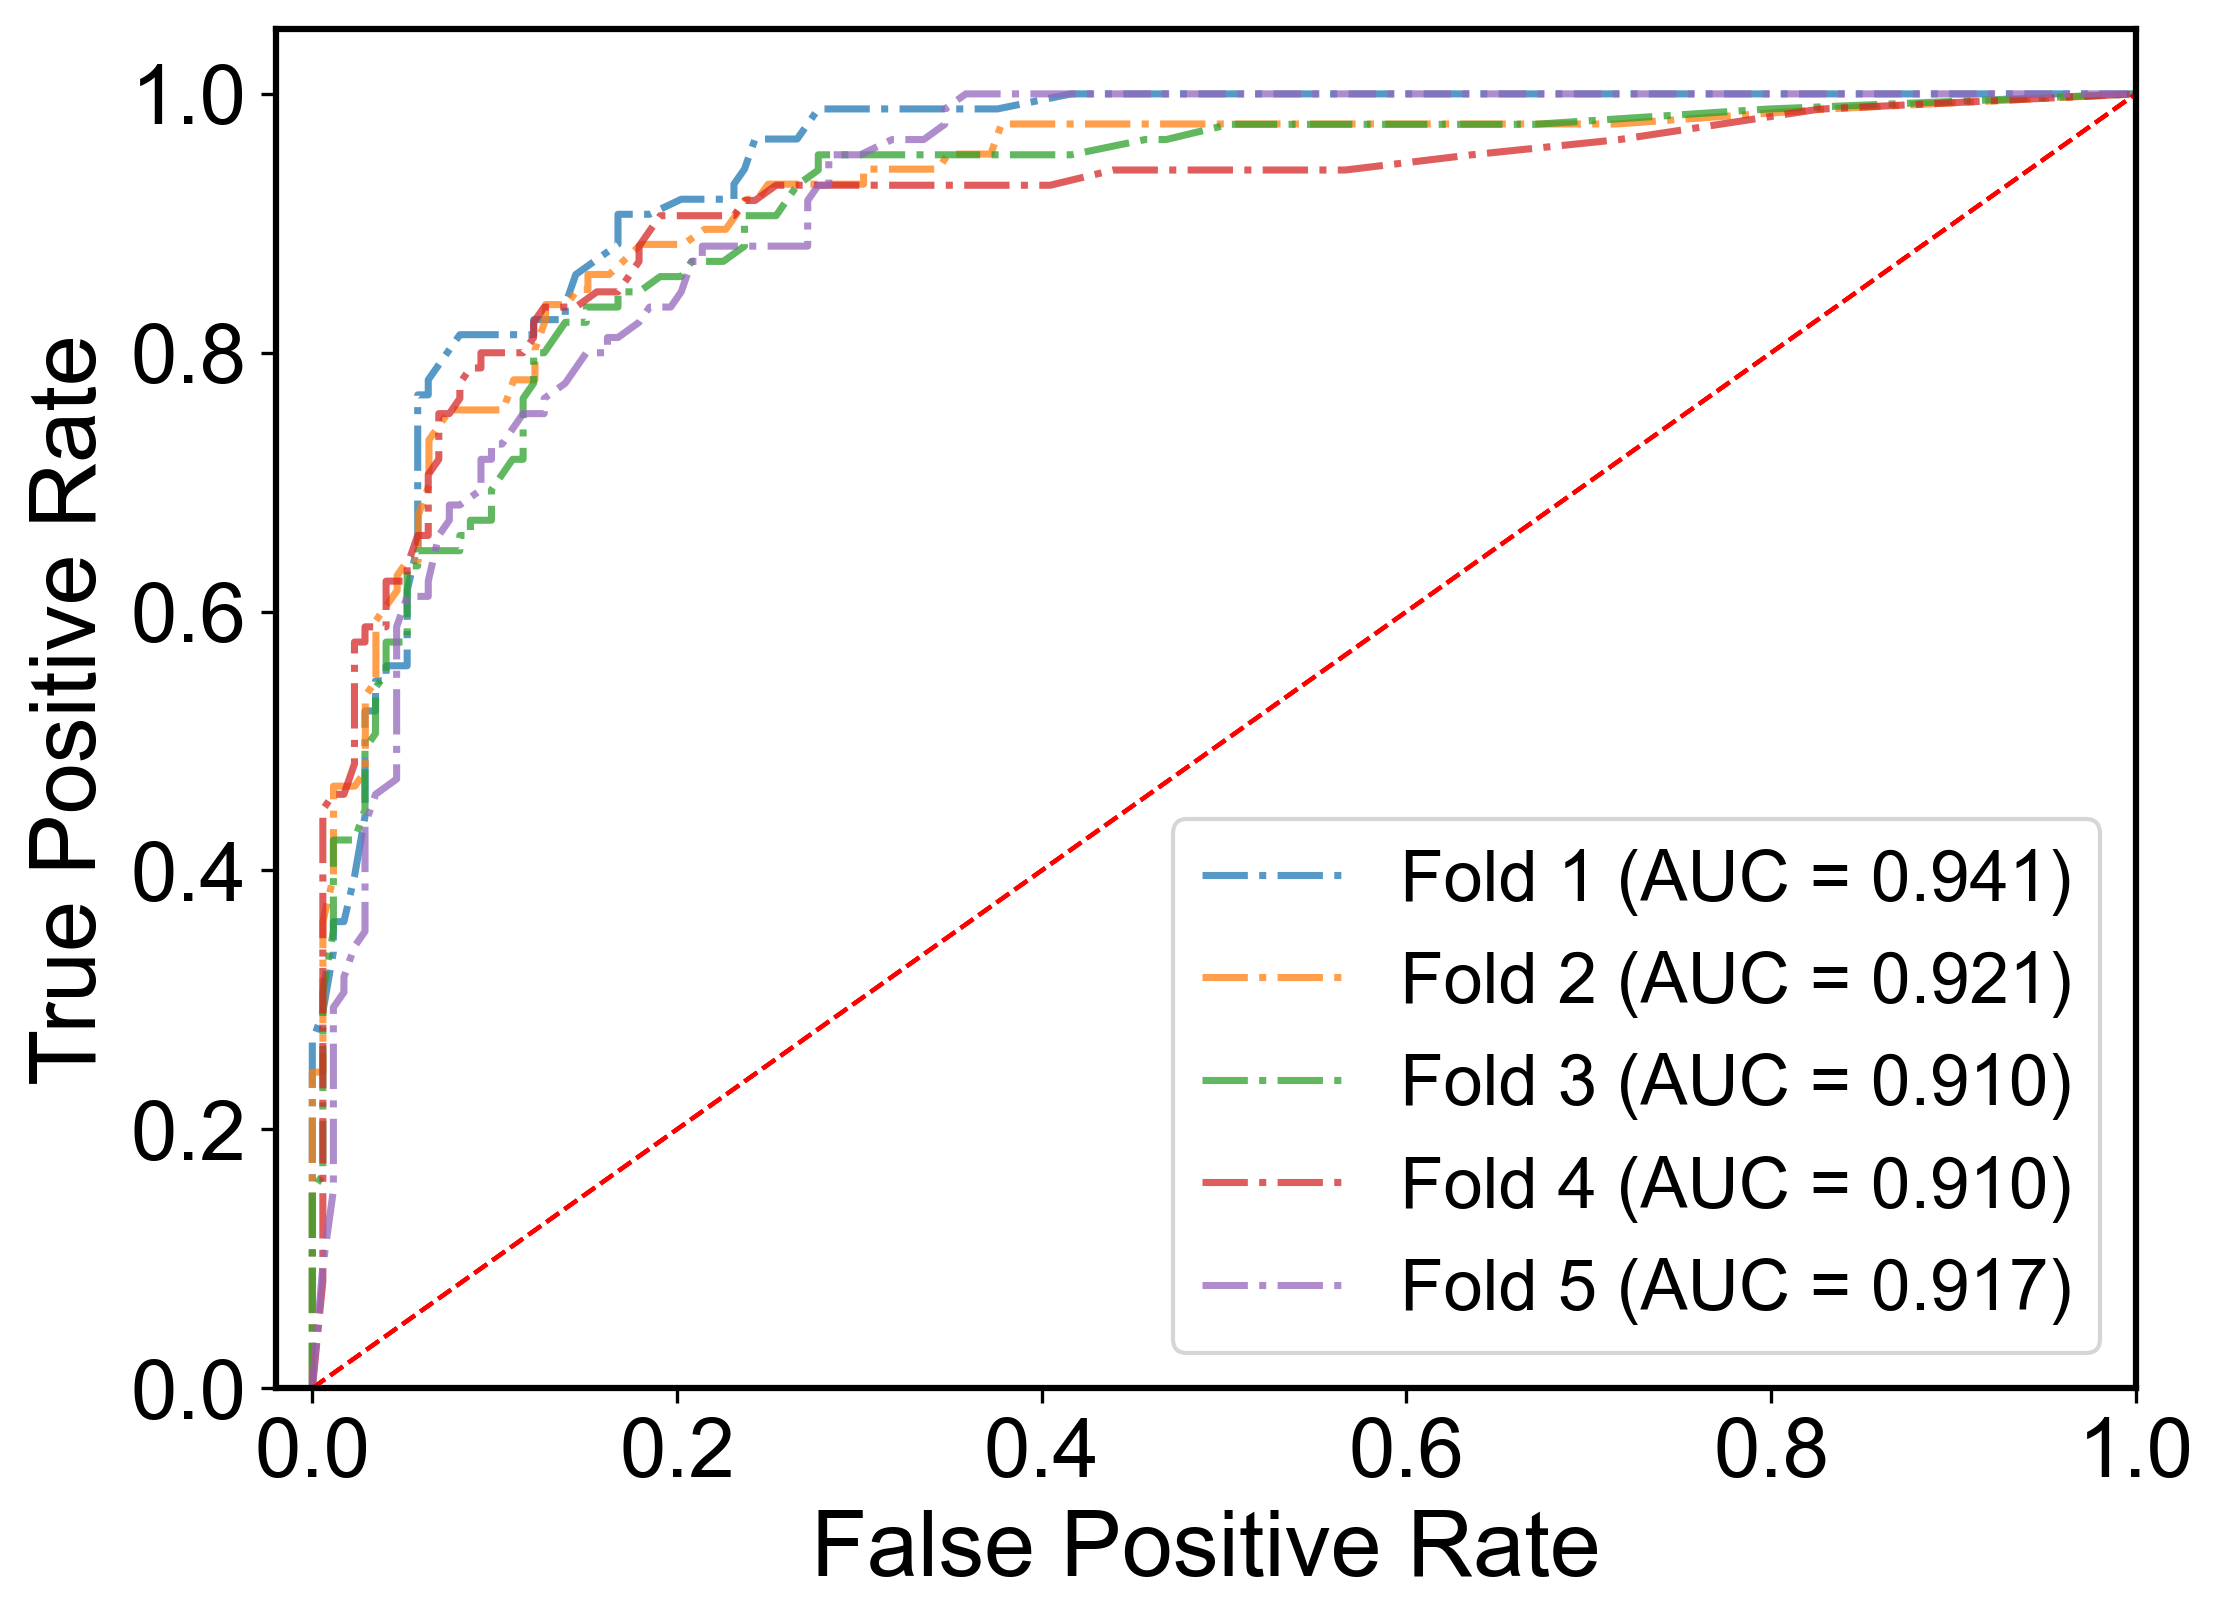

In [79]:
ext_result, ext_models = fold5_ensemble_smote(ext, X, y)
ext_result

Fold 1 Accuracy: 0.8841698841698842 F1_Score: 0.8255813953488372  ROC_AUC: 0.947708025272214
Fold 2 Accuracy: 0.8604651162790697 F1_Score: 0.7954545454545455  ROC_AUC: 0.9401027582477015
Fold 3 Accuracy: 0.8449612403100775 F1_Score: 0.761904761904762  ROC_AUC: 0.9302278136688201
Fold 4 Accuracy: 0.8837209302325582 F1_Score: 0.8170731707317074  ROC_AUC: 0.9326079564773886
Fold 5 Accuracy: 0.8643410852713178 F1_Score: 0.7904191616766466  ROC_AUC: 0.9207752465147908


{'accuracy': 0.8675316512525815,
 'f1-score': 0.7980866070232998,
 'mcc': 0.699903923534636,
 'roc_auc': 0.934284360036183,
 'recall': 0.791436388508892}

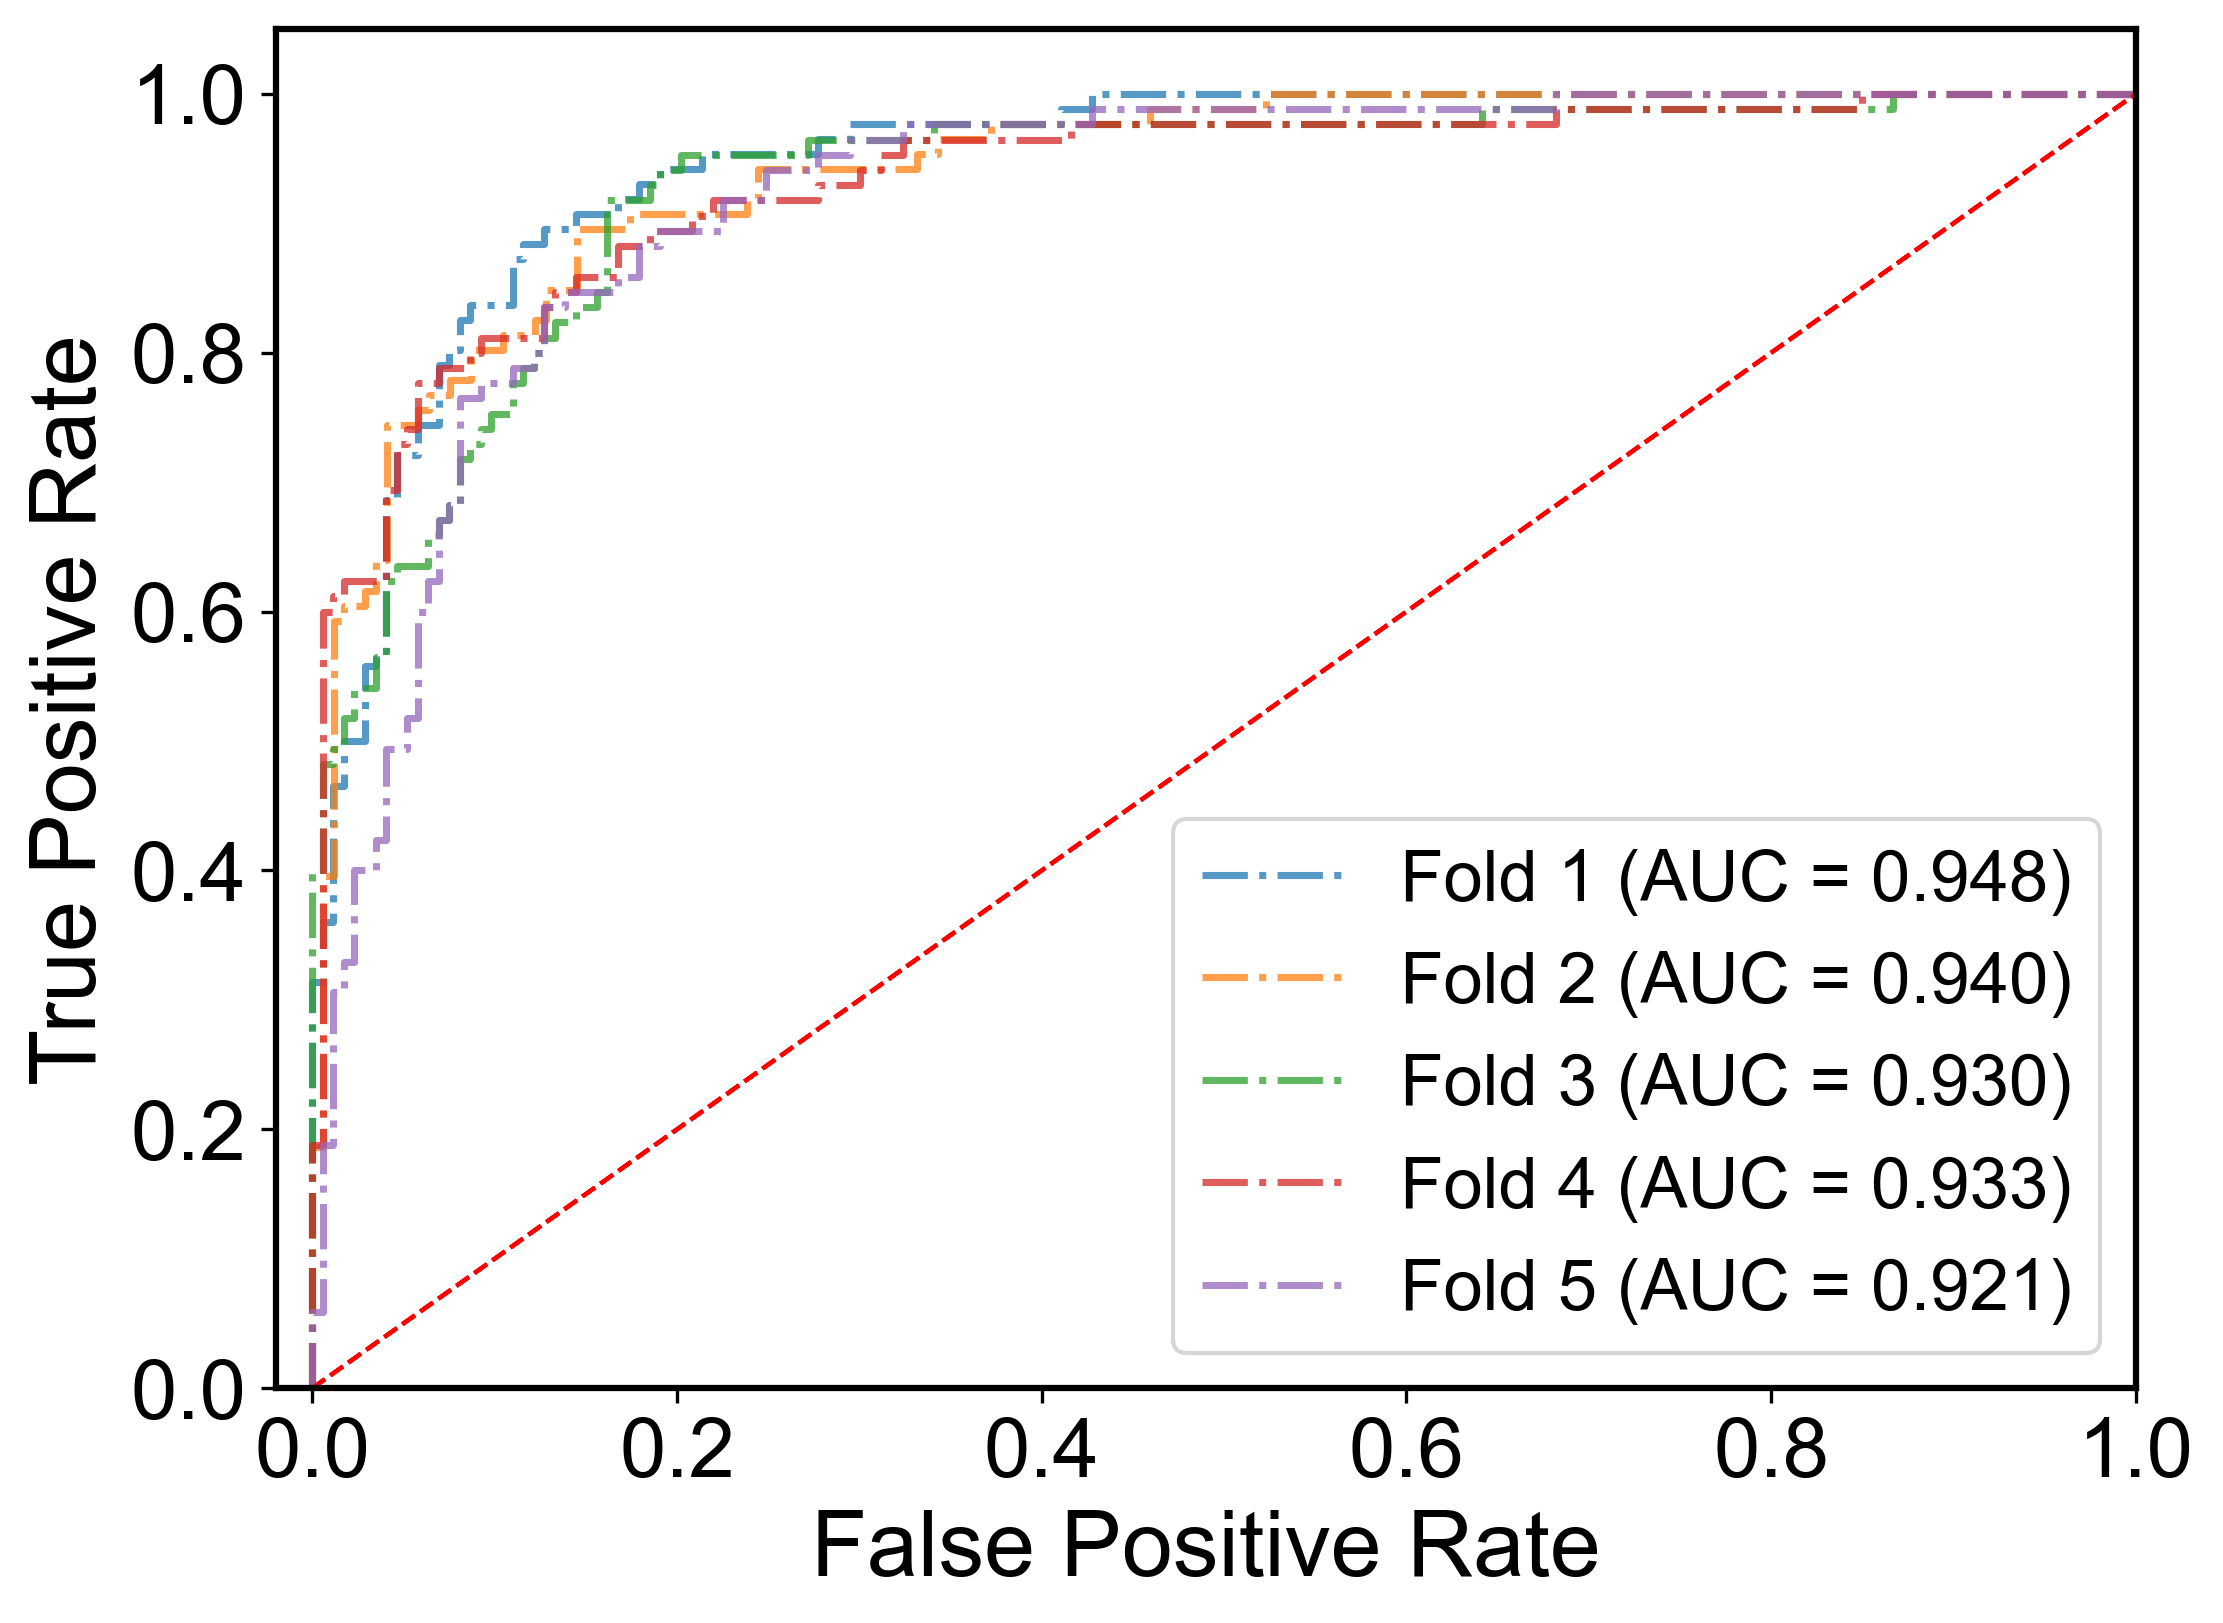

In [80]:
lgbm_result, lgbm_models = fold5_ensemble_smote(lgbm, X, y)
lgbm_result

Fold 1 Accuracy: 0.8803088803088803 F1_Score: 0.8143712574850299  ROC_AUC: 0.9460276918940718
Fold 2 Accuracy: 0.8527131782945736 F1_Score: 0.7738095238095238  ROC_AUC: 0.9332071389940508
Fold 3 Accuracy: 0.872093023255814 F1_Score: 0.8023952095808382  ROC_AUC: 0.9429445766746005
Fold 4 Accuracy: 0.8837209302325582 F1_Score: 0.8192771084337349  ROC_AUC: 0.9344440666439987
Fold 5 Accuracy: 0.8372093023255814 F1_Score: 0.7469879518072289  ROC_AUC: 0.9109146548792928


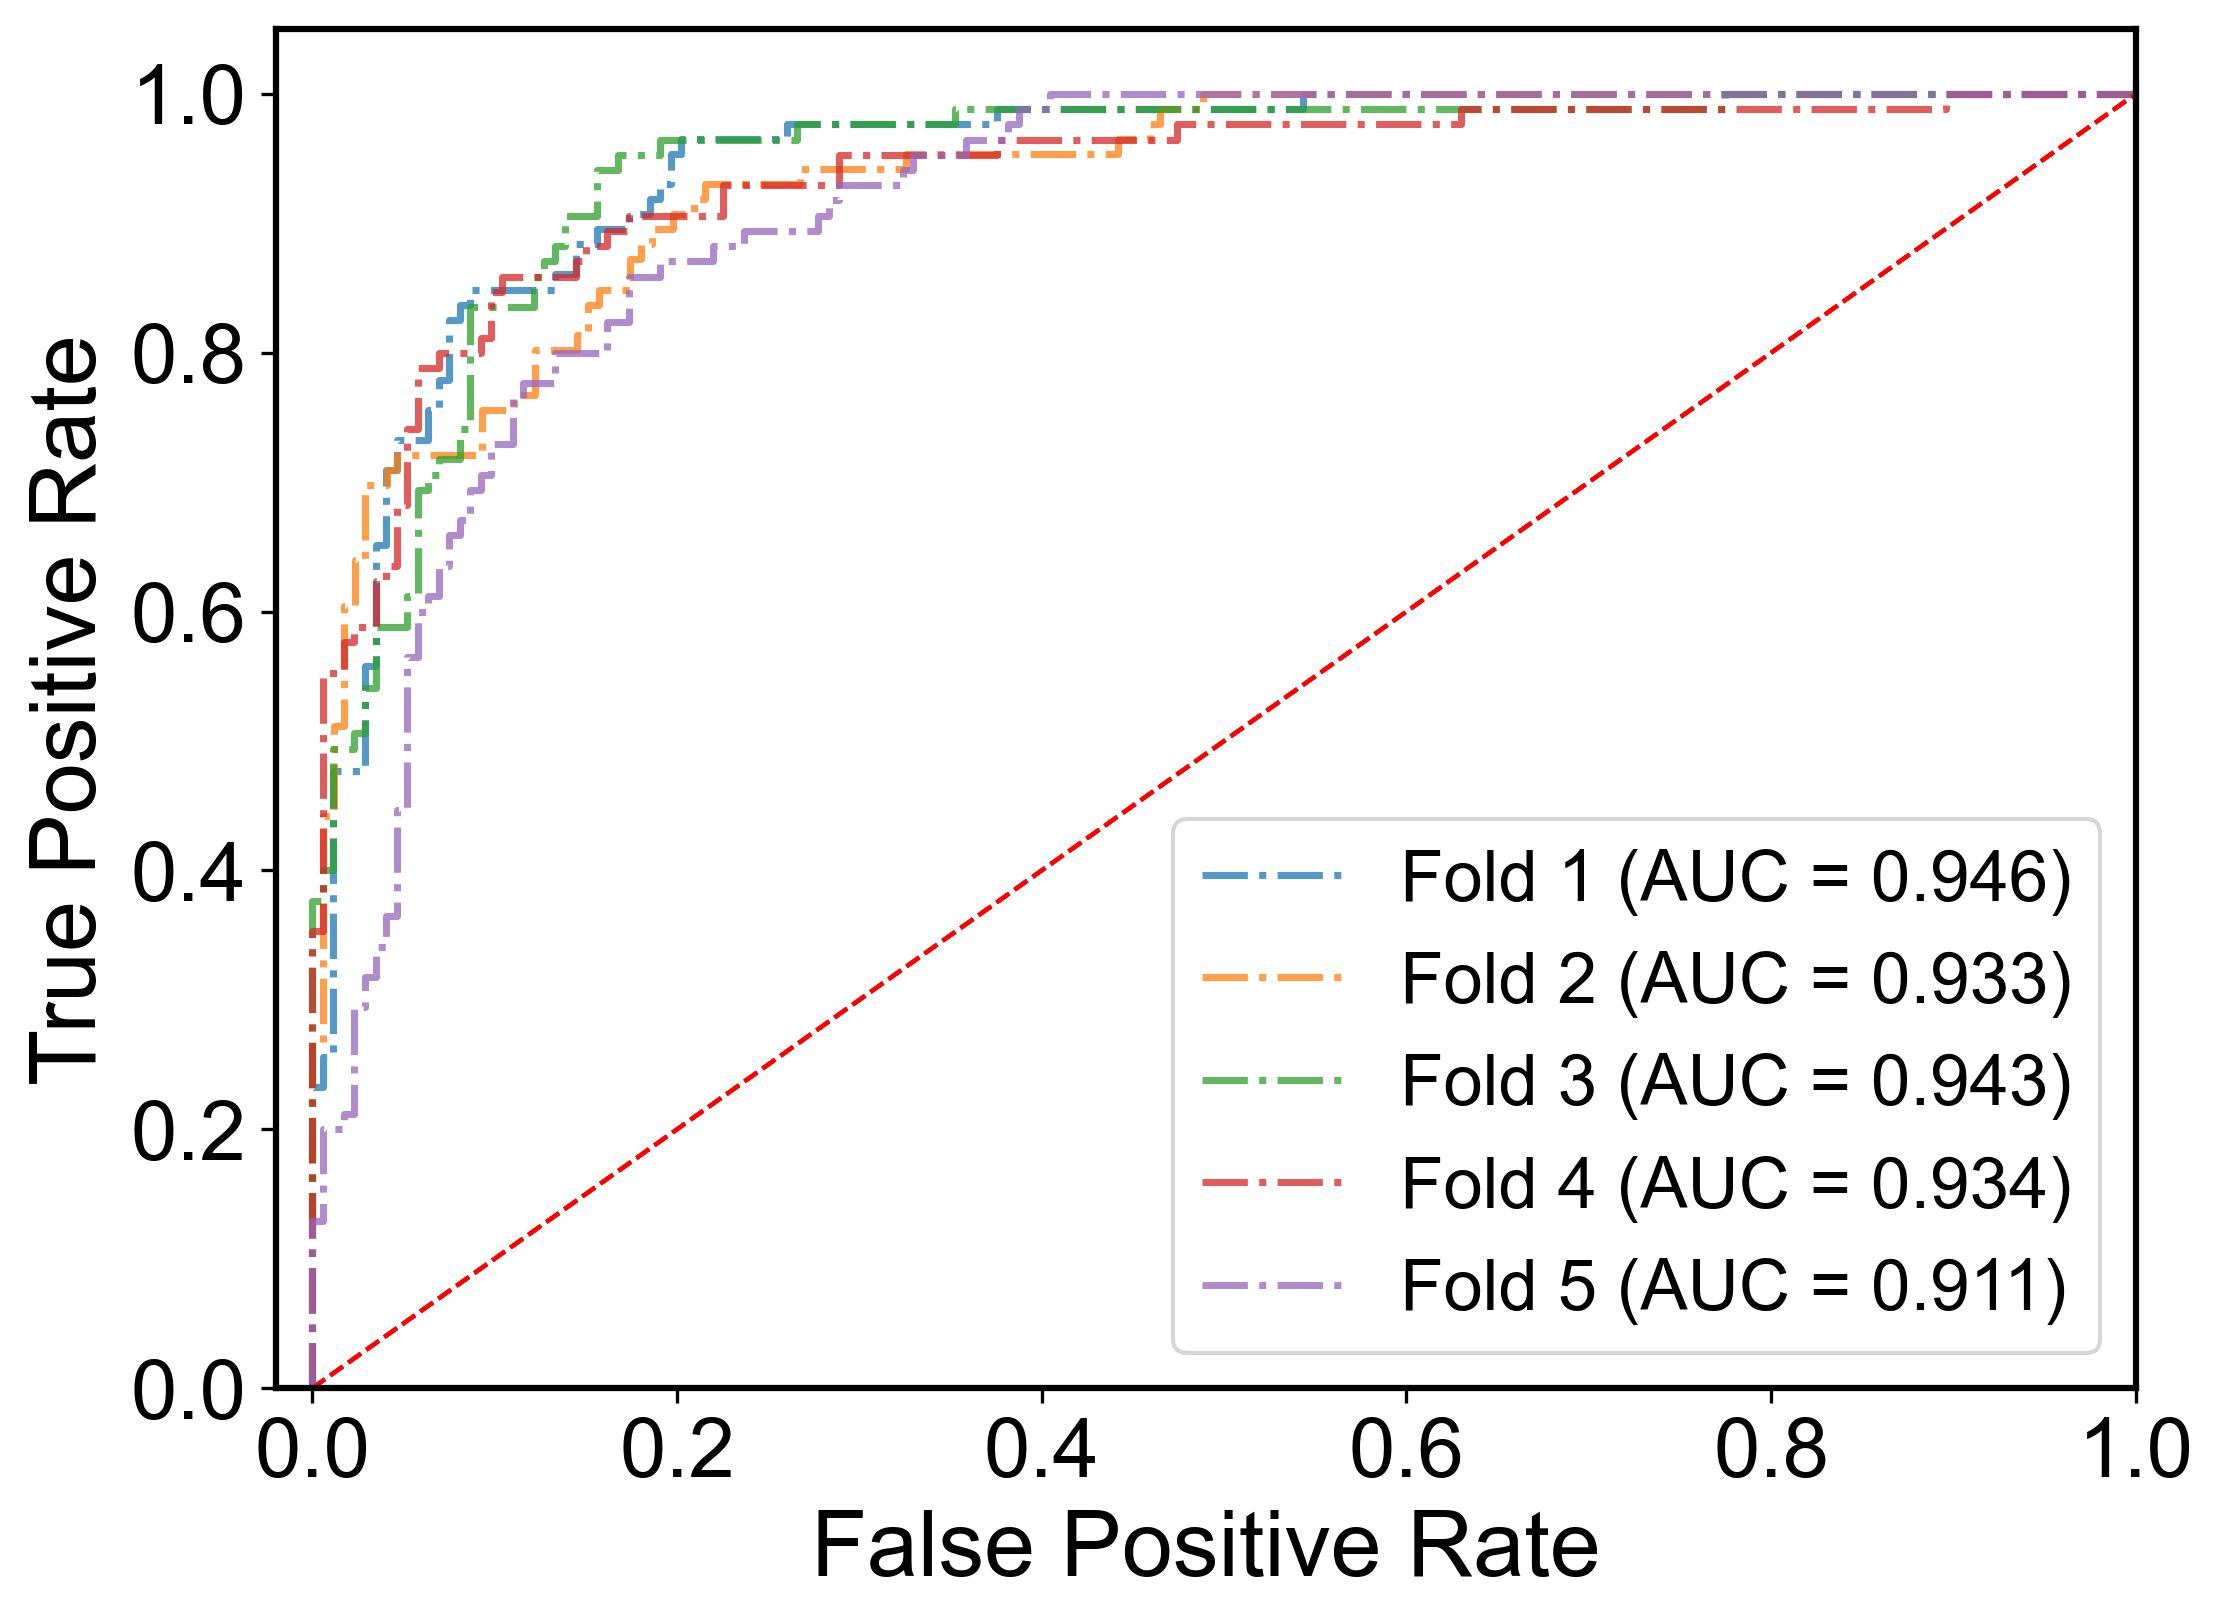

{'accuracy': 0.8652090628834814,
 'f1-score': 0.7913682102232712,
 'mcc': 0.6923437004706993,
 'roc_auc': 0.933507625817203,
 'recall': 0.7728317373461012}

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
#nosmote
xgb2_result, xgb2_models = fold5_ensemble(xb, X_xgb, y)
xgb2_result

Fold 1 Accuracy: 0.8996138996138996 F1_Score: 0.8470588235294119  ROC_AUC: 0.9523457453958866
Fold 2 Accuracy: 0.8914728682170543 F1_Score: 0.8333333333333333  ROC_AUC: 0.9342212006489994
Fold 3 Accuracy: 0.875968992248062 F1_Score: 0.8117647058823529  ROC_AUC: 0.9377082624957498
Fold 4 Accuracy: 0.8953488372093024 F1_Score: 0.8383233532934131  ROC_AUC: 0.9369602176130568
Fold 5 Accuracy: 0.872093023255814 F1_Score: 0.8092485549132947  ROC_AUC: 0.9177830669840191


{'accuracy': 0.8868995241088264,
 'f1-score': 0.8279457541903612,
 'mcc': 0.7439518872499773,
 'roc_auc': 0.9358036986275422,
 'recall': 0.8219972640218878}

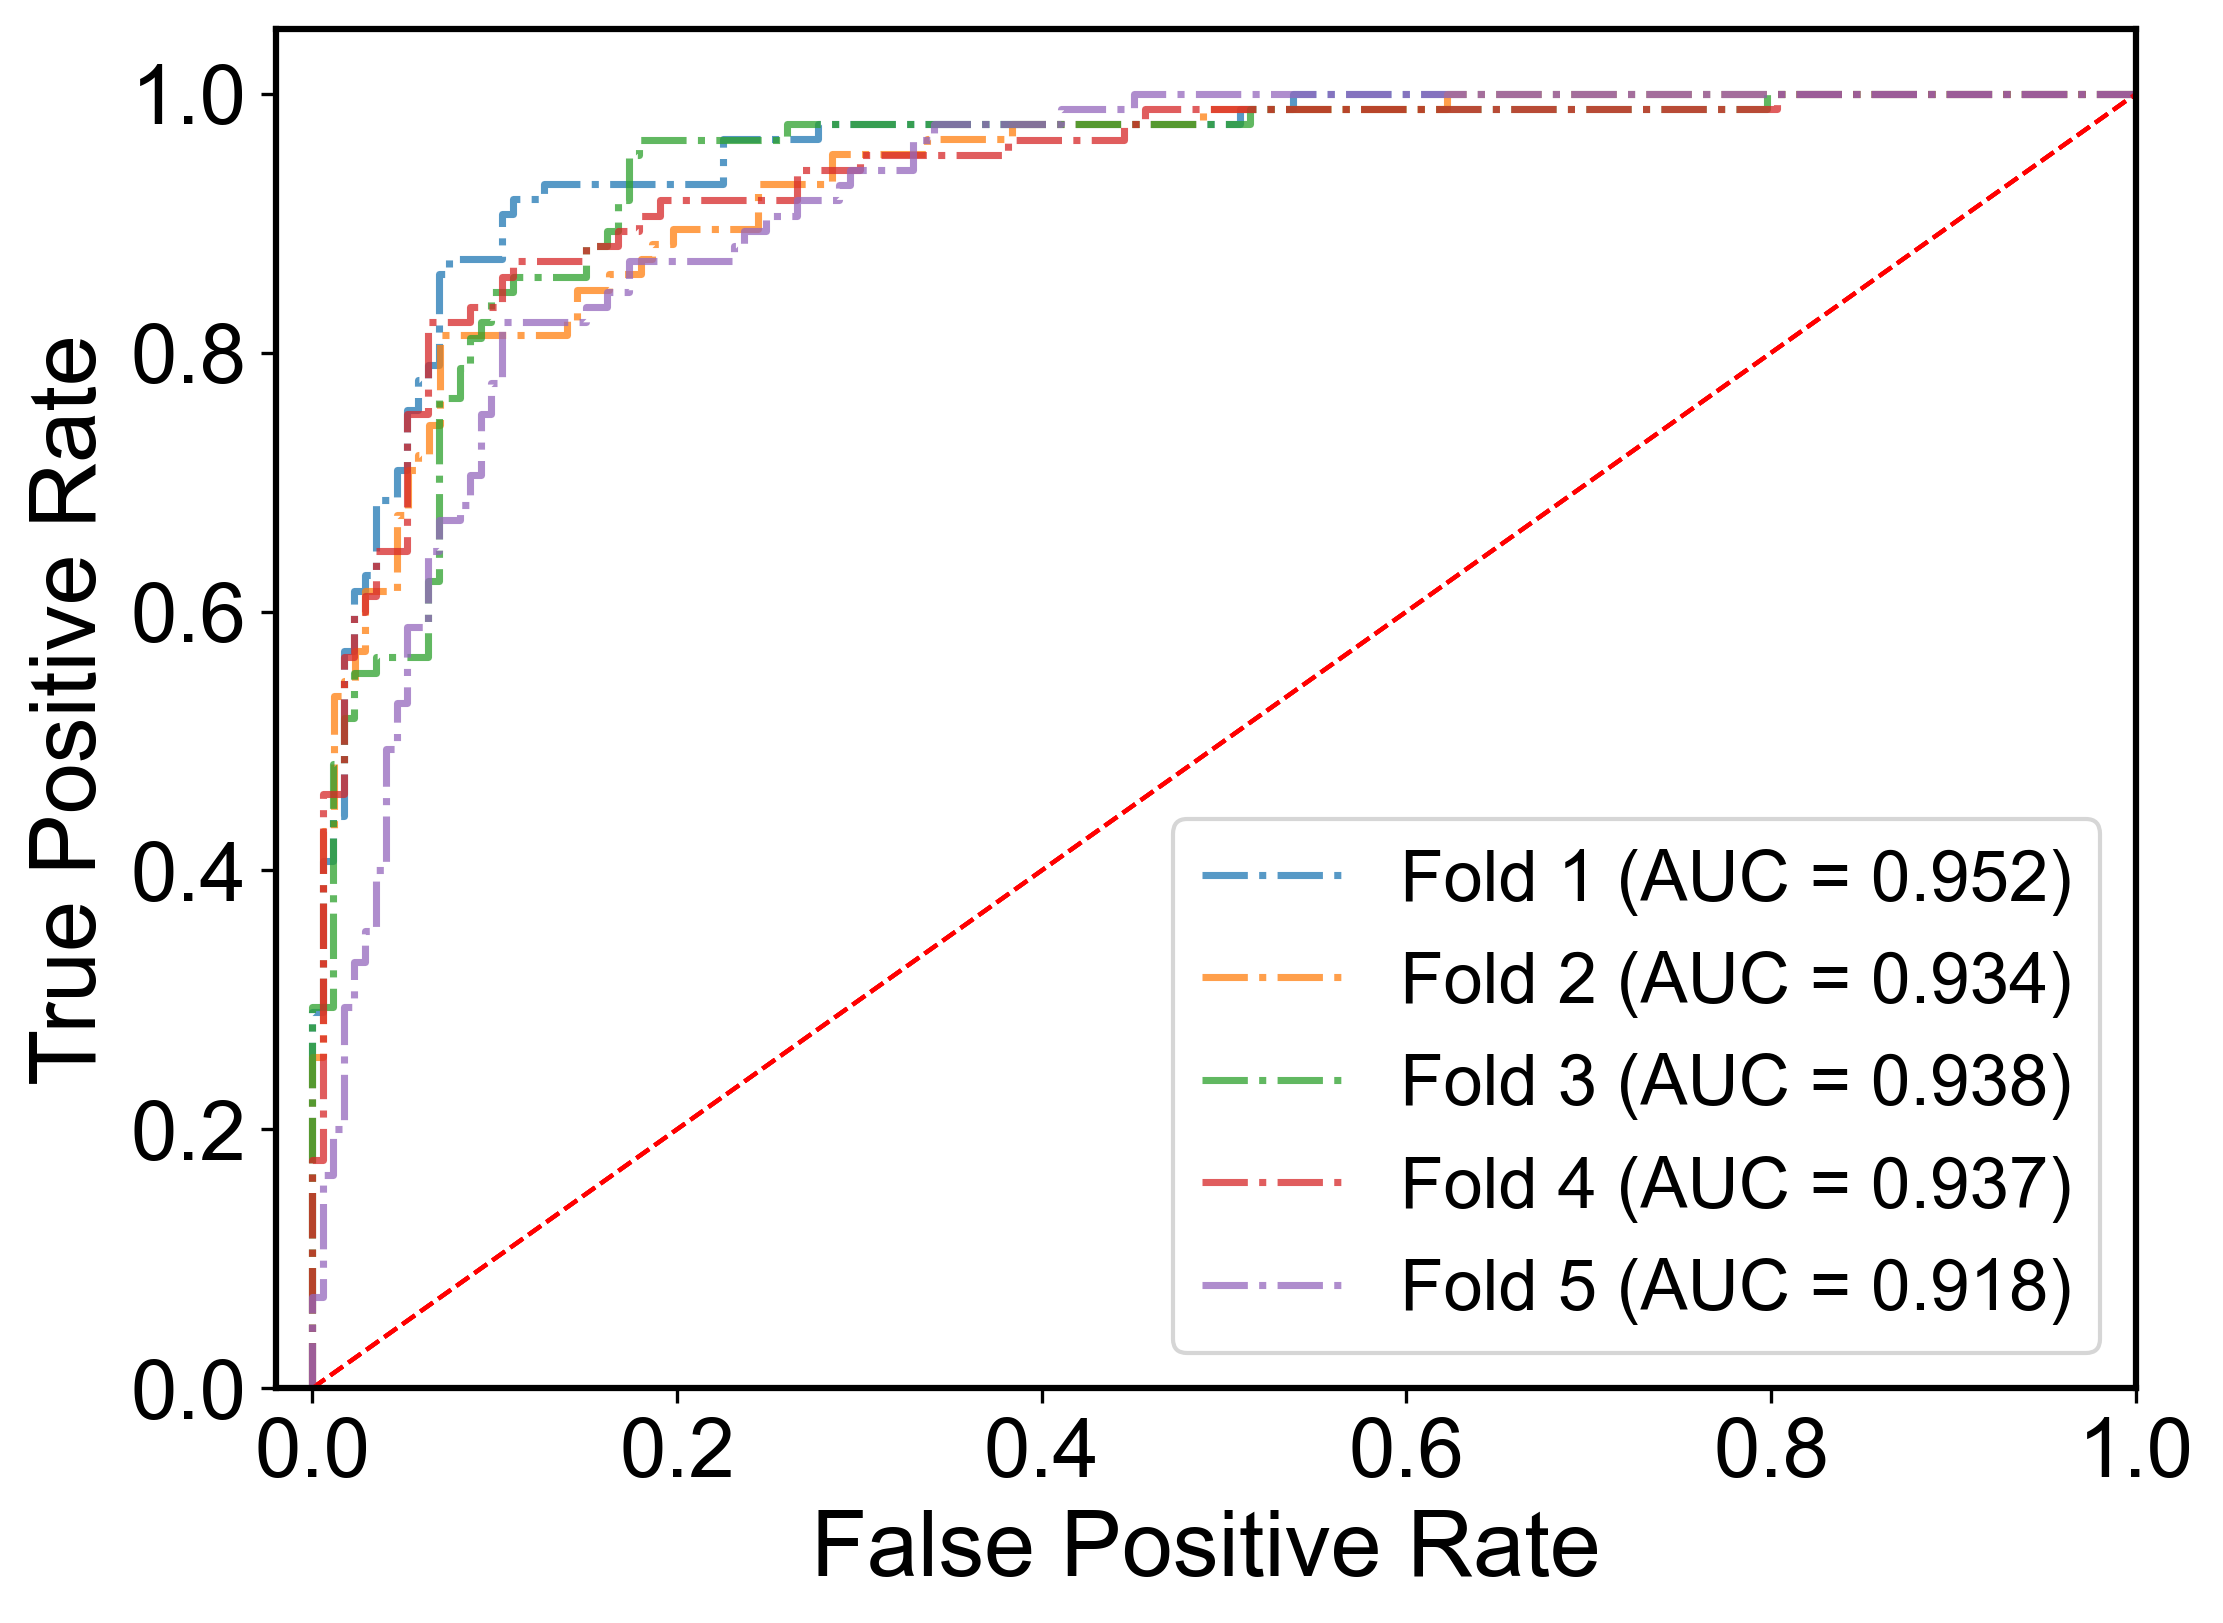

In [105]:
#!!!!!!！！！！！
from sklearn.ensemble import ExtraTreesClassifier

xgb_result, xgb_models = fold5_ensemble_smote(xb, X_xgb, y)
xgb_result

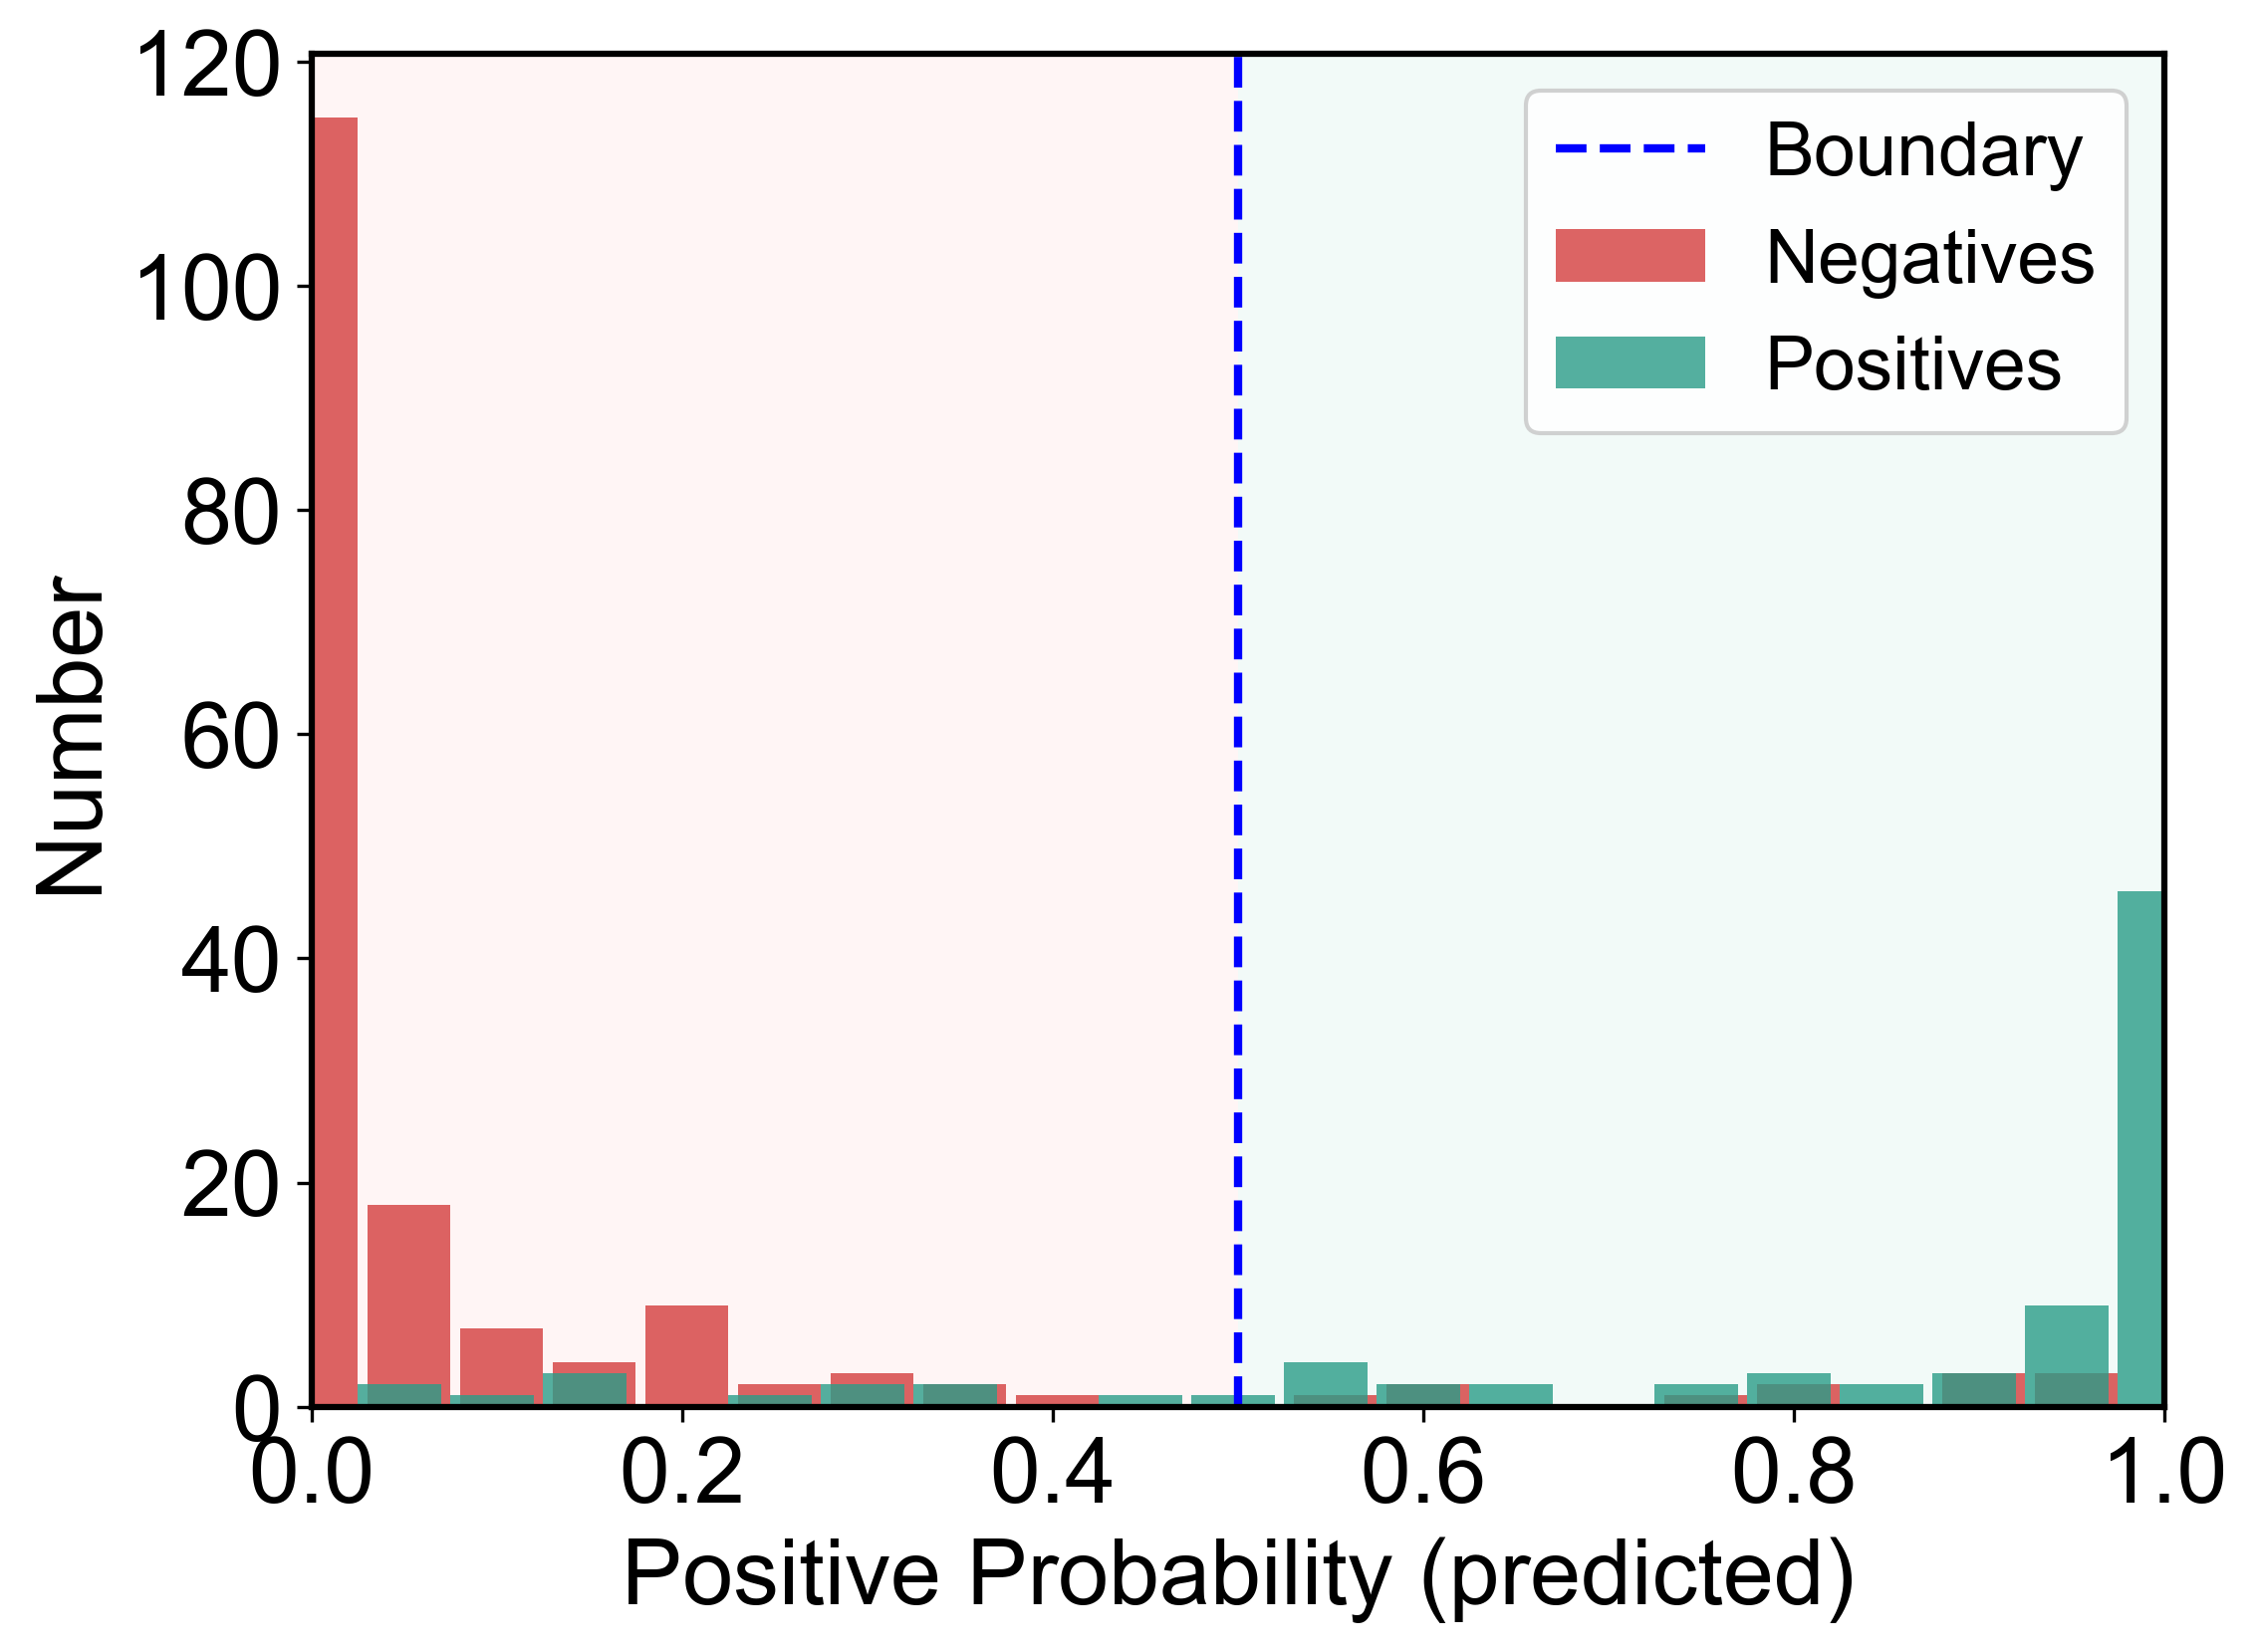

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/ml_eh_data/fold0_predict_prob.csv')  
pos_probs = df[df['true_label'] == 1]['predict_proba'].values
neg_probs = df[df['true_label'] == 0]['predict_proba'].values

bins = np.linspace(0, 1, 21)
neg_counts, bin_edges = np.histogram(neg_probs, bins=bins)
pos_counts, _ = np.histogram(pos_probs, bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = 0.045  
offset = width * 0.5  

fig, ax = plt.subplots()
ax.axvspan(0, 0.5, facecolor='#ffecec', alpha=0.5)   
ax.axvspan(0.5, 1, facecolor='#e6f7f2', alpha=0.5)  

ax.bar(bin_centers - offset, neg_counts, width=width, alpha=0.8, 
        color='#d43d3d', linewidth=0.7, 
        label='Negatives')
ax.bar(bin_centers + offset, pos_counts, width=width, alpha=0.8, 
        color='#2a9c88', linewidth=0.7, 
        label='Positives')
ax.axvline(0.5, color='blue', linestyle='--', linewidth=2, label='Boundary')

ax.set_xlabel('Positive Probability (predicted)', fontsize=22)
ax.set_ylabel('Number', fontsize=22)

ax.legend(loc='upper right', frameon=True, framealpha=0.9, fontsize=18)
ax.set_xlim(0, 1)

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=22)

#plt.savefig('./picture/eh_probability_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [85]:
import joblib
joblib.dump(xgb_models, './data/eh_xgb.joblib')

['eh_xgb.joblib']

In [86]:
features_xgb =  ['B_Density', 'C_dipole Polarizability', 'C_atomic Radius', 'C_number', 'A_number of s+p Electrons', 'C_number of s+p Electrons',
               'A-C_Density', '(A+B+C)-X_dipole Polarizability', '(A+B+C)-X_atomic Radius', '(A+B+C)-X_number of Valence Electrons',
               'A-C_number', 'A-B_Period', 'A-C_Electronegativity', 'A-C_number of s+p Electrons', 'A-C_number of d Electrons', '(A+B+C)-X_number of d Electrons', 'A-C_Mulliken EN']  

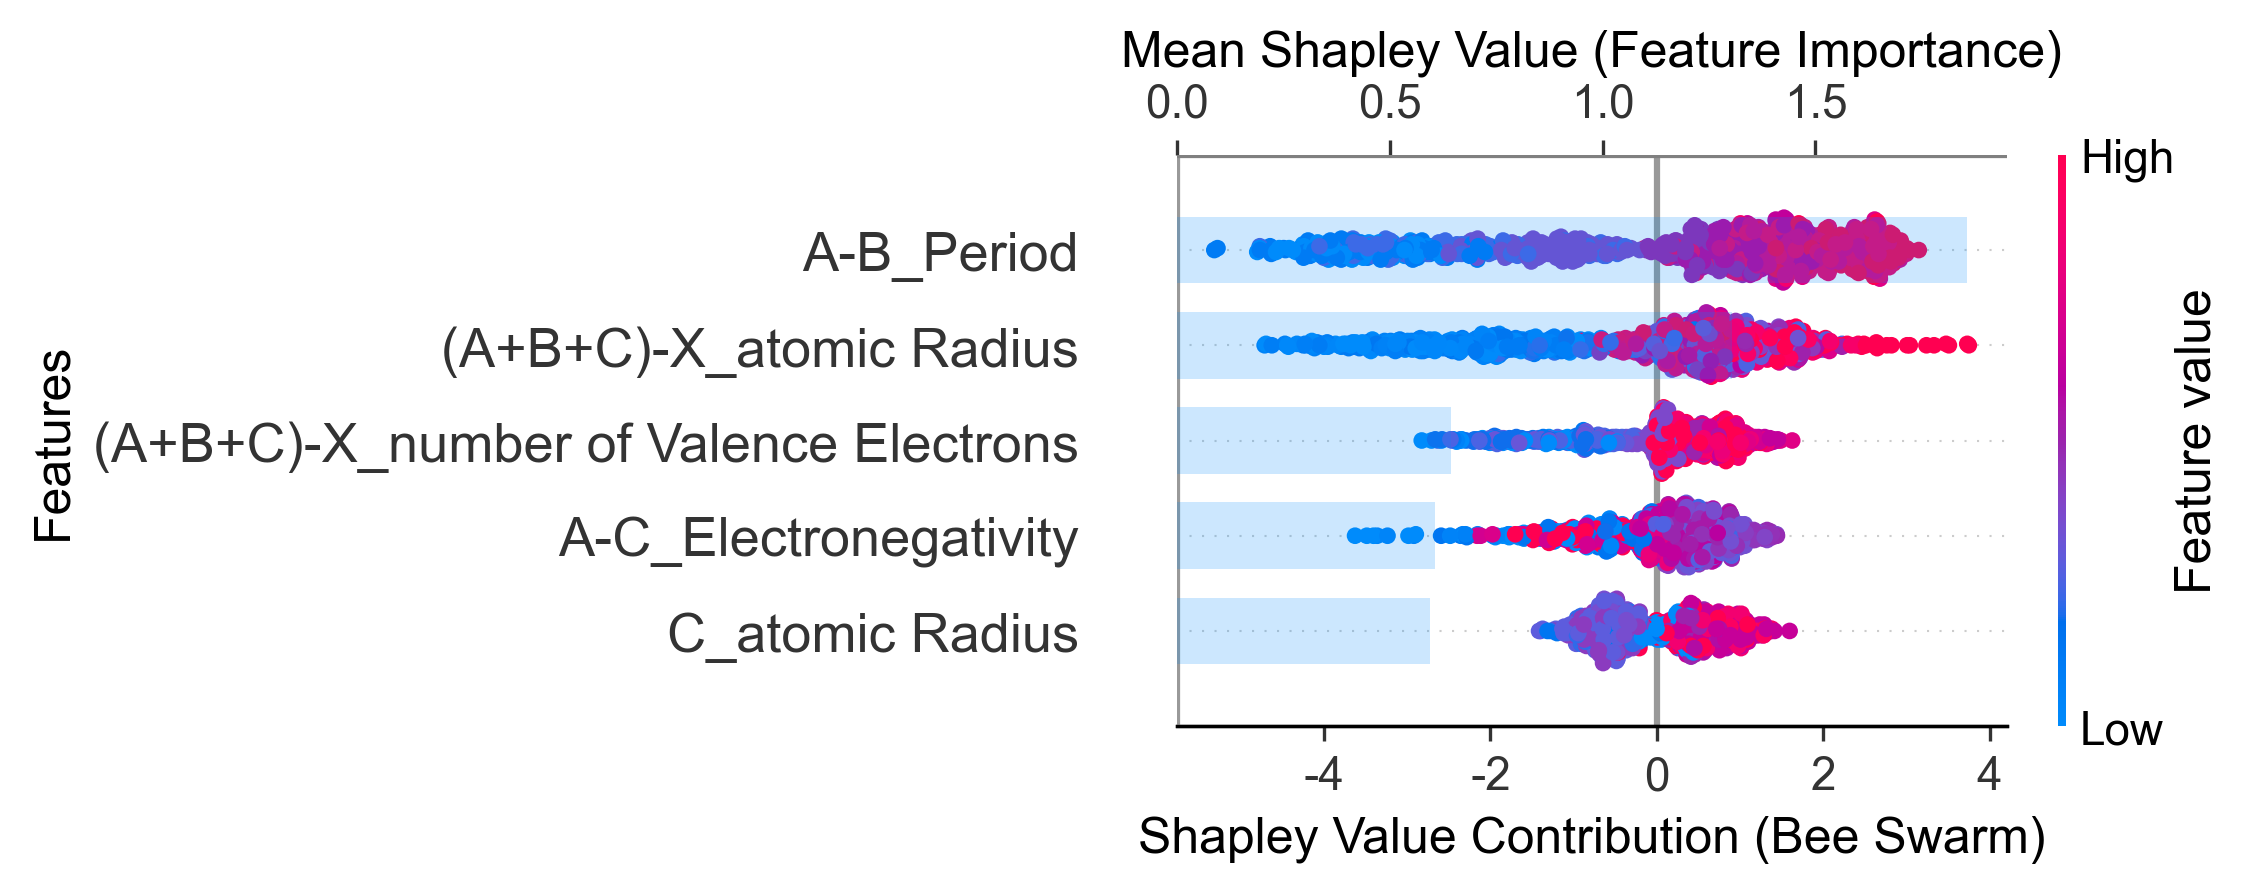

In [60]:
shap.summary_plot(shap_values, test, plot_type="dot", show=False,max_display=5,color_bar=True)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65]) 

ax1 = plt.gca()
ax2 = ax1.twiny()
shap.summary_plot(shap_values, test, plot_type="bar", show=False,max_display=5)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  
ax2.axhline(y=5, color='gray', linestyle='-', linewidth=1.5) 
bars = ax2.patches  

for bar in bars:    
    bar.set_alpha(0.2)  
ax1.set_xlabel('Shapley Value Contribution (Bee Swarm)', fontsize=12)
ax2.set_xlabel('Mean Shapley Value (Feature Importance)', fontsize=12)
ax2.xaxis.set_ticks_position('top') 
ax2.xaxis.set_label_position('top')
plt.subplots_adjust(
    left=0.2,   
    right=0.75,  
    top=0.85,    
    bottom=0.15  
)

ax1.set_ylabel('Features', fontsize=12)
plt.tight_layout()
plt.savefig('./picture/eh_shap.png', bbox_inches='tight')
plt.show()

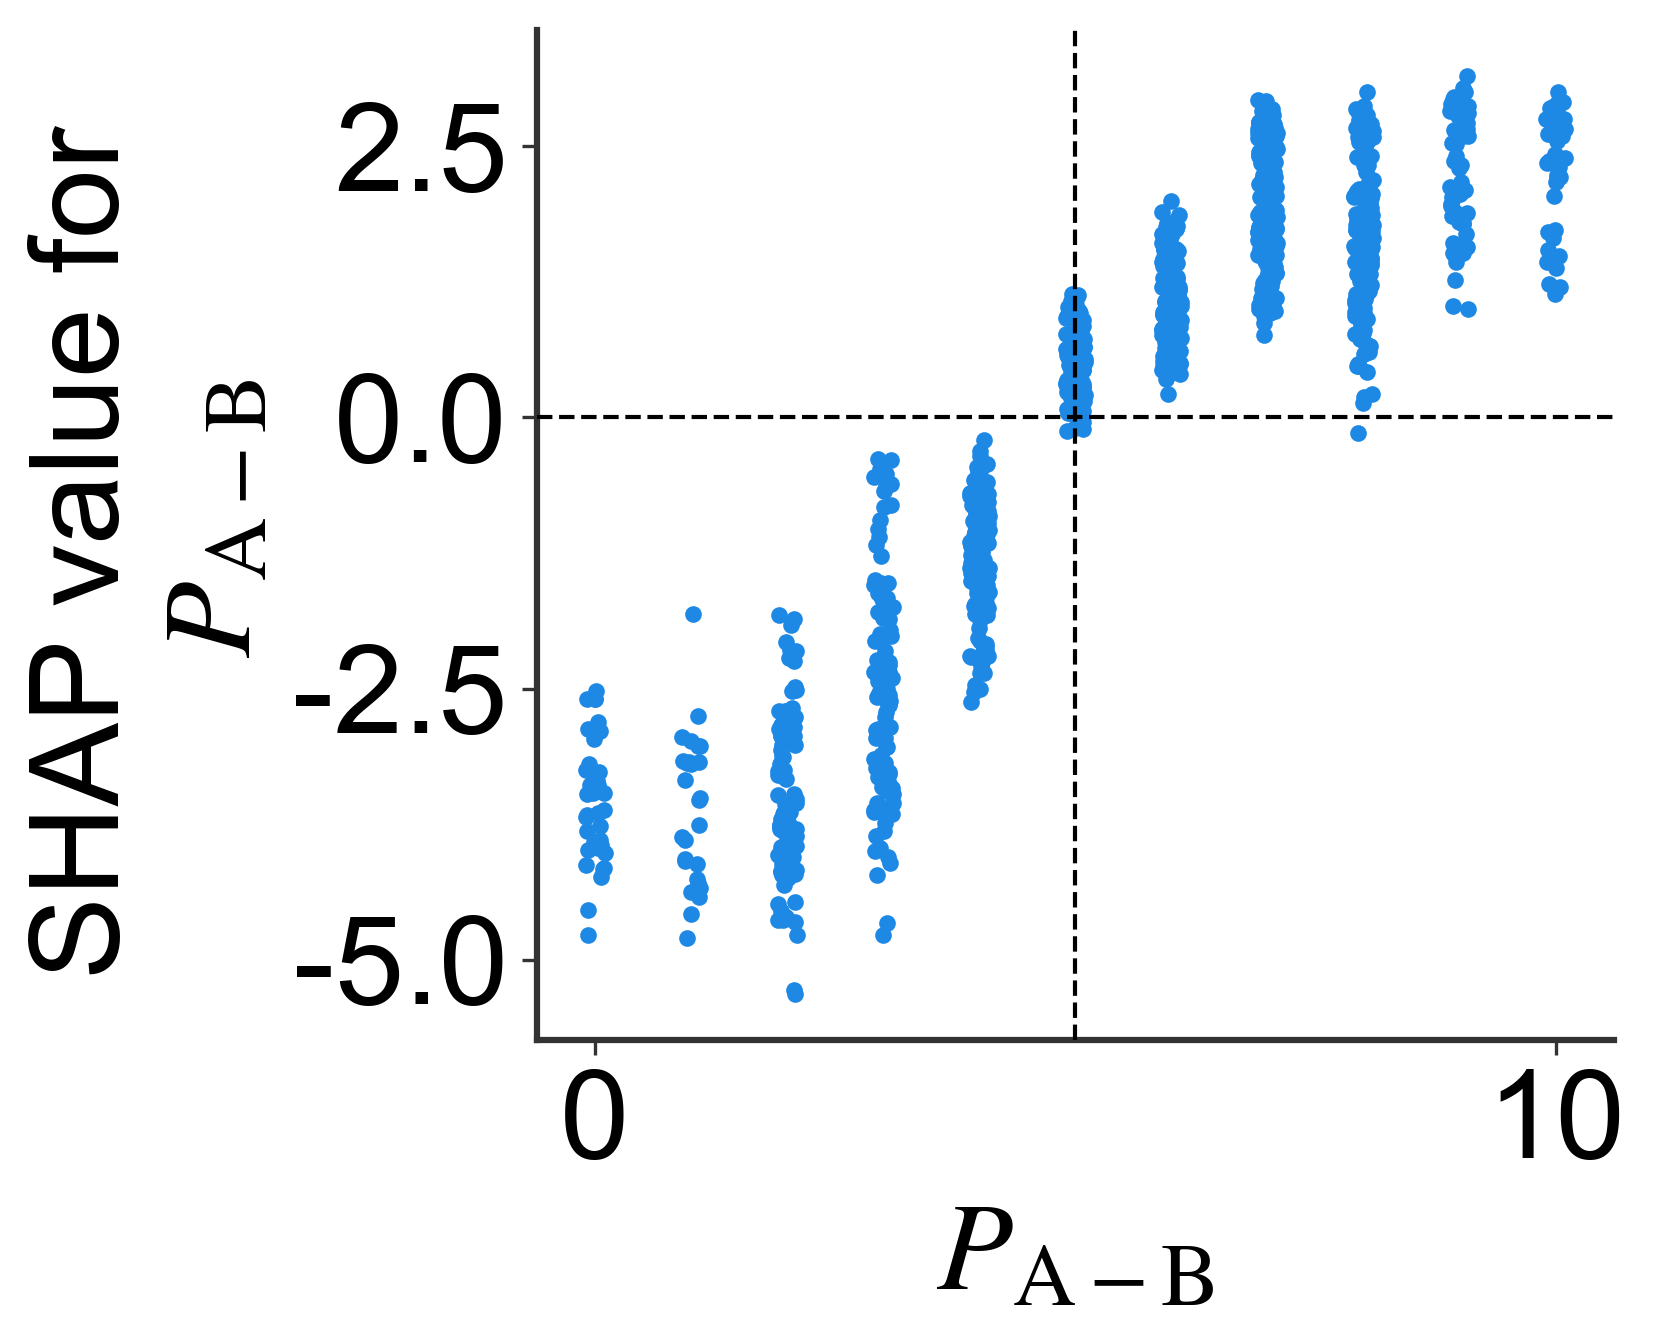

In [87]:
shap.plots.scatter(shap_values[:, 'A-B_Period'], hist=False,show=False)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.setp(ax.get_xticklabels(), fontweight=550,color='black')  # x轴加粗
plt.setp(ax.get_yticklabels(), fontweight=550,color='black')
ax.set_ylabel("SHAP value for \n $P_{\mathrm{A-B}}$", fontsize=30,fontweight=550,color='black')
ax.set_xlabel(r"$P_{\mathrm{A-B}}$", fontsize=30,fontweight=550,color='black')
plt.tight_layout()
ax.axhline(y=0,color='black',linestyle='--',linewidth=1,zorder=3)
ax.axvline(x=5,color='black',linestyle='--',linewidth=1,zorder=3)
plt.savefig("./picture/eh_shap1.png", dpi=300, bbox_inches="tight")
plt.show()

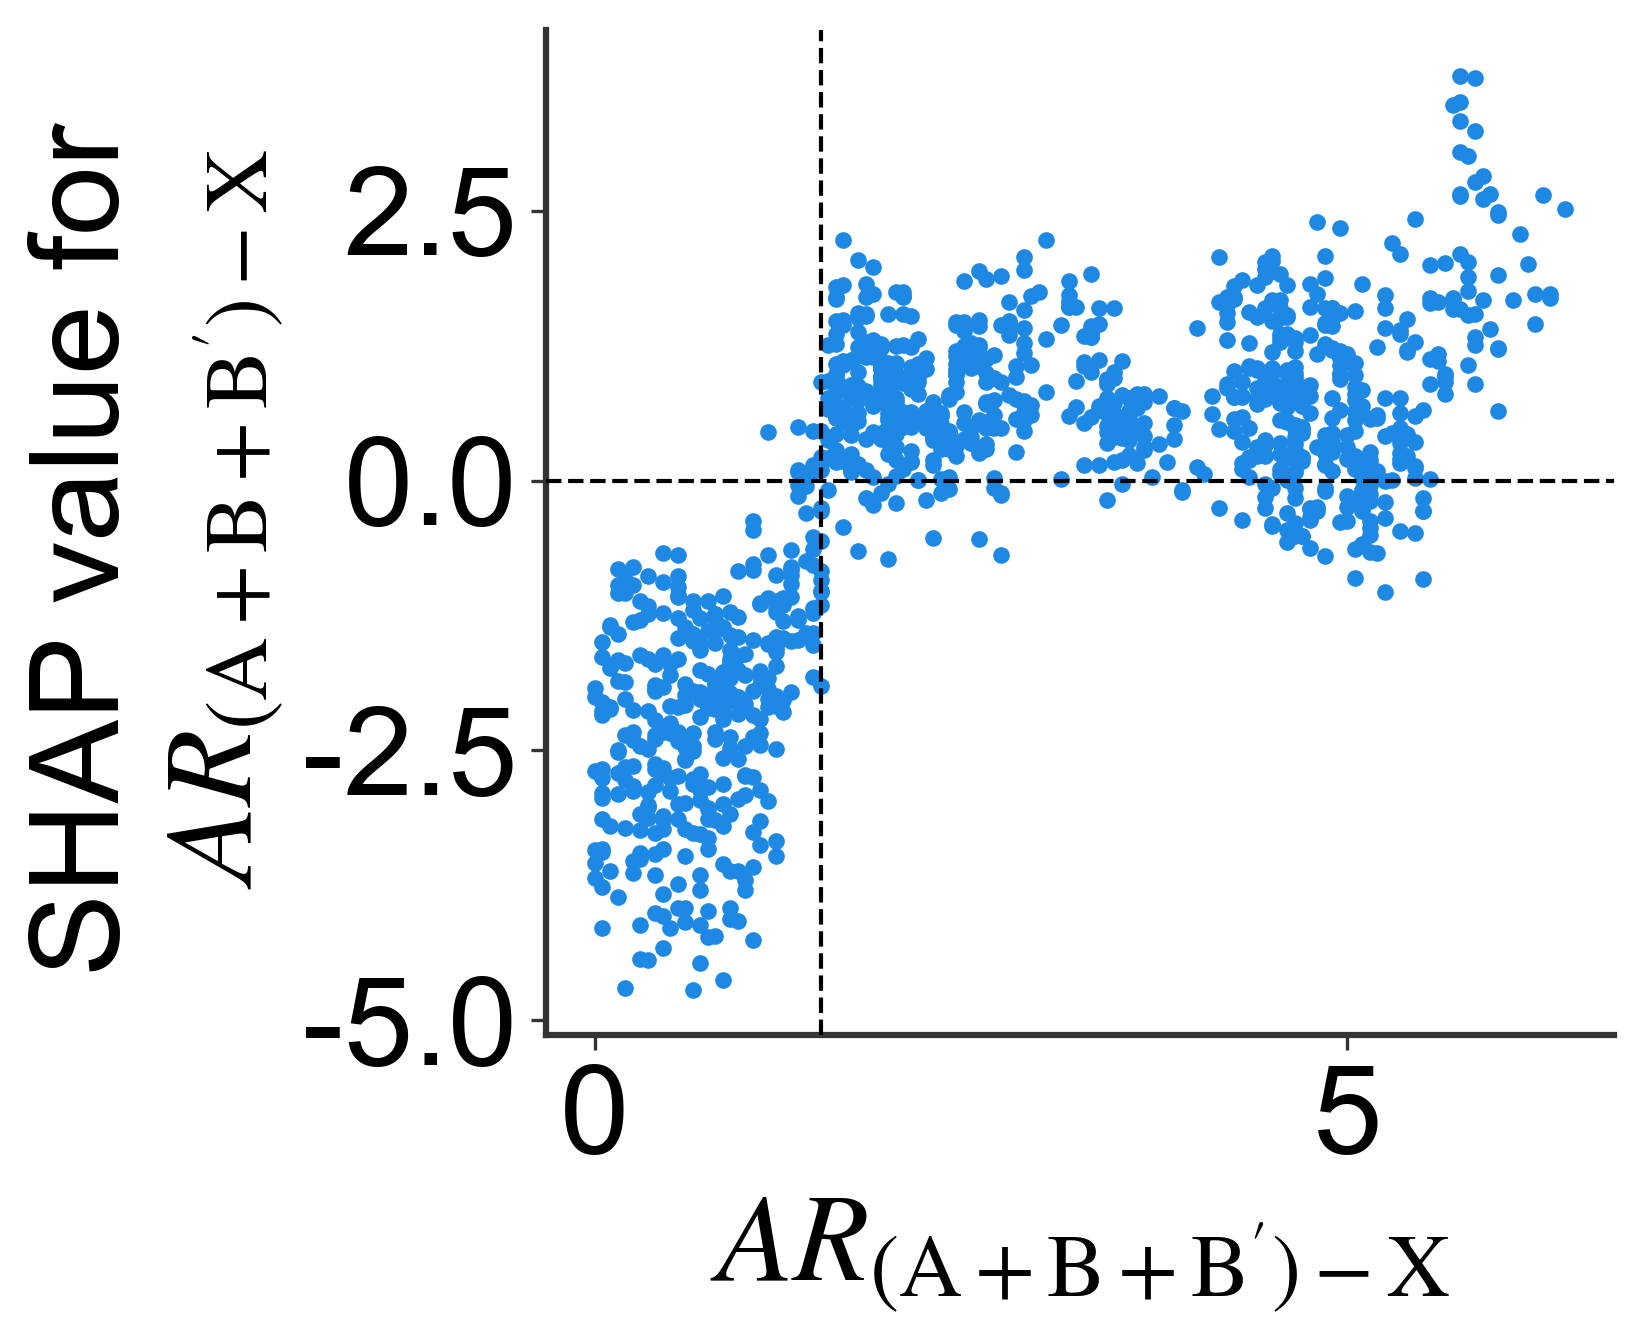

In [88]:
shap.plots.scatter(shap_values[:, '(A+B+C)-X_atomic Radius'], hist=False,show=False)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.setp(ax.get_xticklabels(), fontweight=550,color='black')  # x轴加粗
plt.setp(ax.get_yticklabels(), fontweight=550,color='black')
ax.set_ylabel("SHAP value for \n $AR_{\mathrm{(A+B+B')-X}}$", fontsize=30, fontweight=550,color='black')
ax.set_xlabel(r"$AR_{\mathrm{(A+B+B')-X}}$", fontsize=30, fontweight=550,color='black')
plt.tight_layout()
ax.axhline(y=0,color='black',linestyle='--',linewidth=1,zorder=3)
ax.axvline(x=1.5,color='black',linestyle='--',linewidth=1,zorder=3)
plt.savefig("./picture/eh_shap2.png", dpi=300, bbox_inches="tight")
plt.show()

# predict Eh and screen materials

In [21]:
data = pd.read_csv('./data/data_tf.csv')
data

formula  number  A_Density  B_Density  C_Density  X_Density  \
0      Li2NaBF6       1      1.068      0.971    2.34000     0.0102   
1      Li2NaNF6       1      1.068      0.971    0.00125     0.0102   
2     Li2CuAlF6       1      1.068      8.960    2.70000     0.0102   
3      Li2CuPF6       1      1.068      8.960    1.82000     0.0102   
4     Li2CuCrF6       1      1.068      8.960    7.15000     0.0102   
...         ...     ...        ...        ...        ...        ...   
9081  Nd2LiCuF6       3     14.020      0.534    8.96000     0.0102   
9082  Nd2NaCuF6       3     14.020      0.971    8.96000     0.0102   
9083  Eu2LiCuF6       3     10.480      0.534    8.96000     0.0102   
9084  Tm2LiCuF6       3     18.640      0.534    8.96000     0.0102   
9085  Yb2LiCuF6       3     13.940      0.534    8.96000     0.0102   

      A_dipole Polarizability  B_dipole Polarizability  \
0                     328.225                 162.7000   
1                     328.225                 162.7000   
2                     328.225                  46.5000   
3                     328.225                  46.5000   
4                     328.225                  46.5000   
...                       ...                      ...   
9081                  416.000                 164.1125   
9082                  416.000                 162.7000   
9083                  368.000                 164.1125   
9084                  288.000                 164.1125   
9085                  278.000                 164.1125   

      C_dipole Polarizability  X_dipole Polarizability  A_covalent Radius  \
0                        20.5                    22.44                266   
1                         7.4                    22.44                266   
2                        57.8                    22.44                266   
3                        25.0                    22.44                266   
4                        83.0                    22.44                266   
...                       ...                      ...                ...   
9081                     46.5                    22.44                348   
9082                     46.5                    22.44                348   
9083                     46.5                    22.44                336   
9084                     46.5                    22.44                328   
9085                     46.5                    22.44                340   

      B_covalent Radius  C_covalent Radius  X_covalent Radius  \
0                   155                 85                384   
1                   155                 71                384   
2                   112                126                384   
3                   112                111                384   
4                   112                122                384   
...                 ...                ...                ...   
9081                133                112                384   
9082                155                112                384   
9083                133                112                384   
9084                133                112                384   
9085                133                112                384   

      A_atomic Radius  B_atomic Radius  C_atomic Radius  X_atomic Radius  \
0                 2.9             1.80             0.85              3.0   
1                 2.9             1.80             0.65              3.0   
2                 2.9             1.35             1.25              3.0   
3                 2.9             1.35             1.00              3.0   
4                 2.9             1.35             1.40              3.0   
...               ...              ...              ...              ...   
9081              3.7             1.45             1.35              3.0   
9082              3.7             1.80             1.35              3.0   
9083              3.7             1.45             1.35             

In [22]:
screen2 = pd.read_csv('./data/screen_bandgap1.csv')

In [23]:
screen2 = pd.merge(screen2, data, on=['formula','number'], how='left')
screen2

formula  number  band_gap  A_Density  B_Density  C_Density  X_Density  \
0    Rb2NaMoBr6       1  1.475700       3.06      0.971      10.20      18.72   
1    Rb2NaIrBr6       1  1.404644       3.06      0.971      22.60      18.72   
2     Rb2KIrBr6       1  1.409481       3.06      0.862      22.60      18.72   
3    Rb2AgTiBr6       1  1.129527       3.06     10.500       4.54      18.72   
4    Rb2AgMoBr6       1  0.647062       3.06     10.500      10.20      18.72   
..          ...     ...       ...        ...        ...        ...        ...   
158   Tl2CaVBr6       2  1.160604      23.80      1.540       6.11      18.72   
159  Tl2CaCrBr6       2  1.166823      23.80      1.540       7.15      18.72   
160  Tl2CaGeBr6       2  0.936388      23.80      1.540       5.32      18.72   
161  Tl2CaNbBr6       2  1.161236      23.80      1.540       8.57      18.72   
162  Tl2CaTmBr6       2  1.411247      23.80      1.540       9.32      18.72   

     A_dipole Polarizability  B_dipole Polarizability  \
0                      639.6                    162.7   
1                      639.6                    162.7   
2                      639.6                    289.7   
3                      639.6                     55.0   
4                      639.6                     55.0   
..                       ...                      ...   
158                    100.0                    160.8   
159                    100.0                    160.8   
160                    100.0                    160.8   
161                    100.0                    160.8   
162                    100.0                    160.8   

     C_dipole Polarizability  X_dipole Polarizability  A_covalent Radius  \
0                       87.0                    126.0                420   
1                       54.0                    126.0                420   
2                       54.0                    126.0                420   
3                      100.0                    126.0                420   
4                       87.0                    126.0                420   
..                       ...                      ...                ...   
158                     87.0                    126.0                288   
159                     83.0                    126.0                288   
160                     40.0                    126.0                288   
161                     98.0                    126.0                288   
162                    144.0                    126.0                288   

     B_covalent Radius  C_covalent Radius  X_covalent Radius  A_atomic Radius  \
0                  155                138                684              4.7   
1                  155                122                684              4.7   
2                  196                122                684              4.7   
3                  128                136                684              4.7   
4                  128                138                684              4.7   
..                 ...                ...                ...              ...   
158                171                134                684              3.8   
159                171                122                684              3.8   
160                171                121                684              3.8   
161                171                147                684              3.8   
162                171                164                684              3.8   

     B_atomic Radius  C_atomic Radius  X_atomic Radius  A_FirstIonization  \
0                1.8             1.45              6.9              806.0   
1                1.8             1.35              6.9              806.0   
2                2.2             1.35              6.9              806.0   
3                1.6             1.40              6.9              806.0   
4                1.6             1.45              6.9              806.0   
..

In [24]:
features_xgb =  ['B_Density', 'C_dipole Polarizability', 'C_atomic Radius', 'C_number', 'A_number of s+p Electrons', 'C_number of s+p Electrons',
               'A-C_Density', '(A+B+C)-X_dipole Polarizability', '(A+B+C)-X_atomic Radius', '(A+B+C)-X_number of Valence Electrons',
               'A-C_number', 'A-B_Period', 'A-C_Electronegativity', 'A-C_number of s+p Electrons', 'A-C_number of d Electrons', '(A+B+C)-X_number of d Electrons', 'A-C_Mulliken EN']  

In [26]:
X2 = screen2[features_xgb]
X2.columns

Index(['B_Density', 'C_dipole Polarizability', 'C_atomic Radius', 'C_number',
       'A_number of s+p Electrons', 'C_number of s+p Electrons', 'A-C_Density',
       '(A+B+C)-X_dipole Polarizability', '(A+B+C)-X_atomic Radius',
       '(A+B+C)-X_number of Valence Electrons', 'A-C_number', 'A-B_Period',
       'A-C_Electronegativity', 'A-C_number of s+p Electrons',
       'A-C_number of d Electrons', '(A+B+C)-X_number of d Electrons',
       'A-C_Mulliken EN'],
      dtype='object')

In [27]:
from joblib import load
eh_xgb = load('./model/eh_xgb.joblib')

In [10]:
eh3 = pd.DataFrame(columns=['formula','number'])
eh3['formula'] = screen2['formula']
eh3['number'] = screen2['number']

In [12]:
%%time
# 使用所有模型进行集成预测
y_pred_ensemble = np.array([model.predict(X2) for model in eh_xgb]).T
eh3['eh'] = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=y_pred_ensemble)
eh3

CPU times: user 4.39 s, sys: 0 ns, total: 4.39 s
Wall time: 58.5 ms


formula  number  eh
0    Rb2NaMoBr6       1   0
1    Rb2NaIrBr6       1   0
2     Rb2KIrBr6       1   0
3    Rb2AgTiBr6       1   0
4    Rb2AgMoBr6       1   0
..          ...     ...  ..
158   Tl2CaVBr6       2   0
159  Tl2CaCrBr6       2   0
160  Tl2CaGeBr6       2   0
161  Tl2CaNbBr6       2   0
162  Tl2CaTmBr6       2   0

[163 rows x 3 columns]

In [303]:
#!!!!!!!!!!
screen_pbe3 = eh3.loc[eh3['eh']==1, ['formula', 'number']]
screen_pbe3

formula  number
6     Rb2TlPBr6       1
7    Rb2TlAsBr6       1
22   Cs2AgTiBr6       1
25    Cs2TlPBr6       1
26   Cs2TlTiBr6       1
27    Cs2TlTiI6       1
29   Cs2TlAsBr6       1
30    Cs2TlAsI6       1
34   Cs2TlSbBr6       1
76     K2BePtF6       2
79    K2NiAgCl6       2
92   Rb2TiCdCl6       2
100  Rb2NiAgCl6       2
102  Rb2GePbCl6       2
107  Rb2NbPbCl6       2
109  Rb2InPbCl6       2
110  Rb2SnPbCl6       2
111   Cs2BePtF6       2
113   Cs2CaVBr6       2
114  Cs2CaCrBr6       2
117   Cs2ScVBr6       2
118  Cs2ScCrBr6       2
121   Cs2TiVBr6       2
122  Cs2TiCrBr6       2
127   Cs2TiEuI6       2
131    Cs2VLaI6       2
136   Cs2MnLaI6       2
137   Cs2MnEuI6       2
142  Cs2GePbBr6       2
144   Cs2SrInI6       2
149  Cs2InSnBr6       2
151  Cs2InPbCl6       2
152  Cs2InPbBr6       2
154  Cs2SnPbCl6       2
155  Cs2SnPbBr6       2